# Interpretable Fuzzy Modeling: A Mixed Method Approach for Skewed Data


## The following models predicts the flux of forward osmosis process pertaining to specific membrane type and membrane orientaiton, the model provides a value through its interpertability predictions capabilities when facing skewed data.



In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

The data is composed of 6 sheets:

Raw_data, Training_data, Validation_data, Predictoin_data, Legend, Bibliography
 
We will extract only the raw data, then export into csv

csv file shall be titled FO_Dataset

In [23]:
# Load the data
file_path = 'FO_Data.xlsx'


In [25]:


# Load the data from the specified Excel file and sheet
data = pd.read_excel(file_path, sheet_name='Raw_data')

# Export the data to a CSV file
output_file_path = 'FO_Dataset.csv'
data.to_csv(output_file_path, index=False)

print(f'data exported to {output_file_path}')


data exported to FO_Dataset.csv


In [26]:
# Load the data and look at it
file_path = 'FO_Dataset.csv'
df = pd.read_csv(file_path)
df.head()


Author  Year Membrane Type Membrane Orientation  \
0       McCutcheon et al.  2005           CTA                AL-FS   
1       McCutcheon et al.  2005           CTA                AL-FS   
2       McCutcheon et al.  2005           CTA                AL-FS   
3       McCutcheon et al.  2005           CTA                AL-FS   
4  McCutcheon & Elimelech  2006           CTA                AL-DS   

  Feed Solution (FS)  FS Molarity (M) Draw Solution (DS)  DS Molarity (M)  \
0               NaCl             0.20            NH4HCO3             9.00   
1               NaCl             0.20            NH4HCO3             5.70   
2               NaCl             0.20            NH4HCO3             3.20   
3               NaCl             0.20            NH4HCO3             0.50   
4               NaCl             0.05               NaCl             0.05   

   DS Molecular Weight (g/mol)  FS Velocity (cm/s)  DS Velocity (cm/s)  \
0                       79.056                30.0                30.0   
1                       79.056                30.0                30.0   
2                       79.056                30.0                30.0   
3                       79.056                30.0                30.0   
4                       58.440                45.8                45.8   

   FS Temperature °C  DS Temperature °C  Membrane Flux (LMH)  
0                 50                 50                22.32  
1                 50                 50                20.88  
2                 50                 50                18.00  
3                 50                 50                11.52  
4                 20                 20                 3.60

`feature engineering`

It is possible to calculate the pressure on each side of the membrane (feed solution side and draw solution side) based on the provided features such that:

$\pi = i \cdot M \cdot R \cdot T \quad(1)$

where:

$\pi$: is the osmotic pressure for each solution in units of pascals; $pa$.

$i$: dimensionless van't hoff factor that is ion specific.

$M$: molarity/concentration of the solution in units of moles divided by cubmic meters; $mol/m^{3}$

$R$: the ideal gas constant in units of joules divided by moles.Kelvin; $J/(mol.K)$; equals (8.3145).

$T$: temperature in units of Kelvin; $K$


$J_w = A \Delta \pi \quad(2)$

where:

$J$: is the membrane flux measured in litres per squared meters per hour; $L/(m^{2}.h)$

$A$: membrane permeability in units of $m^{3}/(m^{2}.h.bar)$

$\Delta \pi$: osmotic pressure difference in units of $bar$

1 bar equals 100,000 pascals\
0 celsius equals 273.15 Kelvin


`data cleaning and pre-processing`


* We remove the following features: Author, Year

* The Membrane Orientation and Membrane Type will be considered Binary features, since each feature holds 2 values only

The values in each feature will be either 1 or 0

The values will represent the following legend:

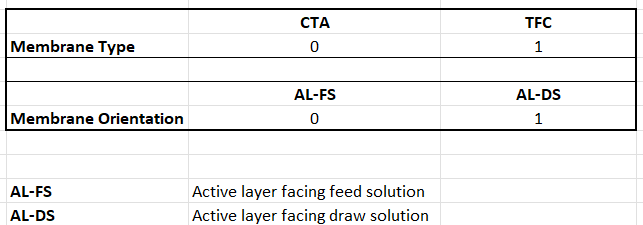

* The Feed Solution (FS) and Draw solution (DS) features represent categorical variables, ordinal encoding shall be introduced here such that numerical values will be asigned to chemical compounds based on their Van't Hoff factor: here is a break down of the values attached to each compound:

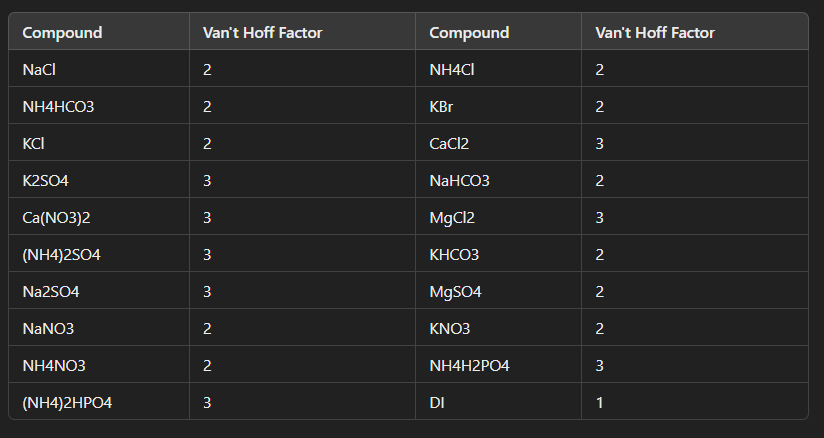


In [27]:
# Remove 'Author' and 'Year' features
df.drop(['Author', 'Year'], axis=1, inplace=True)

# Convert CTA values in 'Membrane Type' to 0 and TFC values to 1
df['Membrane Type'].replace({'CTA': 0, 'TFC': 1}, inplace=True)

# Convert AL-FS values in 'Membrane Orientation' to 0 and AL-DS values to 1
df['Membrane Orientation'].replace({'AL-FS': 0, 'AL-DS': 1}, inplace=True)

# Create a dictionary for the ordinal encoding of Draw Solution and Feed Solution
ordinal_encoding = {
    'NaCl': 2, 'NH4Cl': 2,
    'NH4HCO3': 2, 'KBr': 2,
    'KCl': 2, 'CaCl2': 3,
    'NaHCO3': 2, 'MgCl2': 3,
    'K2SO4': 3, 'KHCO3': 2,
    'Ca(NO3)2': 3, 'MgSO4': 2,
    '(NH4)2SO4': 3, 'Na2SO4': 3,
    'NaNO3': 2, 'KNO3': 2,
    'NH4NO3': 2, 'NH4H2PO4': 3,
    '(NH4)2HPO4': 3, 'DI': 1
}

# Ordinal encode Draw Solution and Feed Solution
df['Draw Solution (DS)'] = df['Draw Solution (DS)'].map(ordinal_encoding)
df['Feed Solution (FS)'] = df['Feed Solution (FS)'].map(ordinal_encoding)

df.head()


Membrane Type  Membrane Orientation  Feed Solution (FS)  FS Molarity (M)  \
0              0                     0                   2             0.20   
1              0                     0                   2             0.20   
2              0                     0                   2             0.20   
3              0                     0                   2             0.20   
4              0                     1                   2             0.05   

   Draw Solution (DS)  DS Molarity (M)  DS Molecular Weight (g/mol)  \
0                 2.0             9.00                       79.056   
1                 2.0             5.70                       79.056   
2                 2.0             3.20                       79.056   
3                 2.0             0.50                       79.056   
4                 2.0             0.05                       58.440   

   FS Velocity (cm/s)  DS Velocity (cm/s)  FS Temperature °C  \
0                30.0                30.0                 50   
1                30.0                30.0                 50   
2                30.0                30.0                 50   
3                30.0                30.0                 50   
4                45.8                45.8                 20   

   DS Temperature °C  Membrane Flux (LMH)  
0                 50                22.32  
1                 50                20.88  
2                 50                18.00  
3                 50                11.52  
4                 20                 3.60

`converting the units for formula 1`


In [28]:
# converting the temperature from c to k 
df['FS Temperature °C'] = df['FS Temperature °C'] + 273
df['DS Temperature °C'] = df['DS Temperature °C'] + 273
# converting the molarity from mol/l to mol/m^3 by multiplying by 1000 
df['DS Molarity (M)'] = df['DS Molarity (M)'] * 1000
df['FS Molarity (M)'] = df['FS Molarity (M)'] * 1000
df.head()

Membrane Type  Membrane Orientation  Feed Solution (FS)  FS Molarity (M)  \
0              0                     0                   2            200.0   
1              0                     0                   2            200.0   
2              0                     0                   2            200.0   
3              0                     0                   2            200.0   
4              0                     1                   2             50.0   

   Draw Solution (DS)  DS Molarity (M)  DS Molecular Weight (g/mol)  \
0                 2.0           9000.0                       79.056   
1                 2.0           5700.0                       79.056   
2                 2.0           3200.0                       79.056   
3                 2.0            500.0                       79.056   
4                 2.0             50.0                       58.440   

   FS Velocity (cm/s)  DS Velocity (cm/s)  FS Temperature °C  \
0                30.0                30.0                323   
1                30.0                30.0                323   
2                30.0                30.0                323   
3                30.0                30.0                323   
4                45.8                45.8                293   

   DS Temperature °C  Membrane Flux (LMH)  
0                323                22.32  
1                323                20.88  
2                323                18.00  
3                323                11.52  
4                293                 3.60

`apply the formula`

In [32]:
# creating a feature for feed pressure
df['P_f'] = 0
# creating a feature for draw pressure
df['P_d'] = 0
# apply formula
df['P_f'] = df['Feed Solution (FS)'] * df['FS Molarity (M)'] * 8.3145 * df['FS Temperature °C']
df['P_d'] = df['Draw Solution (DS)'] * df['DS Molarity (M)'] * 8.3145 * df['DS Temperature °C']
# estimate pressure difference, delta_p
df['delta_P'] = df['P_d'] - df['P_f']
# converting the pressure from pascal to bars for simplicity
df['delta_P'] = df['delta_P']/(10**5)

df.head()

Membrane Type  Membrane Orientation  Feed Solution (FS)  FS Molarity (M)  \
0              0                     0                   2            200.0   
1              0                     0                   2            200.0   
2              0                     0                   2            200.0   
3              0                     0                   2            200.0   
4              0                     1                   2             50.0   

   Draw Solution (DS)  DS Molarity (M)  DS Molecular Weight (g/mol)  \
0                 2.0           9000.0                       79.056   
1                 2.0           5700.0                       79.056   
2                 2.0           3200.0                       79.056   
3                 2.0            500.0                       79.056   
4                 2.0             50.0                       58.440   

   FS Velocity (cm/s)  DS Velocity (cm/s)  FS Temperature °C  \
0                30.0                30.0                323   
1                30.0                30.0                323   
2                30.0                30.0                323   
3                30.0                30.0                323   
4                45.8                45.8                293   

   DS Temperature °C  Membrane Flux (LMH)         P_f          P_d     delta_P  
0                323                22.32  1074233.40  48340503.00  472.662696  
1                323                20.88  1074233.40  30615651.90  295.414185  
2                323                18.00  1074233.40  17187734.40  161.135010  
3                323                11.52  1074233.40   2685583.50   16.113501  
4                293                 3.60   243614.85    243614.85    0.000000

`Tidying up`
* Now we remove the features used in calculating delta_p


In [33]:
# remove f_factor FS Molarity (M)	d_factor	DS Molarity (M)	FS Temperature °C	DS Temperature °C	P_f P_d

# Specify the columns to remove
columns_to_remove = ['Feed Solution (FS)', 'FS Molarity (M)', 'Draw Solution (DS)', 'DS Molarity (M)', 
                     'FS Temperature °C', 'DS Temperature °C', 'P_f', 'P_d']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)

# Check the resulting DataFrame
df.head()


Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
0              0                     0                       79.056   
1              0                     0                       79.056   
2              0                     0                       79.056   
3              0                     0                       79.056   
4              0                     1                       58.440   

   FS Velocity (cm/s)  DS Velocity (cm/s)  Membrane Flux (LMH)     delta_P  
0                30.0                30.0                22.32  472.662696  
1                30.0                30.0                20.88  295.414185  
2                30.0                30.0                18.00  161.135010  
3                30.0                30.0                11.52   16.113501  
4                45.8                45.8                 3.60    0.000000

In [35]:
# making the flux the last feature instead of delta_p


# Extract column names
columns = df.columns.tolist()

# Find the index of "delta_P" and "Membrane Flux (LMH)"
index_delta_p = columns.index("delta_P")
index_membrane_flux = columns.index("Membrane Flux (LMH)")

# Swap the positions of the columns
columns[index_delta_p], columns[index_membrane_flux] = columns[index_membrane_flux], columns[index_delta_p]

# Reindex the dataframe with the new column order
df = df.reindex(columns=columns)

# Now "delta_P" and "Membrane Flux (LMH)" columns have swapped positions in the dataframe

df.head()


Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
0              0                     0                       79.056   
1              0                     0                       79.056   
2              0                     0                       79.056   
3              0                     0                       79.056   
4              0                     1                       58.440   

   FS Velocity (cm/s)  DS Velocity (cm/s)     delta_P  Membrane Flux (LMH)  
0                30.0                30.0  472.662696                22.32  
1                30.0                30.0  295.414185                20.88  
2                30.0                30.0  161.135010                18.00  
3                30.0                30.0   16.113501                11.52  
4                45.8                45.8    0.000000                 3.60

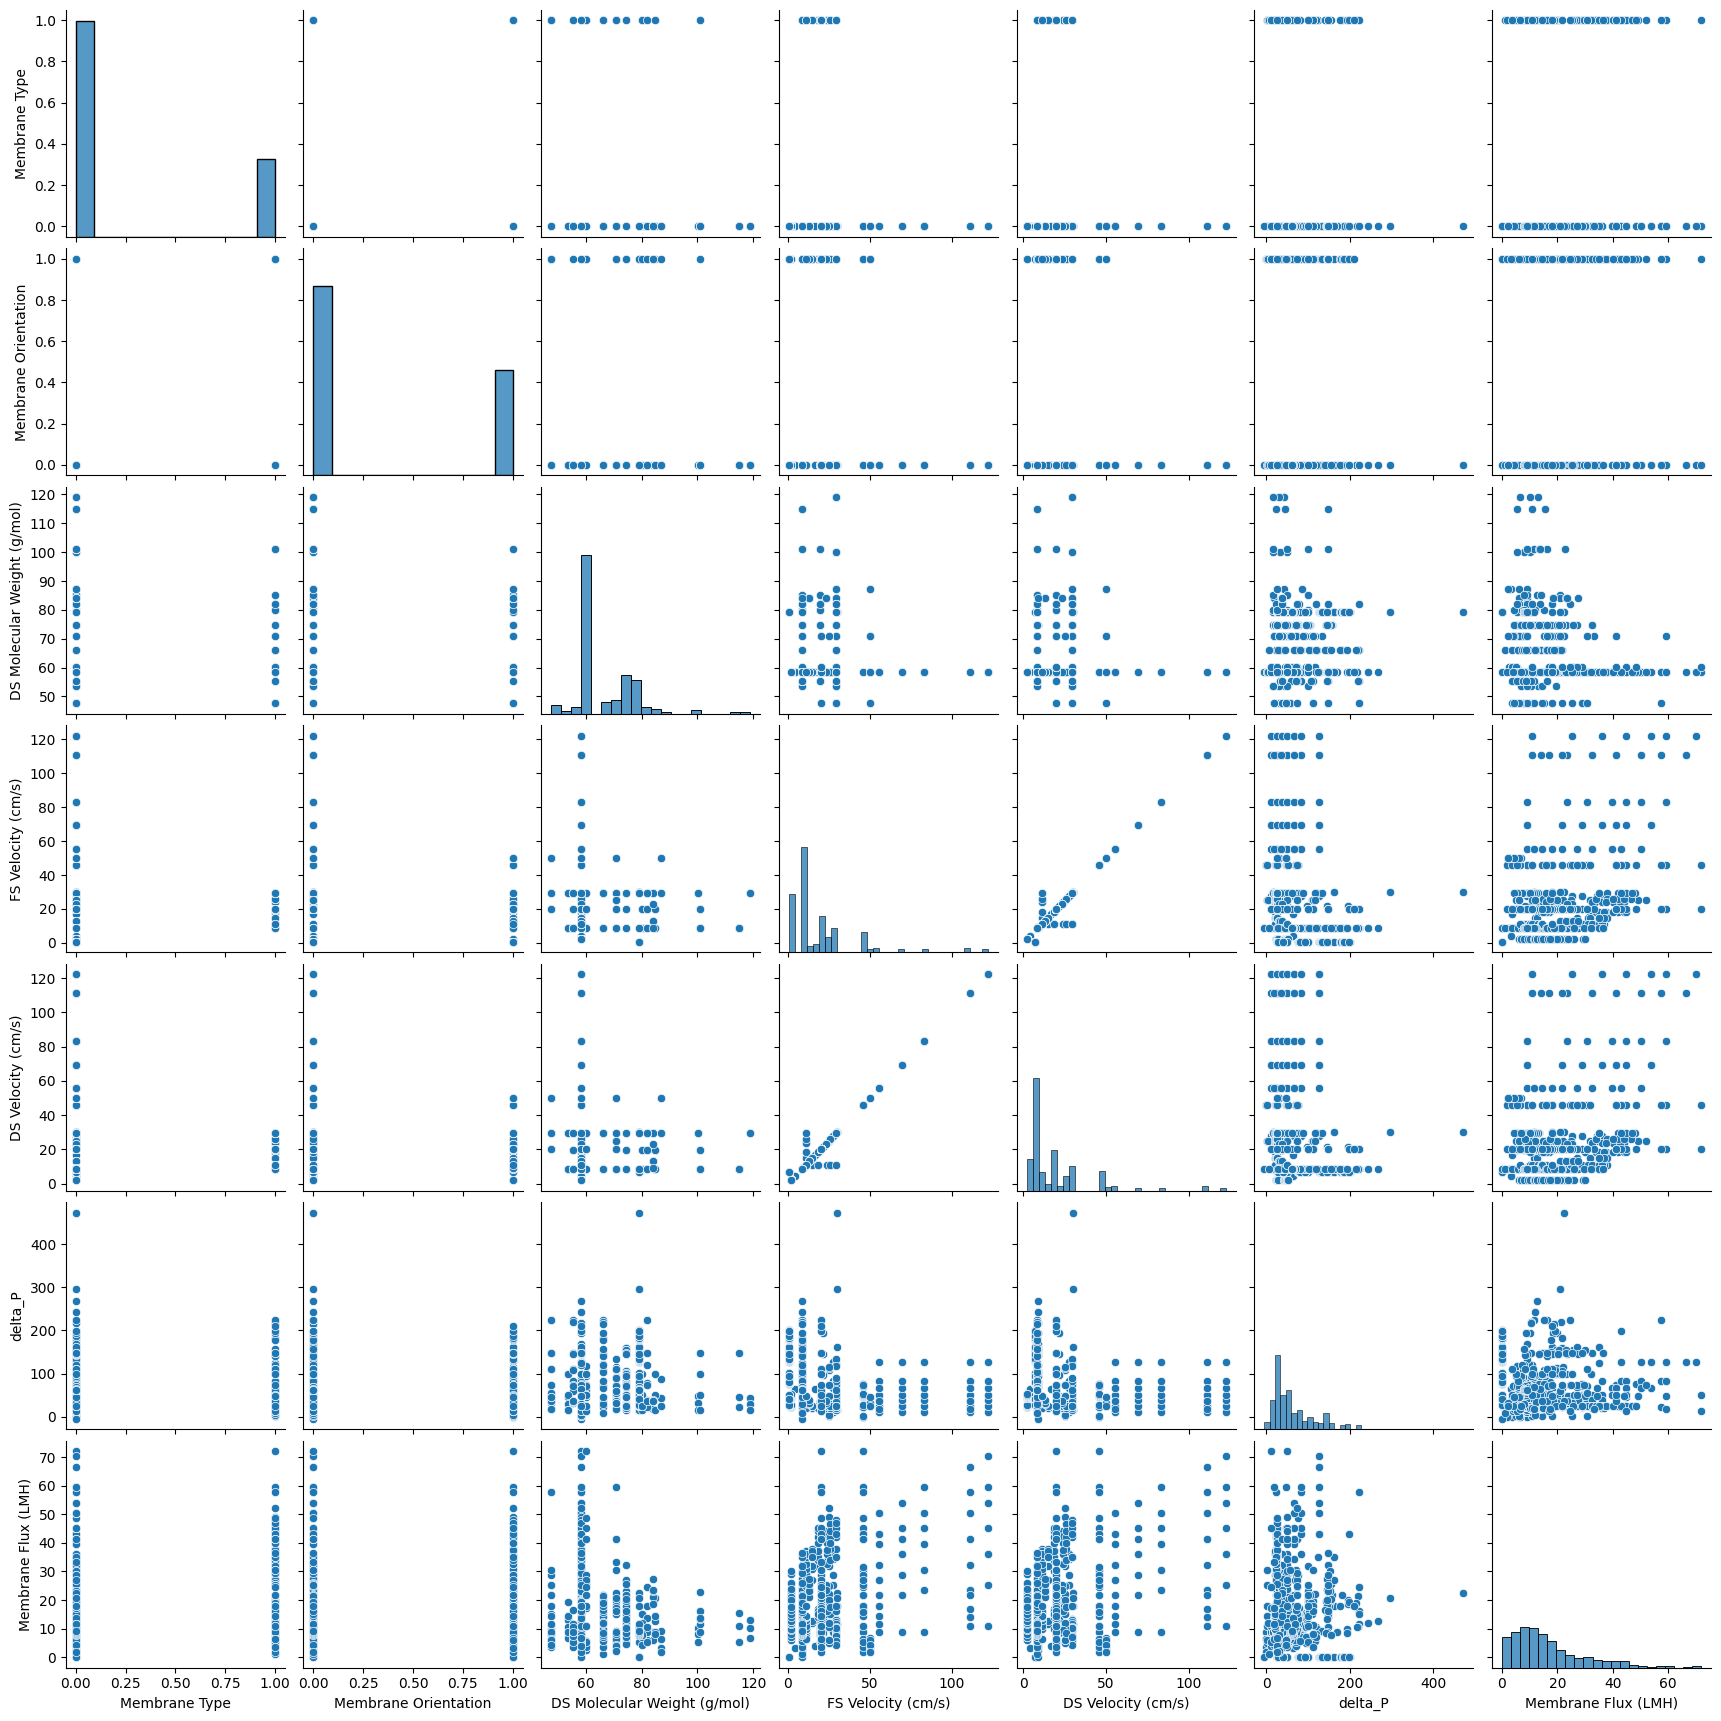

In [36]:
# scatterplot matrix
sns.pairplot(df)
plt.show()

`more cleaning`
* here we remove the data point where the pressure is very high since it looks like an outlier
* we also get rid of the two velocity features since they are almost the same, and take their mean instead and call the new feature mean velocity

In [ ]:
# remove first row
df = df.iloc[1:]


In [ ]:
# merge velocities 
df['Velocity Mean (cm/s)'] = df[['FS Velocity (cm/s)', 'DS Velocity (cm/s)']].mean(axis=1)

# remove the two features now that you got their mean
columns_to_remove = ['FS Velocity (cm/s)', 'DS Velocity (cm/s)']
df = df.drop(columns=columns_to_remove)

In [43]:
df.head()

Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
1              0                     0                       79.056   
2              0                     0                       79.056   
3              0                     0                       79.056   
4              0                     1                       58.440   
5              0                     1                       58.440   

      delta_P  Membrane Flux (LMH)  Velocity Mean (cm/s)  
1  295.414185                20.88                  30.0  
2  161.135010                18.00                  30.0  
3   16.113501                11.52                  30.0  
4    0.000000                 3.60                  45.8  
5    2.436149                18.00                  45.8

In [44]:


# making the flux the last feature instead of v


# Extract column names
columns = df.columns.tolist()

# Find the index of "v" and "Membrane Flux (LMH)"
index_delta_p = columns.index("Velocity Mean (cm/s)")
index_membrane_flux = columns.index("Membrane Flux (LMH)")

# Swap the positions of the columns
columns[index_delta_p], columns[index_membrane_flux] = columns[index_membrane_flux], columns[index_delta_p]

# Reindex the dataframe with the new column order
df = df.reindex(columns=columns)

# Now "v" and "Membrane Flux (LMH)" columns have swapped positions in the dataframe

df.head()


Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
1              0                     0                       79.056   
2              0                     0                       79.056   
3              0                     0                       79.056   
4              0                     1                       58.440   
5              0                     1                       58.440   

      delta_P  Velocity Mean (cm/s)  Membrane Flux (LMH)  
1  295.414185                  30.0                20.88  
2  161.135010                  30.0                18.00  
3   16.113501                  30.0                11.52  
4    0.000000                  45.8                 3.60  
5    2.436149                  45.8                18.00

In [45]:
# make it look better
df = df.rename(columns={'delta_P': 'Delta_P (bar)'})
df.head()

Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
1              0                     0                       79.056   
2              0                     0                       79.056   
3              0                     0                       79.056   
4              0                     1                       58.440   
5              0                     1                       58.440   

   Delta_P (bar)  Velocity Mean (cm/s)  Membrane Flux (LMH)  
1     295.414185                  30.0                20.88  
2     161.135010                  30.0                18.00  
3      16.113501                  30.0                11.52  
4       0.000000                  45.8                 3.60  
5       2.436149                  45.8                18.00

In [49]:
df.shape

(708, 6)

`Data Sub-setting`

to reduce number of features in our data set, we will create 4 models, each model will deal with one condition.

In [53]:

# Create subsets based on Membrane Type and Membrane Orientation
subset_00 = df[(df['Membrane Type'] == 0) & (df['Membrane Orientation'] == 0)]
subset_11 = df[(df['Membrane Type'] == 1) & (df['Membrane Orientation'] == 1)]
subset_10 = df[(df['Membrane Type'] == 1) & (df['Membrane Orientation'] == 0)]
subset_01 = df[(df['Membrane Type'] == 0) & (df['Membrane Orientation'] == 1)]

# Display the size of each subset
print("Size of Subset when Membrane Type is 0 and Membrane Orientation is 0:", subset_00.shape)
print("Size of Subset when Membrane Type is 1 and Membrane Orientation is 1:", subset_11.shape)
print("Size of Subset when Membrane Type is 1 and Membrane Orientation is 0:", subset_10.shape)
print("Size of Subset when Membrane Type is 0 and Membrane Orientation is 1:", subset_01.shape)

# Save each subset to a CSV file
subset_00.to_csv('subset_00.csv', index=False)
subset_11.to_csv('subset_11.csv', index=False)
subset_10.to_csv('subset_10.csv', index=False)
subset_01.to_csv('subset_01.csv', index=False)


Size of Subset when Membrane Type is 0 and Membrane Orientation is 0: (391, 6)
Size of Subset when Membrane Type is 1 and Membrane Orientation is 1: (123, 6)
Size of Subset when Membrane Type is 1 and Membrane Orientation is 0: (64, 6)
Size of Subset when Membrane Type is 0 and Membrane Orientation is 1: (130, 6)


# Model 1:
Membrane Type 0 = CTA (Cellulose Triacetate Membrane)

Membrane Orientation 0 = AL-FS (active layer facing feed solution)

## Estimating the consequents of First Order takagi sugeno

General formula 

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + \sum_{k=1}^{n} a_{ik} x_k \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$



for our case

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + w_{Ai} A_i + w_{Bi} B_i + w_{Ci} C_i \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$


# Step 0
# Preparing the data


In [1]:

path = 'subset_00.csv'
df = pd.read_csv(path)
df.head()

Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
0              0                     0                       79.056   
1              0                     0                       79.056   
2              0                     0                       79.056   
3              0                     0                       58.440   
4              0                     0                       58.440   

   Delta_P (bar)  Velocity Mean (cm/s)  Membrane Flux (LMH)  
0     295.414185                  30.0                20.88  
1     161.135010                  30.0                18.00  
2      16.113501                  30.0                11.52  
3       0.000000                  45.8                 1.80  
4       2.436149                  45.8                10.80

In [2]:
# Remove first two columns of the dataset
df = df.drop(columns=['Membrane Type', 'Membrane Orientation'])

# Drop the first row as an outlier
df = df.drop(0)

# Rename columns
df = df.rename(columns={'DS Molecular Weight (g/mol)': 'dw_mw',
                        'Delta_P (bar)': 'delta_p',
                        'Velocity Mean (cm/s)': 'v',
                        'Membrane Flux (LMH)': 'fx'})

df.head()


dw_mw     delta_p     v     fx
1  79.056  161.135010  30.0  18.00
2  79.056   16.113501  30.0  11.52
3  58.440    0.000000  45.8   1.80
4  58.440    2.436149  45.8  10.80
5  58.440   21.925337  45.8  16.20

In [3]:

# Assuming df is your DataFrame containing the data

# Print feature names before changes
print("Feature names before changes:")
print(df.columns.tolist())

# Change feature names
df = df.rename(columns={'dw_mw': 'A', 'delta_p': 'B', 'v': 'C', 'fx': 'Y'})

# Print feature names after changes
print("\nFeature names after changes:")
print(df.columns.tolist())


Feature names before changes:
['dw_mw', 'delta_p', 'v', 'fx']

Feature names after changes:
['A', 'B', 'C', 'Y']


In [4]:
df.head()

A           B     C      Y
1  79.056  161.135010  30.0  18.00
2  79.056   16.113501  30.0  11.52
3  58.440    0.000000  45.8   1.80
4  58.440    2.436149  45.8  10.80
5  58.440   21.925337  45.8  16.20

In [5]:

# perform z score normalization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the entire DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Now df_normalized contains z-score normalized values for all columns in df
df_normalized.head()

A         B         C         Y
0  0.914817  1.729615  0.303956  0.398544
1  0.914817 -1.089011  0.303956 -0.170001
2 -0.782530 -1.402192  0.893222 -1.022819
3 -0.782530 -1.354843  0.893222 -0.233173
4 -0.782530 -0.976053  0.893222  0.240614

In [7]:
# Assuming your dataframe is named df and the feature column is 'Y'
min_value = df_normalized['Y'].min()
max_value = df_normalized['Y'].max()
range_value = max_value - min_value

print(f"Minimum value of Y: {min_value}")
print(f"Maximum value of Y: {max_value}")
print(f"Range of Y: {range_value}")


Minimum value of Y: -1.1807484538122381
Maximum value of Y: 4.978490828896717
Range of Y: 6.159239282708955


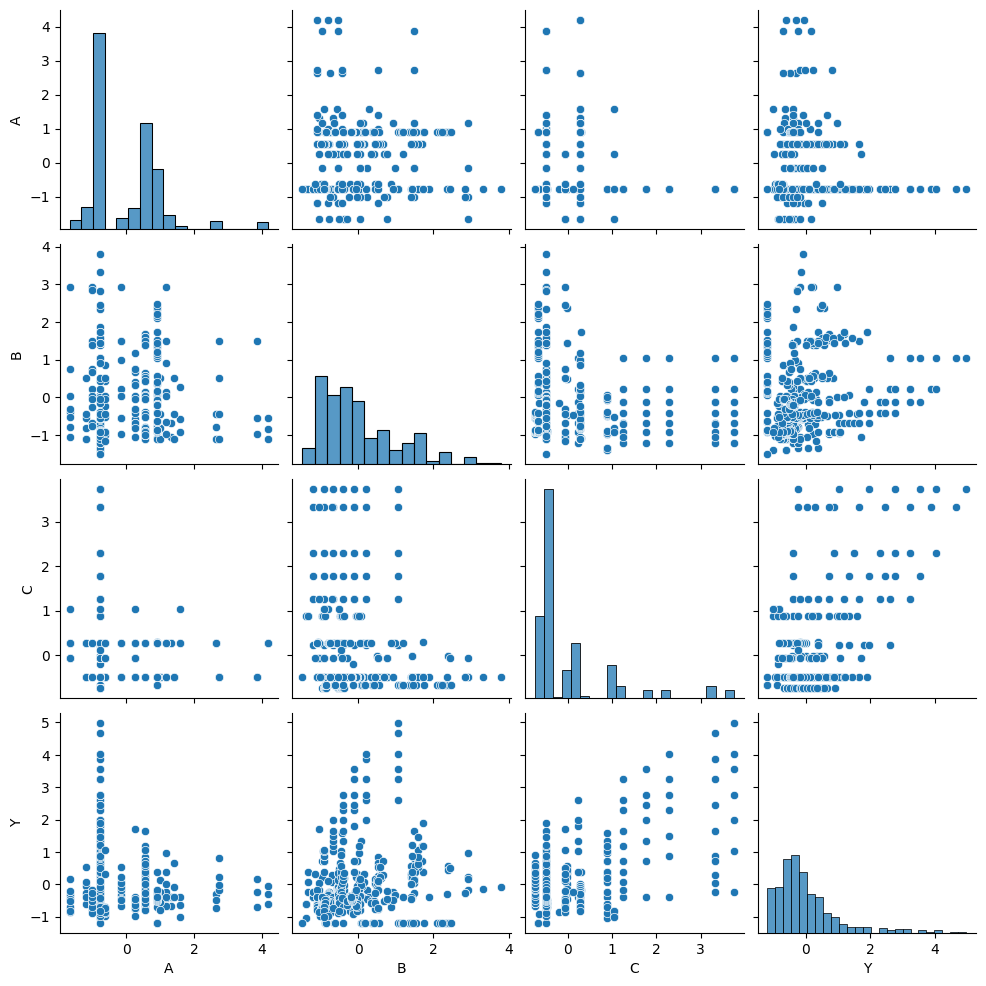

In [23]:

# Assuming df_normalized is your DataFrame
# Create a seaborn pairplot
sns.pairplot(df_normalized)


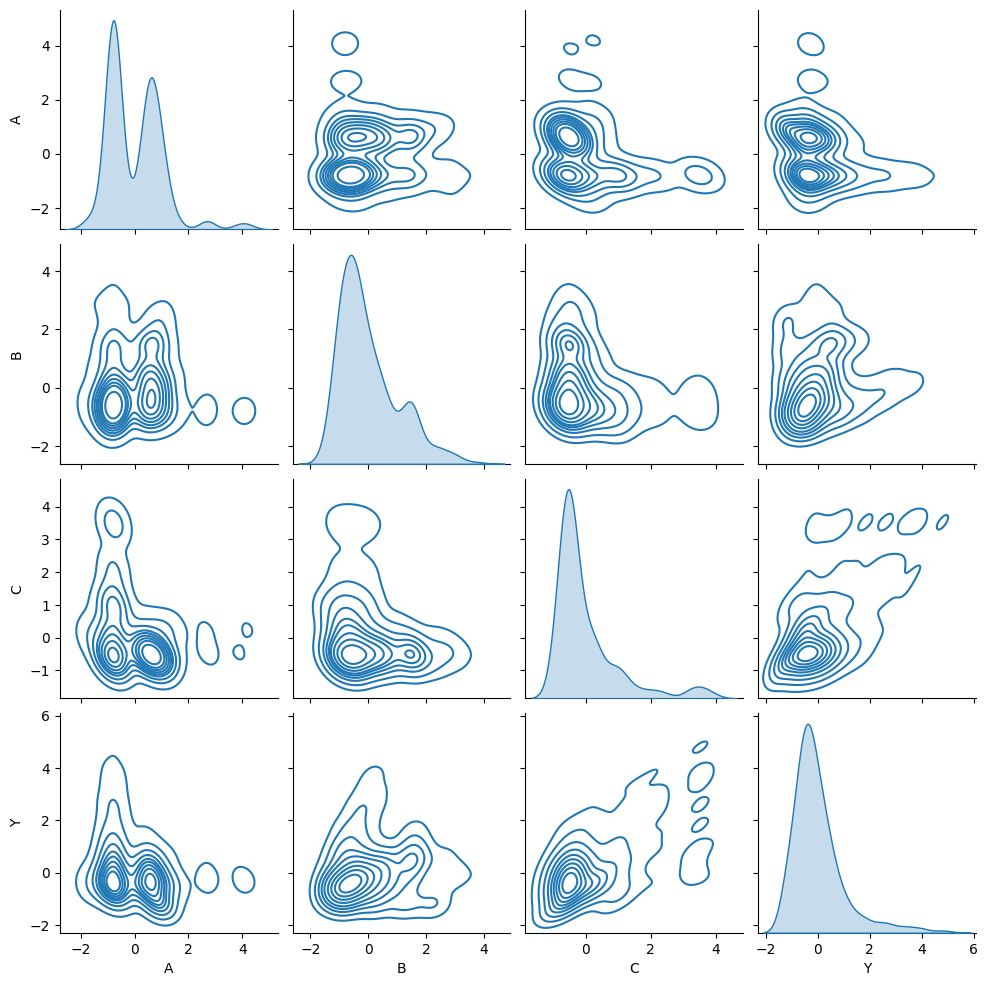

In [24]:
# make it curvy
g = sns.pairplot(df_normalized, diag_kind="kde", kind="kde")
plt.show()

In [25]:
# Split data into training and testing


from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with features (X) and target variable (y)

# Split the data into features (X) and target variable (y)
X = df_normalized.drop(columns=['Y'])  
y = df_normalized['Y']

# Split the features (X) and target variable (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Adjust the test_size parameter to set the proportion of the dataset to include in the test split



In [26]:
# Resetting the indexes
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.head()

A         B         C
0  0.914817  1.199567 -0.678403
1 -0.782530 -0.667720  3.743329
2 -0.782530 -0.952944 -0.743296
3 -0.782530  1.438735 -0.497893
4  0.543913  1.598305 -0.496029

# Step 1
# Rules Generator

we need to create a function that generates all possible rules

max number of rules
$$ m^n $$

 m: number of sets per variable, n: number of input variables

In [27]:
import itertools

def generate_rule_base(num_input_variables, num_sets_per_variable):
    """
    Generate a rule base with all possible rules based on the specified number of input variables and sets per variable.

    Parameters:
    num_input_variables : int
        Number of input variables
    num_sets_per_variable : int
        Number of sets per input variable

    Returns:
    tuple
        A tuple containing the rule base (list of strings representing each rule) and the list of membership function names
    """
    # Define alphabet for variable names
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Generate input variable names
    input_variable_names = alphabet[:num_input_variables]

    # Generate fuzzy set names for each variable
    fuzzy_set_names = [[f"{var}_mf{i+1}" for i in range(num_sets_per_variable)] for var in input_variable_names]

    # Generate all possible combinations of fuzzy set names
    rule_combinations = itertools.product(*fuzzy_set_names)

    # Generate human-readable rules
    rule_base = []
    for i, rule in enumerate(rule_combinations, start=1):
        rule_str = f"Rule{i}: If "
        for j, variable in enumerate(input_variable_names):
            rule_str += f"{variable} is {rule[j]}"
            if j < num_input_variables - 1:
                rule_str += " and "
        rule_base.append(rule_str)

    # Flatten the list of fuzzy set names
    membership_function_names = [item for sublist in fuzzy_set_names for item in sublist]

    return rule_base, membership_function_names

# Example usage
num_input_variables = 3
num_sets_per_variable = 3
rule_base, membership_function_names = generate_rule_base(num_input_variables, num_sets_per_variable)

print("Rule base:")
for rule in rule_base:
    print(rule)

print("\nMembership functions:")
print(membership_function_names)


Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3
Rule7: If A is A_mf1 and B is B_mf3 and C is C_mf1
Rule8: If A is A_mf1 and B is B_mf3 and C is C_mf2
Rule9: If A is A_mf1 and B is B_mf3 and C is C_mf3
Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3
Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2
Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3
Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1
Rule17: If A is A_mf2 and B is B_mf3 and C is C_mf2
Rule18: If A is A_mf2 and B is B_mf3 and C is C_mf3
Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1
Rule20: If

# Step 2
# Parameters setting of the gaussian membership functions


Membership function partitions for A:
A_mf1: Mean=-1.675, Std Dev=0.735
A_mf2: Mean=1.265, Std Dev=0.735
A_mf3: Mean=4.204, Std Dev=0.735

Membership function partitions for B:
B_mf1: Mean=-1.498, Std Dev=0.662
B_mf2: Mean=1.151, Std Dev=0.662
B_mf3: Mean=3.800, Std Dev=0.662

Membership function partitions for C:
C_mf1: Mean=-0.743, Std Dev=0.561
C_mf2: Mean=1.500, Std Dev=0.561
C_mf3: Mean=3.743, Std Dev=0.561


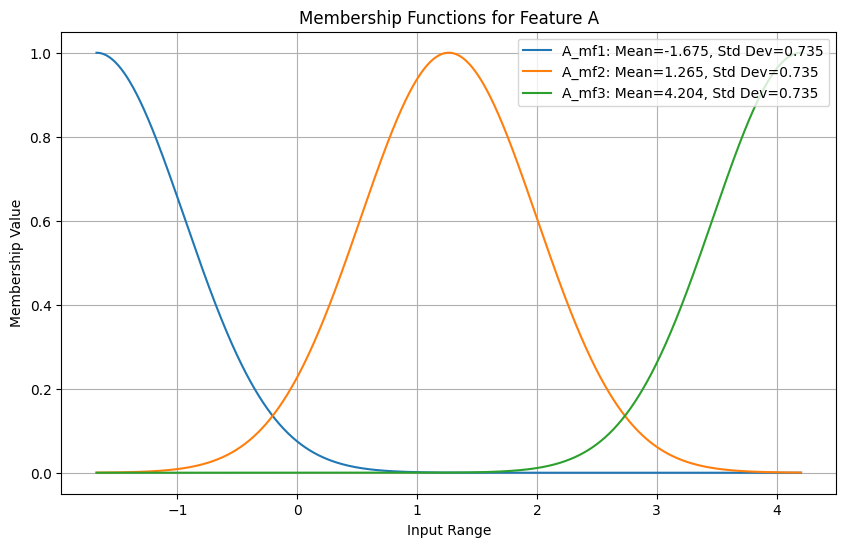

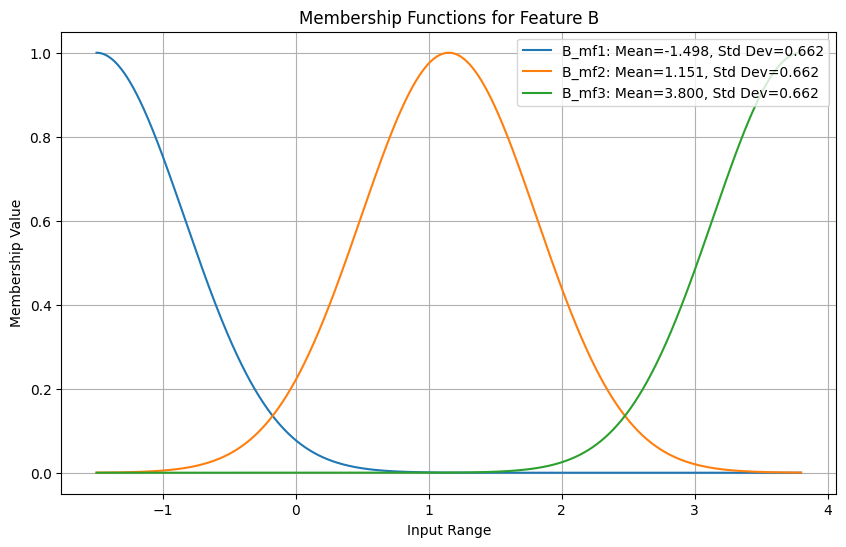

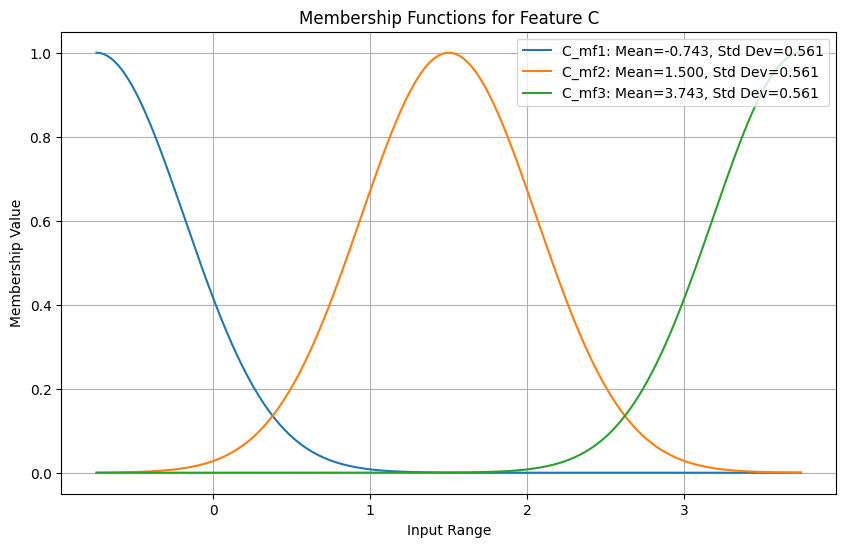

In [28]:


def perform_partitioning_and_plot(X, num_membership_functions):
    """
    Perform grid partitioning and plot membership functions for each feature in the DataFrame.

    Parameters:
    X : pandas.DataFrame
        DataFrame containing the features
    num_membership_functions : int
        Number of membership functions
    """
    membership_function_details = []
    
    for feature in X.columns:
        # Calculate the input range for the current feature
        input_range = (X[feature].min(), X[feature].max())

        # Calculate the width of each partition
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)

        # Calculate mean and standard deviation for each partition
        membership_functions = []
        for i in range(num_membership_functions):
            mean = input_range[0] + i * partition_width
            std_dev = partition_width / 4  # Assuming a standard deviation of one-fourth of the partition width
            membership_functions.append((mean, std_dev))

        # Collect the calculated means and standard deviations
        details = f"\nMembership function partitions for {feature}:"
        for i, (mean, std_dev) in enumerate(membership_functions):
            details += f"\n{feature}_mf{i+1}: Mean={mean:.3f}, Std Dev={std_dev:.3f}"
        
        membership_function_details.append(details)
    
    # Print all membership function details together
    for detail in membership_function_details:
        print(detail)

    # Plot Gaussian membership functions based on their mean and standard deviation
    for feature in X.columns:
        input_range = (X[feature].min(), X[feature].max())
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)
        membership_functions = [(input_range[0] + i * partition_width, partition_width / 4) for i in range(num_membership_functions)]
        
        x = np.linspace(input_range[0], input_range[1], 1000)
        plt.figure(figsize=(10, 6))
        for i, (mean, std_dev) in enumerate(membership_functions):
            y = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
            plt.plot(x, y, label=f'{feature}_mf{i+1}: Mean={mean:.3f}, Std Dev={std_dev:.3f}')
        plt.xlabel('Input Range')
        plt.ylabel('Membership Value')
        plt.title(f'Membership Functions for Feature {feature}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
num_membership_functions = 3
perform_partitioning_and_plot(X_train, num_membership_functions)


# Step 3: calculate membership values per data row

In [30]:


def calculate_membership_values(X, num_membership_functions):
    """
    Calculate the membership values for each feature value in the DataFrame using Gaussian membership functions.

    Parameters:
    X : pandas.DataFrame
        DataFrame containing the features
    num_membership_functions : int
        Number of membership functions
    """
    membership_values = {}

    for feature in X.columns: #his loops over each column
        # Calculate the input range for the current feature
        input_range = (X[feature].min(), X[feature].max())

        # Calculate the width of each partition
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)

        # Calculate mean and standard deviation for each partition
        membership_functions = [(input_range[0] + i * partition_width, partition_width / 4) for i in range(num_membership_functions)]

        # Calculate membership values for each feature value in the DataFrame
        membership_values[feature] = {}
        for i, (mean, std_dev) in enumerate(membership_functions):
            mf_label = f'{feature}_mf{i+1}'
            membership_values[feature][mf_label] = np.exp(-0.5 * ((X[feature] - mean) / std_dev) ** 2)
    
    # Convert the membership values to a DataFrame for better readability
    membership_values_df = pd.DataFrame()
    for feature in membership_values:
        for mf_label in membership_values[feature]:
            membership_values_df[mf_label] = membership_values[feature][mf_label]
    
    return membership_values_df

num_membership_functions = 3
# we already have values of x_train
membership_values_df = calculate_membership_values(X_train, num_membership_functions)

membership_values_df.head()


A_mf1     A_mf2         A_mf3     B_mf1     B_mf2         B_mf3  \
0  0.002010  0.892923  4.463571e-05  0.000250  0.997323  4.484199e-04   
1  0.478563  0.020636  1.001338e-10  0.455996  0.022996  1.305104e-10   
2  0.478563  0.020636  1.001338e-10  0.713037  0.006420  6.504529e-12   
3  0.478563  0.020636  1.001338e-10  0.000054  0.909954  1.735123e-03   
4  0.010483  0.618227  4.103159e-06  0.000018  0.796055  3.980056e-03   

          C_mf1     C_mf2         C_mf3  
0  9.933279e-01  0.000529  3.174603e-14  
1  1.266417e-14  0.000335  1.000000e+00  
2  1.000000e+00  0.000335  1.266417e-14  
3  9.087048e-01  0.001755  3.813141e-13  
4  9.073787e-01  0.001776  3.910217e-13

In [31]:
membership_values_df.shape

(312, 9)

# Step 3.1:
# Calculate Firing Strengths and Omit redundant rules

here we calculate the firing strength of each rule across all training data (defined for each rule as the product T-norm of its fuzzy sets), then we get 27 values, each value represents the sum of firing strength per rule

In [32]:

# Assuming membership_values_df is already defined with shape (312, 9)
# Here is a sample definition to illustrate:
# membership_values_df = pd.DataFrame({
#     'A_mf1': [...],
#     'A_mf2': [...],
#     'A_mf3': [...],
#     'B_mf1': [...],
#     'B_mf2': [...],
#     'B_mf3': [...],
#     'C_mf1': [...],
#     'C_mf2': [...],
#     'C_mf3': [...]
# })

# Define rule combinations
rule_combinations = [
    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'),
    ('A_mf1', 'B_mf3', 'C_mf1'), ('A_mf1', 'B_mf3', 'C_mf2'), ('A_mf1', 'B_mf3', 'C_mf3'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'),
    ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf2', 'B_mf3', 'C_mf2'), ('A_mf2', 'B_mf3', 'C_mf3'),
    ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'),
    ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf2', 'C_mf2'), ('A_mf3', 'B_mf2', 'C_mf3'),
    ('A_mf3', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf2'), ('A_mf3', 'B_mf3', 'C_mf3')
]

# Initialize an empty dataframe to store firing strengths
df_fire = pd.DataFrame(index=membership_values_df.index)

# Calculate firing strengths for each rule combination
for i, rule in enumerate(rule_combinations):
    rule_name = f'Rule_{i+1}'
    df_fire[rule_name] = (
        membership_values_df[rule[0]] * 
        membership_values_df[rule[1]] * 
        membership_values_df[rule[2]]
    )

# Display the resulting dataframe
df_fire.head()


Rule_1        Rule_2        Rule_3        Rule_4    Rule_5  \
0  4.984266e-07  2.656168e-10  1.592935e-20  1.991417e-03  0.000001   
1  2.763611e-15  7.320564e-05  2.182229e-01  1.393718e-16  0.000004   
2  3.412333e-01  1.144710e-04  4.321434e-15  3.072268e-03  0.000001   
3  2.335390e-05  4.509676e-08  9.799850e-18  3.957144e-01  0.000764   
4  1.704275e-07  3.335044e-10  7.344324e-20  7.571771e-03  0.000015   

         Rule_6        Rule_7        Rule_8        Rule_9       Rule_10  ...  \
0  6.364423e-17  8.953883e-07  4.771618e-10  2.861596e-20  2.214019e-04  ...   
1  1.100521e-02  7.909723e-25  2.095216e-14  6.245751e-11  1.191663e-16  ...   
2  3.890772e-17  3.112829e-12  1.044238e-15  3.942138e-26  1.471390e-02  ...   
3  1.660511e-13  7.545579e-04  1.457063e-06  3.166304e-16  1.007015e-06  ...   
4  3.262945e-15  3.785678e-05  7.408080e-08  1.631383e-17  1.005129e-05  ...   

        Rule_18       Rule_19       Rule_20       Rule_21       Rule_22  \
0  1.271125e-17  1.106751e-08  5.897991e-12  3.537094e-22  4.421919e-05   
1  2.693154e-12  5.782535e-25  1.531743e-14  4.566061e-11  2.916193e-26   
2  1.699841e-27  7.139908e-11  2.395172e-14  9.042098e-25  6.428364e-13   
3  1.365303e-17  4.886532e-15  9.435971e-18  2.050505e-27  8.279863e-11   
4  9.621394e-16  6.671016e-11  1.305431e-13  2.874778e-23  2.963807e-06   

        Rule_23       Rule_24       Rule_25       Rule_26       Rule_27  
0  2.356487e-08  1.413213e-18  1.988200e-08  1.059532e-11  6.354140e-22  
1  7.724739e-16  2.302712e-12  1.655017e-34  4.383996e-24  1.306851e-20  
2  2.156476e-16  8.140986e-27  6.513232e-22  2.184946e-25  8.248465e-36  
3  1.598855e-13  3.474427e-23  1.578825e-13  3.048735e-16  6.625121e-26  
4  5.799785e-09  1.277210e-18  1.481822e-08  2.899733e-11  6.385698e-21  

[5 rows x 27 columns]

In [33]:

# Assuming df is your dataframe
column_sums = df_fire.sum()

print(column_sums)


Rule_1     1.210024e+01
Rule_2     5.475692e+00
Rule_3     1.901864e+00
Rule_4     8.379049e+00
Rule_5     1.247279e+00
Rule_6     1.344971e+00
Rule_7     1.429275e+00
Rule_8     1.328712e-02
Rule_9     1.513871e-04
Rule_10    1.847223e+01
Rule_11    6.447247e-01
Rule_12    8.200796e-02
Rule_13    2.964223e+01
Rule_14    2.148244e-01
Rule_15    5.799485e-02
Rule_16    9.257920e-01
Rule_17    1.321978e-03
Rule_18    6.527775e-06
Rule_19    1.208327e+00
Rule_20    1.069206e-01
Rule_21    6.077129e-09
Rule_22    2.336888e-01
Rule_23    5.617485e-03
Rule_24    5.620584e-10
Rule_25    3.682505e-04
Rule_26    6.817029e-07
Rule_27    3.183238e-14
dtype: float64


In [34]:
# Sort the column sums from highest values to lowest values
sorted_column_sums = column_sums.sort_values(ascending=False)

print(sorted_column_sums)

Rule_13    2.964223e+01
Rule_10    1.847223e+01
Rule_1     1.210024e+01
Rule_4     8.379049e+00
Rule_2     5.475692e+00
Rule_3     1.901864e+00
Rule_7     1.429275e+00
Rule_6     1.344971e+00
Rule_5     1.247279e+00
Rule_19    1.208327e+00
Rule_16    9.257920e-01
Rule_11    6.447247e-01
Rule_22    2.336888e-01
Rule_14    2.148244e-01
Rule_20    1.069206e-01
Rule_12    8.200796e-02
Rule_15    5.799485e-02
Rule_8     1.328712e-02
Rule_23    5.617485e-03
Rule_17    1.321978e-03
Rule_25    3.682505e-04
Rule_9     1.513871e-04
Rule_18    6.527775e-06
Rule_26    6.817029e-07
Rule_21    6.077129e-09
Rule_24    5.620584e-10
Rule_27    3.183238e-14
dtype: float64


lets investigate our rules

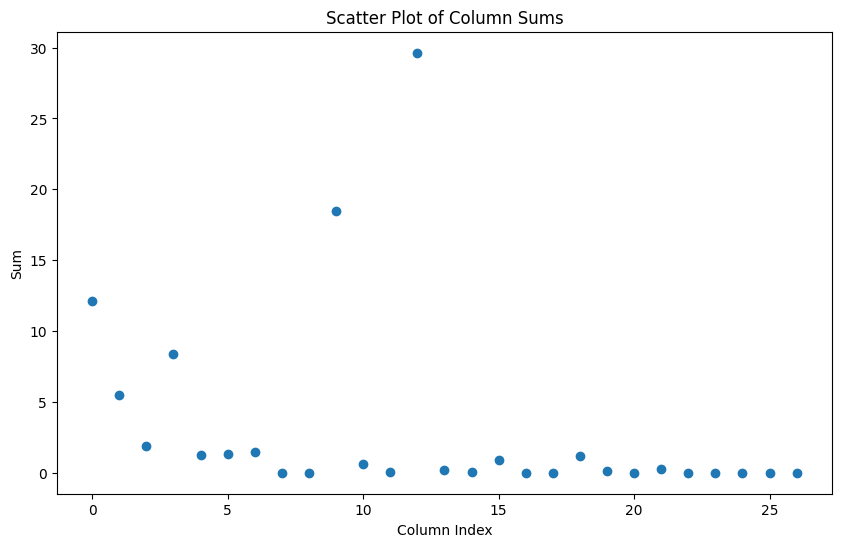

In [35]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(column_sums)), column_sums)
plt.title('Scatter Plot of Column Sums')
plt.xlabel('Column Index')
plt.ylabel('Sum')
plt.show()


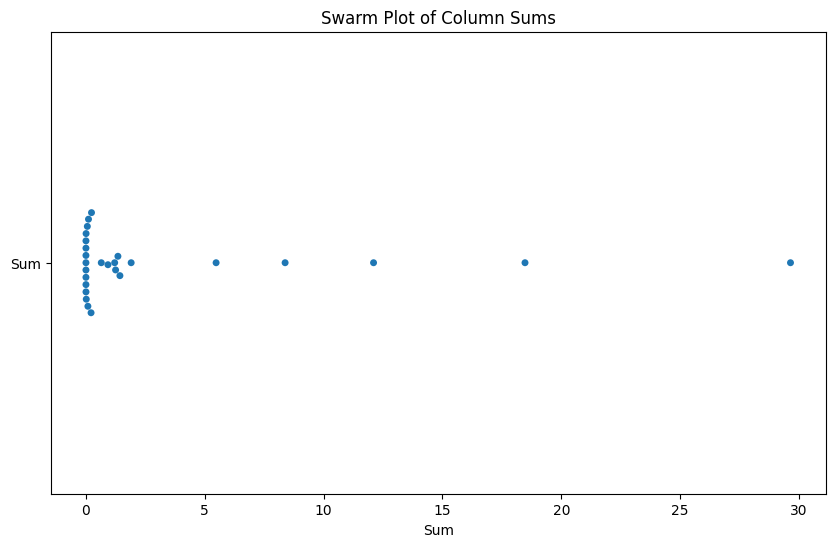

In [36]:


# Assuming column_sums is already calculated
column_sums = df_fire.sum()

# Convert to DataFrame for easier plotting
column_sums_df = pd.DataFrame(column_sums, columns=['Sum'])

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=column_sums_df, orient='h')
plt.title('Swarm Plot of Column Sums')
plt.xlabel('Sum')
plt.show()


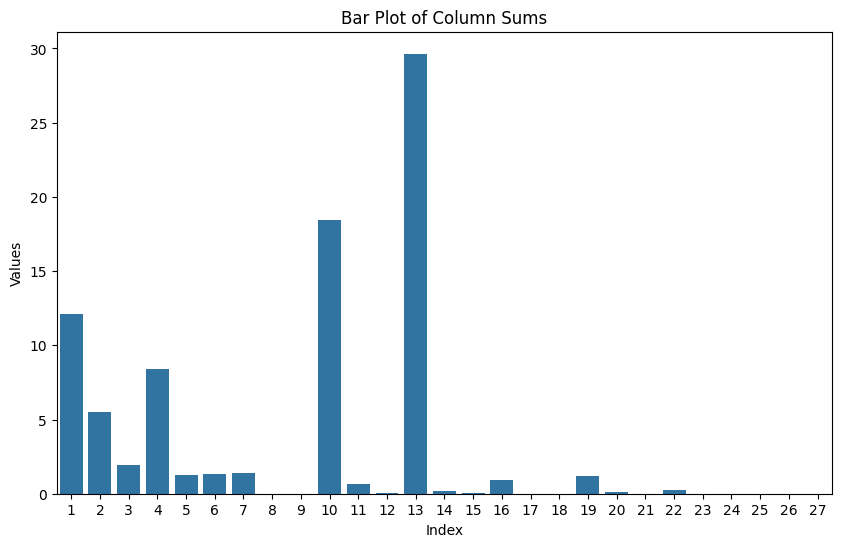

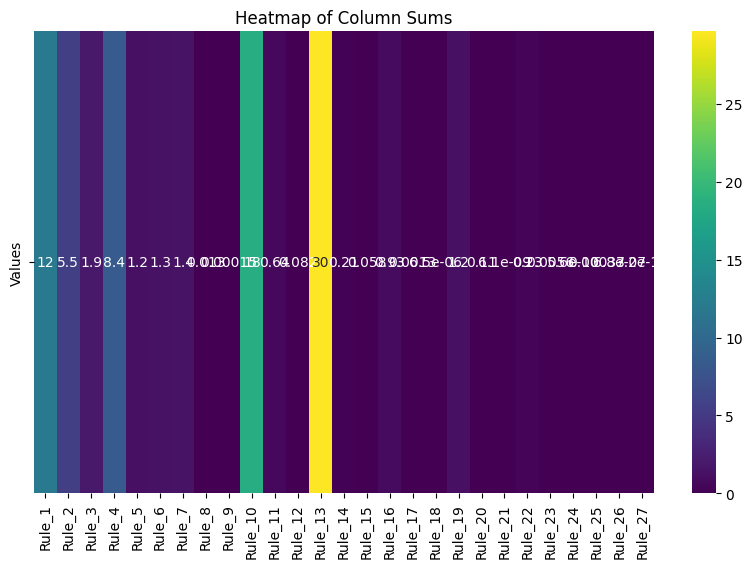

<Figure size 1200x1000 with 0 Axes>

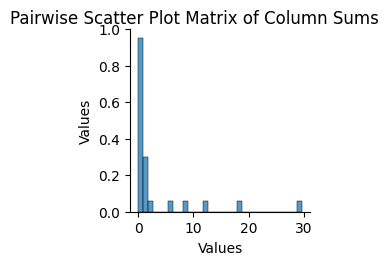

In [37]:

# Assuming column_sums contains your values
# column_sums = df_fire.sum()

# Create a DataFrame from column_sums
df = pd.DataFrame(column_sums, columns=['Values'])

# Generate Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index.map(lambda x: int(x.split('_')[1])), y='Values', data=df)
plt.title('Bar Plot of Column Sums')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

# Generate Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.transpose(), cmap='viridis', annot=True)
plt.title('Heatmap of Column Sums')
plt.show()

# Generate Scatter Plot Matrix
plt.figure(figsize=(12, 10))
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plot Matrix of Column Sums', y=1.02)
plt.show()


the following rules have low firing strenghts and will be removed before carrying out the least squares estimate, please note we removed anything < 10e-2

Rule_15    6.129988e-02

Rule_12    6.118931e-02

Rule_8     1.467608e-02

Rule_23    6.141578e-03

Rule_25    2.220318e-03

Rule_17    2.108982e-03

Rule_9     1.515780e-04

Rule_18    6.536053e-06

Rule_26    4.288392e-06

Rule_21    1.844994e-08

Rule_24    6.624616e-10

Rule_27    3.493608e-14



# Step 3.2:
# Update the rule base

In [40]:
import itertools

def generate_rule_base(num_input_variables, num_sets_per_variable):
    """
    Generate a rule base with all possible rules based on the specified number of input variables and sets per variable.

    Parameters:
    num_input_variables : int
        Number of input variables
    num_sets_per_variable : int
        Number of sets per input variable

    Returns:
    tuple
        A tuple containing the rule base (list of strings representing each rule) and the list of membership function names
    """
    # Define alphabet for variable names
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Generate input variable names
    input_variable_names = alphabet[:num_input_variables]

    # Generate fuzzy set names for each variable
    fuzzy_set_names = [[f"{var}_mf{i+1}" for i in range(num_sets_per_variable)] for var in input_variable_names]

    # Generate all possible combinations of fuzzy set names
    rule_combinations = itertools.product(*fuzzy_set_names)

    # Generate human-readable rules
    rule_base = []
    for i, rule in enumerate(rule_combinations, start=1):
        rule_str = f"Rule{i}: If "
        for j, variable in enumerate(input_variable_names):
            rule_str += f"{variable} is {rule[j]}"
            if j < num_input_variables - 1:
                rule_str += " and "
        rule_base.append(rule_str)

    # Flatten the list of fuzzy set names
    membership_function_names = [item for sublist in fuzzy_set_names for item in sublist]

    return rule_base, membership_function_names

def remove_rules(rule_base):
    """
    Remove specified rules from the rule base.

    Parameters:
    rule_base : list of str
        List of rules in the rule base

    Returns:
    list of str
        Updated rule base with specified rules removed
    """
    print("Current Rule base:")
    for i, rule in enumerate(rule_base):
        print(f"{i+1}. {rule}")

    rules_to_remove = input("Enter the rule numbers to remove, separated by commas (e.g., 1,3,5): ")
    rules_to_remove = [int(r.strip()) for r in rules_to_remove.split(",")]

    updated_rule_base = [rule for i, rule in enumerate(rule_base) if (i+1) not in rules_to_remove]

    return updated_rule_base

# Example usage
num_input_variables = 3
num_sets_per_variable = 3
rule_base, membership_function_names = generate_rule_base(num_input_variables, num_sets_per_variable)

print("Rule base:")
for rule in rule_base:
    print(rule)

remove = input("Would you like to remove any rules? (yes/no): ").strip().lower()
if remove == "yes":
    rule_base = remove_rules(rule_base)

print("\nUpdated Rule base:")
for rule in rule_base:
    print(rule)


Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3
Rule7: If A is A_mf1 and B is B_mf3 and C is C_mf1
Rule8: If A is A_mf1 and B is B_mf3 and C is C_mf2
Rule9: If A is A_mf1 and B is B_mf3 and C is C_mf3
Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3
Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2
Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3
Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1
Rule17: If A is A_mf2 and B is B_mf3 and C is C_mf2
Rule18: If A is A_mf2 and B is B_mf3 and C is C_mf3
Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1
Rule20: If

In [41]:
rule_combinations = [
    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'),
    ('A_mf1', 'B_mf3', 'C_mf1'), ('A_mf1', 'B_mf3', 'C_mf2'), ('A_mf1', 'B_mf3', 'C_mf3'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'),
    ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf2', 'B_mf3', 'C_mf2'), ('A_mf2', 'B_mf3', 'C_mf3'),
    ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'),
    ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf2', 'C_mf2'), ('A_mf3', 'B_mf2', 'C_mf3'),
    ('A_mf3', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf2'), ('A_mf3', 'B_mf3', 'C_mf3')
]

updated_rules = [
    "Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1",
    "Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2",
    "Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3",
    "Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1",
    "Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2",
    "Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3",
    "Rule7: If A is A_mf1 and B is B_mf3 and C is C_mf1",
    "Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1",
    "Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2",
    "Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1",
    "Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2",
    "Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1",
    "Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1",
    "Rule20: If A is A_mf3 and B is B_mf1 and C is C_mf2",
    "Rule22: If A is A_mf3 and B is B_mf2 and C is C_mf1"
]

# Extract rule combinations from updated rules
updated_rule_combinations = []
for rule in updated_rules:
    parts = rule.split(" and ")
    combination = tuple(part.split(" is ")[1] for part in parts)
    updated_rule_combinations.append(combination)

# Output the updated rule combinations
print(updated_rule_combinations)


[('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'), ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'), ('A_mf1', 'B_mf3', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf2', 'C_mf1')]


# Step 4:
# Calculate the updated design matrix

for our case

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + w_{Ai} A_i + w_{Bi} B_i + w_{Ci} C_i \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$


In [42]:
# corrected second attempt
# Assuming membership_values_df and y_train are already provided

# Define the number of rules
num_rules = 15

# Initialize the design matrix
num_rows = membership_values_df.shape[0]
num_features = membership_values_df.shape[1] // 3  # Assuming 3 membership functions per input
design_matrix = np.zeros((num_rows, num_rules * (num_features + 1)))  # Extra column for intercept

# Define the membership function combinations for each rule
rule_combinations = [
    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
     ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'),
     ('A_mf1', 'B_mf3', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'),
     ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf3', 'C_mf1'),
     ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf2', 'C_mf1')
]

# Calculate the design matrix
for row_idx in range(num_rows):
    # Calculate the product for each rule
    products = []
    for (A_mf, B_mf, C_mf) in rule_combinations:
        product = (membership_values_df.at[row_idx, A_mf] * 
                   membership_values_df.at[row_idx, B_mf] * 
                   membership_values_df.at[row_idx, C_mf])
        products.append(product)
    
    # Fill the row in the design matrix with the normalized products and their interaction with input features
    total_product = sum(products)
    row_values = []
    if total_product != 0:
        for i, product in enumerate(products):
            normalized_product = product / total_product  # Normalize by dividing by the sum of products
            # Append the normalized product for the intercept term
            row_values.append(normalized_product)
            # Append the normalized product terms for each input variable
            for col_idx in range(num_features):
                row_values.append(normalized_product * X_train.iloc[row_idx, col_idx])
    else:
        row_values = [0] * (num_rules * (num_features + 1))

    design_matrix[row_idx, :] = row_values

# Convert the design matrix to a DataFrame for better readability
columns = []
for i in range(num_rules):
    columns.append(f'Rule{i+1}_intercept')
    for j in range(num_features):
        columns.append(f'Rule{i+1}_x{j+1}')

design_matrix_df = pd.DataFrame(design_matrix, columns=columns)

# Display the design matrix
design_matrix_df.head()


Rule1_intercept      Rule1_x1      Rule1_x2      Rule1_x3  Rule2_intercept  \
0     5.614687e-07  5.136412e-07  6.735195e-07 -3.809018e-07     2.992125e-10   
1     1.205194e-14 -9.431009e-15 -8.047325e-15  4.511439e-14     3.192454e-04   
2     9.497898e-01 -7.432392e-01 -9.050965e-01 -7.059754e-01     3.186190e-04   
3     5.635783e-05 -4.410170e-05  8.108399e-05 -2.806019e-05     1.088279e-07   
4     3.726788e-07  2.027050e-07  5.956545e-07 -1.848593e-07     7.292840e-10   

       Rule2_x1      Rule2_x2      Rule2_x3  Rule3_intercept      Rule3_x1  \
0  2.737248e-10  3.589256e-10 -2.029866e-10     1.794413e-20  1.641559e-20   
1 -2.498192e-04 -2.131666e-04  1.195041e-03     9.516571e-01 -7.447004e-01   
2 -2.493290e-04 -3.036261e-04 -2.368283e-04     1.202830e-14 -9.412504e-15   
3 -8.516109e-08  1.565745e-07 -5.418466e-08     2.364908e-17 -1.850612e-17   
4  3.966674e-10  1.165619e-09 -3.617456e-10     1.606005e-19  8.735279e-20   

   ...     Rule13_x2     Rule13_x3  Rule14_intercept     Rule14_x1  \
0  ...  1.495542e-08 -8.457881e-09      6.643981e-12  6.078027e-12   
1  ... -1.683809e-24  9.439660e-24      6.679838e-14 -5.227175e-14   
2  ... -1.893809e-10 -1.477171e-10      6.666731e-14 -5.216918e-14   
3  ...  1.696588e-14 -5.871267e-15      2.277096e-17 -1.781896e-17   
4  ...  2.331561e-10 -7.235919e-11      2.854625e-13  1.552669e-13   

      Rule14_x2     Rule14_x3  Rule15_intercept     Rule15_x1     Rule15_x2  \
0  7.969902e-12 -4.507294e-12      4.981212e-05  4.556898e-05  5.975299e-05   
1 -4.460262e-14  2.500483e-13      1.271734e-25 -9.951704e-26 -8.491625e-26   
2 -6.353022e-14 -4.955357e-14      1.789273e-12 -1.400160e-12 -1.705077e-12   
3  3.276139e-17 -1.133751e-17      1.998103e-10 -1.563576e-10  2.874742e-10   
4  4.562563e-13 -1.415975e-13      6.481044e-06  3.525127e-06  1.035869e-05   

      Rule15_x3  
0 -3.379267e-05  
1  4.760519e-25  
2 -1.329960e-12  
3 -9.948423e-11  
4 -3.214783e-06  

[5 rows x 60 columns]

# Step 5: Estimate the consequents using least squares algorithm

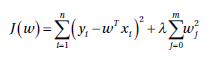

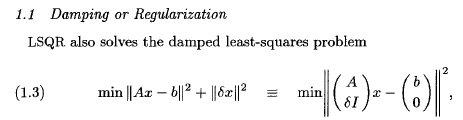

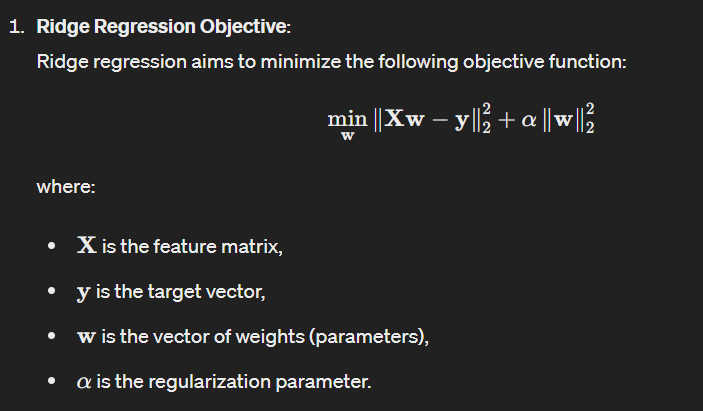

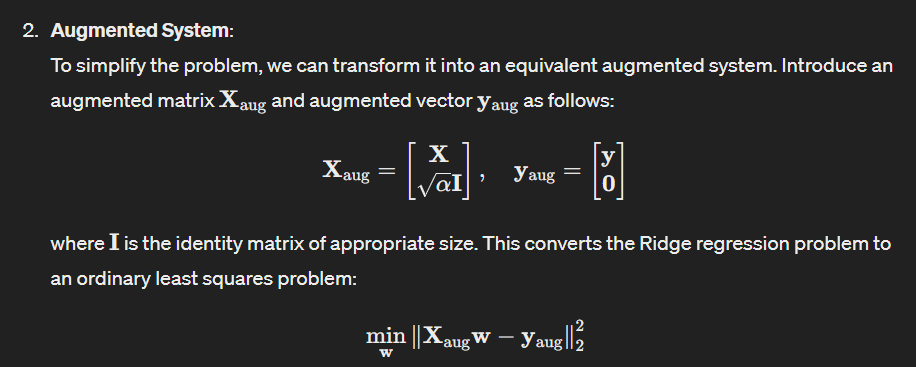

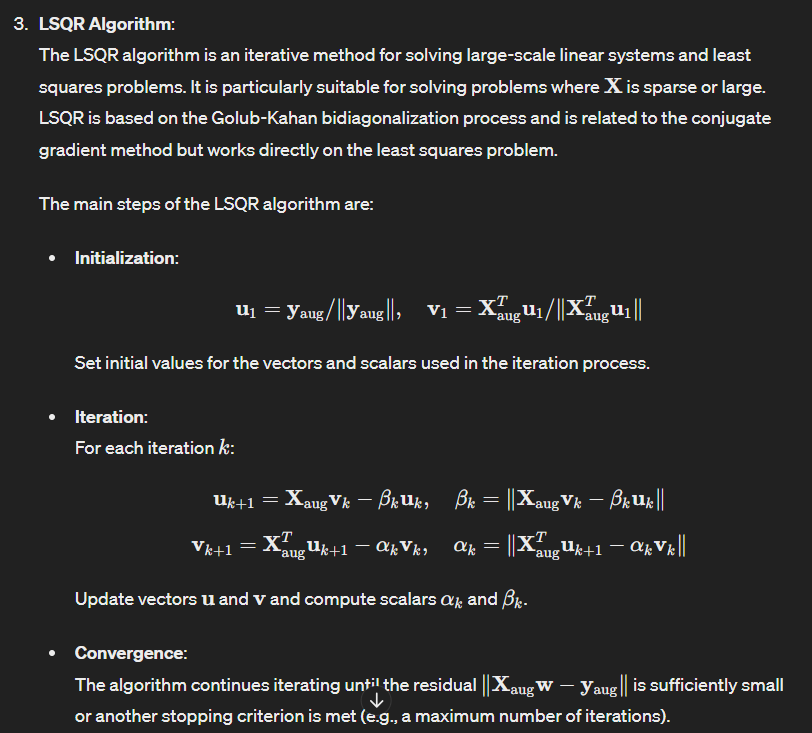

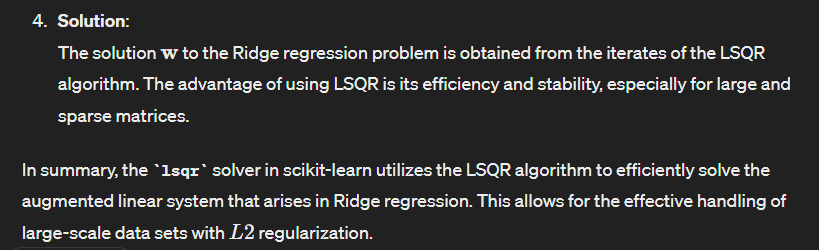

In [ ]:
"""Linear least squares with l2 regularization.

    Minimizes the objective function::

    ||y - Xw||^2_2 + alpha * ||w||^2_2

    This model solves a regression model where the loss function is
    the linear least squares function and regularization is given by
    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
    This estimator has built-in support for multi-variate regression
    (i.e., when y is a 2d-array of shape (n_samples, n_targets))."""

In [43]:
# perform linear least squares with l2 regularization
from sklearn.linear_model import Ridge

# Define the regularization strength (alpha)
alpha = 0.0  # You can adjust the value of alpha as needed

# Define the Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=alpha, solver='lsqr') # solver least squares with QR decomposition
# lsqr Find the least-squares solution to a large, sparse, linear system of equations.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html

# Fit the model to the design matrix and y_train
ridge_model.fit(design_matrix, y_train)

# Get the coefficients (consequents) from the trained model
consequents_regularized = ridge_model.coef_

# Display the consequents with L2 regularization
print("Consequents with L2 regularization:")

# Number of rules and features
num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
num_features = X_train.shape[1]

# Prepare data for tabular display
table_data = []

for rule_index in range(num_rules):
    intercept = consequents_regularized[rule_index * (num_features + 1)]
    weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
    row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
    table_data.append(row)

# Create a DataFrame for better visualization
column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
df = pd.DataFrame(table_data, columns=column_names)

# Display the consequents in a tabular format
print("Consequents:")
print(df.to_string(index=False))




Consequents with L2 regularization:
Consequents:
   Rule  Intercept  Weight for A  Weight for B  Weight for C
 Rule 1   2.627041      0.392383      1.187989     -0.117519
 Rule 2   4.174993      1.332882      1.599086      0.407891
 Rule 3   2.692228     -2.106750      3.753318      0.433615
 Rule 4   0.056406     -0.696994      1.075575      0.124463
 Rule 5   1.841890      0.717230      1.230363      2.078013
 Rule 6   1.273530     -0.996576      1.288572      0.858126
 Rule 7  -3.107978     -1.448072      0.776035     -0.938859
 Rule 8   2.213805      0.140747      0.123772      2.339112
 Rule 9  -3.842523     -0.441850     -2.334538      0.037422
Rule 10   5.723745      0.080325      0.367553      8.296356
Rule 11 -13.003491      0.640972     -0.457268     -2.956597
Rule 12  -4.475563     -0.539420      3.874816      7.363307
Rule 13   3.734005     -0.689423      1.070417     -1.790674
Rule 14   0.048644      1.608272      2.336305      0.007980
Rule 15   0.043268      0.601587    

# Step 6:
# Compile the model

 * Detected Sugeno model type
{'OUTPUT': 2.8098110132465894}


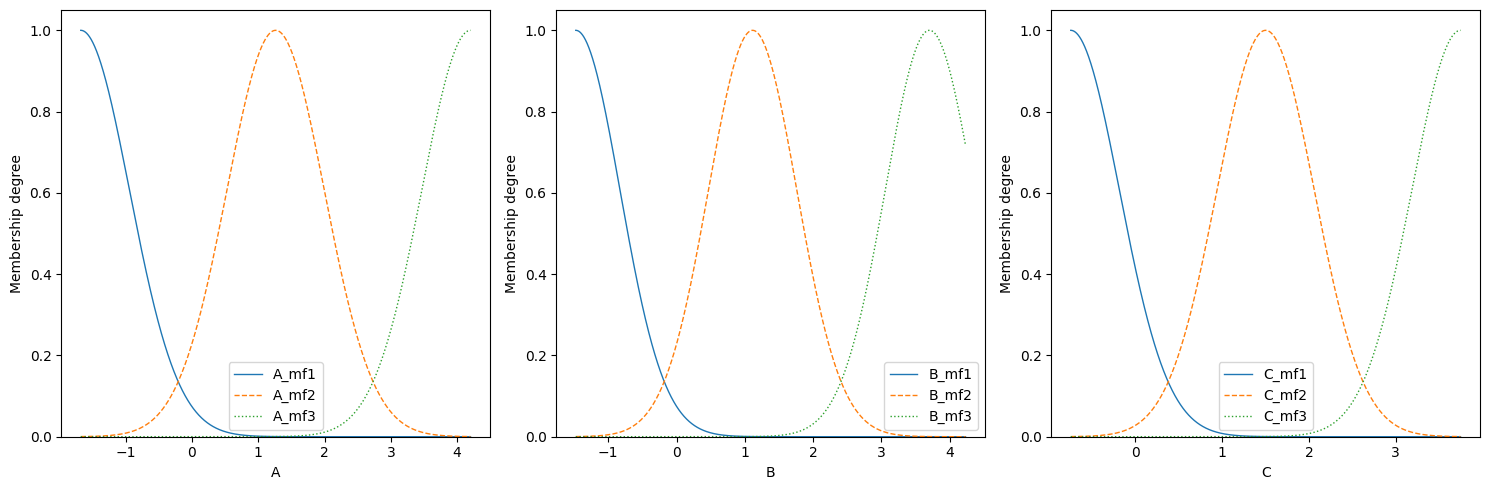

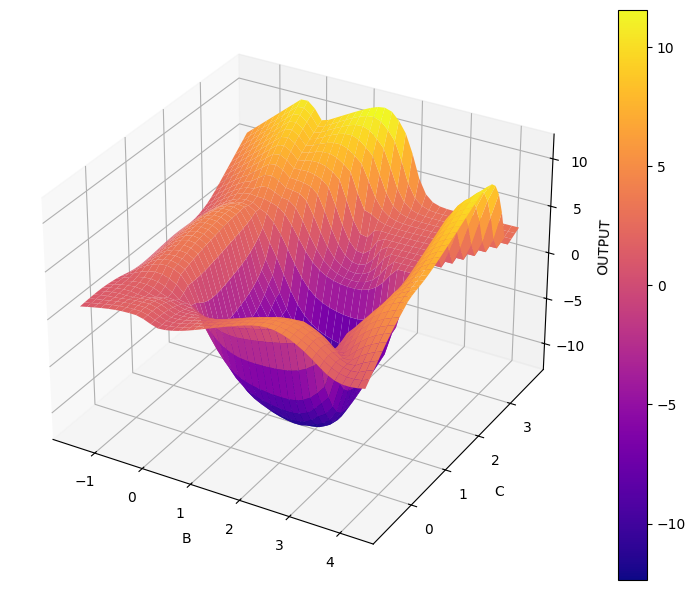

In [44]:
from simpful import *

FS = FuzzySystem(show_banner=False)

"""
please note I renumberd the updated rule base manually
Updated Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3
Rule7: If A is A_mf1 and B is B_mf3 and C is C_mf1
Rule8: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule9: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule10: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule11: If A is A_mf2 and B is B_mf2 and C is C_mf2
Rule12: If A is A_mf2 and B is B_mf3 and C is C_mf1
Rule13: If A is A_mf3 and B is B_mf1 and C is C_mf1
Rule14: If A is A_mf3 and B is B_mf1 and C is C_mf2
Rule15: If A is A_mf3 and B is B_mf2 and C is C_mf1
"""

RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)"
RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)"
RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)"
RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)"
RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)"
RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)"
RULE7 = "IF (A IS A_mf1) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun7)"
RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun8)"
RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun9)"
RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)"
RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)"
RULE12 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun12)"
RULE13 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun13)"
RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun14)"
RULE15 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun15)"

FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15])

FS.set_output_function('fun1', '2.753778 +0.090464 * A +1.215869 * B -0.116318 * C')
FS.set_output_function('fun2', '4.155489 +1.256607 * A +1.509128 * B +0.494442 * C')
FS.set_output_function('fun3', '-0.827435 +0.649564 * A +3.733547 * B +2.065687 * C')
FS.set_output_function('fun4', '0.806549 -0.403328 * A +0.861987 * B -0.095542 * C')
FS.set_output_function('fun5', '2.913799 +1.029238 * A +1.178822 * B +1.971797 * C')
FS.set_output_function('fun6', '-0.566195 +0.444483 * A +1.847138 * B +1.694145 * C')
FS.set_output_function('fun7', '-0.914996 -0.861690 * A +0.561556 * B -0.034858 * C')
FS.set_output_function('fun8', '2.573651 +0.001605 * A +0.013331 * B +2.125080 * C')
FS.set_output_function('fun9', '-2.805325 -0.143703 * A -0.640824 * B +3.460912 * C')
FS.set_output_function('fun10', '6.237033 +0.363908 * A +0.360174 * B +8.767734 * C')
FS.set_output_function('fun11', '-14.881663 +2.261805 * A +1.858269 * B -3.306274 * C')
FS.set_output_function('fun12', '-4.170362 -0.213374 * A +3.900062 * B +7.382725 * C')
FS.set_output_function('fun13', '3.208641 -0.054662 * A +2.254363 * B -1.061492 * C')
FS.set_output_function('fun14', '0.352473 +0.764959 * A -0.201276 * B +0.103256 * C')
FS.set_output_function('fun15', '1.164562 -0.122640 * A +0.894638 * B -0.486951 * C')



FS_1 = FuzzySet(function=Gaussian_MF(-1.677, 0.735), term='A_mf1')
FS_2 = FuzzySet(function=Gaussian_MF(1.262, 0.735), term='A_mf2')
FS_3 = FuzzySet(function=Gaussian_MF(4.202, 0.735), term='A_mf3')
MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.677287, 4.202182])
FS.add_linguistic_variable('A', MF_A)

FS_11 = FuzzySet(function=Gaussian_MF(-1.475, 0.648), term='B_mf1')
FS_12 = FuzzySet(function=Gaussian_MF(1.115, 0.648), term='B_mf2')
FS_13 = FuzzySet(function=Gaussian_MF(3.705, 0.648), term='B_mf3')
MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.475462, 4.233164])
FS.add_linguistic_variable('B', MF_B)

FS_21 = FuzzySet(function=Gaussian_MF(-0.745, 0.561), term='C_mf1')
FS_22 = FuzzySet(function=Gaussian_MF(1.501, 0.561), term='C_mf2')
FS_23 = FuzzySet(function=Gaussian_MF(3.747, 0.561), term='C_mf3')
MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-0.744939,3.746904])
FS.add_linguistic_variable('C', MF_C)


# end of automatically generated code #

# here is the model visualization
# Set antecedents values
FS.set_variable("A", 0.0)
FS.set_variable("B", 0.0)
FS.set_variable("C", 0.0)
# Plot all linguistic variables and save them in a output file
FS.produce_figure(outputfile='lvs.pdf')

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["OUTPUT"]))

fig = FS.plot_surface(variables=['B','C'], output='OUTPUT')

# Step 7:
# Check performance

recall from earlier that {'dw_mw': 'A', 'delta_p': 'B', 'v': 'C', 'fx': 'Y'})

In [46]:
from sklearn.metrics import mean_absolute_error

# Initialize a list to store the predicted outputs
predicted_outputs = []

# Iterate through all samples in the test dataset
for index, sample in X_test.iterrows():
    # Set the variables for the current sample
    FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
    FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
    FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column
    
    # Perform Sugeno inference and get the predicted output
    predicted_output = FS.Sugeno_inference(["OUTPUT"])
    
    # Append the predicted output to the list
    predicted_outputs.append(predicted_output)

# Extract the predicted output values from the dictionaries
predicted_values = [output['OUTPUT'] for output in predicted_outputs]

# Calculate the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error (MAE):", MAE)

Mean Absolute Error (MAE): 1.9856289463181231


# Step 8:
# Grid Search
the pursuit of the perfect regularization parameter alpha


Consequents with L2 regularization:
Consequents:
   Rule  Intercept  Weight for A  Weight for B  Weight for C
 Rule 1   2.638261      0.400435      1.185105     -0.121395
 Rule 2   4.155624      1.323075      1.585041      0.415873
 Rule 3   2.530908     -1.980512      3.682293      0.488836
 Rule 4   0.081495     -0.685757      1.075170      0.146092
 Rule 5   1.662069      0.559212      1.185777      2.112523
 Rule 6   1.279303     -1.001093      1.252315      0.866178
 Rule 7  -3.041811     -1.376636      0.801720     -0.784928
 Rule 8   2.214230      0.169513      0.126809      2.358713
 Rule 9  -3.687260     -0.509401     -2.232975     -0.139428
Rule 10   5.672466      0.044376      0.363565      8.143861
Rule 11 -12.517478      0.565791     -0.646620     -2.957470
Rule 12  -4.362280     -0.512520      3.800592      7.239573
Rule 13   3.272536     -0.562095      0.937902     -1.532073
Rule 14   0.065743      1.438567      1.999560      0.013435
Rule 15   0.036194      0.617222    

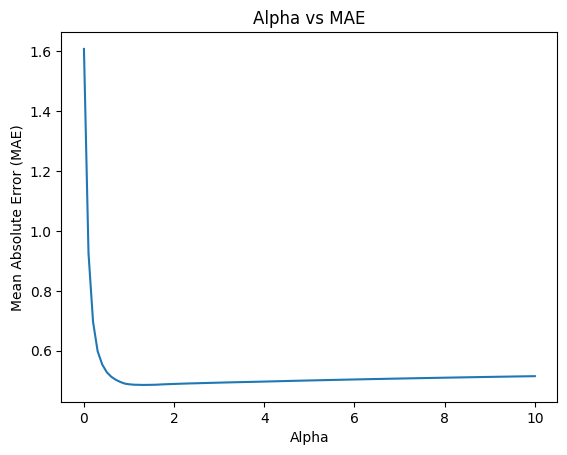

Optimal Alpha: 1.314
Minimum MAE: 0.48569448015531275


In [47]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from simpful import *

# Define the range of alpha values for grid search
alpha_values = np.linspace(0.001, 10, num=100)

# Initialize lists to store alpha values and corresponding MAE
alpha_list = []
mae_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Define the Ridge regression model with L2 regularization
    ridge_model = Ridge(alpha=alpha, solver='lsqr')
    
    # Fit the model to the design matrix and y_train
    ridge_model.fit(design_matrix, y_train)

    # Get the coefficients (consequents) from the trained model
    consequents_regularized = ridge_model.coef_

    
    # Display the consequents with L2 regularization
    print("Consequents with L2 regularization:")

    # Number of rules and features
    num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
    num_features = X_train.shape[1]

    # Prepare data for tabular display
    table_data = []

    for rule_index in range(num_rules):
        intercept = consequents_regularized[rule_index * (num_features + 1)]
        weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
        row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
        table_data.append(row)

    # Create a DataFrame for better visualization
    column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
    df = pd.DataFrame(table_data, columns=column_names)

    # Display the consequents in a tabular format
    print("Consequents:")
    print(df.to_string(index=False))
    
    FS = FuzzySystem(show_banner=False)

    RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)"
    RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)"
    RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)"
    RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)"
    RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)"
    RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)"
    RULE7 = "IF (A IS A_mf1) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun7)"
    RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun8)"
    RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun9)"
    RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)"
    RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)"
    RULE12 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun12)"
    RULE13 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun13)"
    RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun14)"
    RULE15 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun15)"

    FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15])

    # Extract the consequents obtained from the Ridge regression model
    consequents = df.iloc[:, 1:].values  # Assuming 'df' contains the DataFrame with consequents

    # Define a list of rule names corresponding to the rules in your Fuzzy System
    rule_names = ['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7', 'fun8', 'fun9', 'fun10', 'fun11', 'fun12', 'fun13', 'fun14', 'fun15']

    # Iterate through each rule and set the output function using the corresponding coefficients
    for rule_index, rule_name in enumerate(rule_names):
        # Extract the coefficients for the current rule
        coefficients = consequents[rule_index]
        
        # Construct the output function string
        output_function = f"{coefficients[0]}"
        for feature_index, coefficient in enumerate(coefficients[1:]):
            output_function += f" + {coefficient} * {'ABC'[feature_index]}"
        
        # Set the output function for the current rule
        FS.set_output_function(rule_name, output_function)

    FS_1 = FuzzySet(function=Gaussian_MF(-1.677, 0.735), term='A_mf1')
    FS_2 = FuzzySet(function=Gaussian_MF(1.262, 0.735), term='A_mf2')
    FS_3 = FuzzySet(function=Gaussian_MF(4.202, 0.735), term='A_mf3')
    MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.677287, 4.202182])
    FS.add_linguistic_variable('A', MF_A)

    FS_11 = FuzzySet(function=Gaussian_MF(-1.475, 0.648), term='B_mf1')
    FS_12 = FuzzySet(function=Gaussian_MF(1.115, 0.648), term='B_mf2')
    FS_13 = FuzzySet(function=Gaussian_MF(3.705, 0.648), term='B_mf3')
    MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.475462, 4.233164])
    FS.add_linguistic_variable('B', MF_B)

    FS_21 = FuzzySet(function=Gaussian_MF(-0.745, 0.561), term='C_mf1')
    FS_22 = FuzzySet(function=Gaussian_MF(1.501, 0.561), term='C_mf2')
    FS_23 = FuzzySet(function=Gaussian_MF(3.747, 0.561), term='C_mf3')
    MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-0.744939,3.746904])
    FS.add_linguistic_variable('C', MF_C)


    # here you input value to the model and it makes predictions
    # Set antecedents values
    FS.set_variable("A", 0.0)
    FS.set_variable("B", 0.0)
    FS.set_variable("C", 0.0)
    print(FS.Sugeno_inference(["OUTPUT"]))

    # Initialize a list to store the predicted outputs
    predicted_outputs = []
    
    # Iterate through all samples in the test dataset
    for index, sample in X_test.iterrows():
        # Set the variables for the current sample
        FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
        FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
        FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column

        # Perform Sugeno inference and get the predicted output
        predicted_output = FS.Sugeno_inference(["OUTPUT"])

        # Append the predicted output to the list
        predicted_outputs.append(predicted_output)

    # Extract the predicted output values from the dictionaries
    predicted_values = [output['OUTPUT'] for output in predicted_outputs]

    # Calculate the Mean Absolute Error (MAE) for the current alpha value
    MAE = mean_absolute_error(y_test, predicted_values)
    
    # Append alpha and MAE to the lists
    alpha_list.append(alpha)
    mae_list.append(MAE)

# Plot Alpha versus MAE
plt.plot(alpha_list, mae_list)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Alpha vs MAE')
plt.show()

# Find the alpha value with the minimum MAE
min_mae_index = np.argmin(mae_list)
optimal_alpha = alpha_list[min_mae_index]
min_mae = mae_list[min_mae_index]

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Minimum MAE: {min_mae}")







# Test Alpha

In [51]:
# perform linear least squares with l2 regularization
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


# Define the regularization strength (alpha)
alpha = 1.314  # You can adjust the value of alpha as needed

# Define the Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=alpha, solver='lsqr') # solver least squares with QR decomposition
# lsqr Find the least-squares solution to a large, sparse, linear system of equations.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html

# Fit the model to the design matrix and y_train
ridge_model.fit(design_matrix, y_train)

# Get the coefficients (consequents) from the trained model
consequents_regularized = ridge_model.coef_

# Display the consequents with L2 regularization
print("Consequents with L2 regularization:")

# Number of rules and features
num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
num_features = X_train.shape[1]

# Prepare data for tabular display
table_data = []

for rule_index in range(num_rules):
    intercept = consequents_regularized[rule_index * (num_features + 1)]
    weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
    row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
    table_data.append(row)

# Create a DataFrame for better visualization
column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
df = pd.DataFrame(table_data, columns=column_names)

# Display the consequents in a tabular format
print("Consequents:")
print(df.to_string(index=False))



# Here is the model 
from simpful import *

FS = FuzzySystem(show_banner=False)


RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)"
RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)"
RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)"
RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)"
RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)"
RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)"
RULE7 = "IF (A IS A_mf1) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun7)"
RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun8)"
RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun9)"
RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)"
RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)"
RULE12 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun12)"
RULE13 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun13)"
RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun14)"
RULE15 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun15)"

FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15])
# Extract the consequents obtained from the Ridge regression model
consequents = df.iloc[:, 1:].values  # Assuming 'df' contains the DataFrame with consequents

# Define a list of rule names corresponding to the rules in your Fuzzy System
rule_names = ['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7', 'fun8', 'fun9', 'fun10', 'fun11', 'fun12', 'fun13', 'fun14', 'fun15']

# Iterate through each rule and set the output function using the corresponding coefficients
for rule_index, rule_name in enumerate(rule_names):
    # Extract the coefficients for the current rule
    coefficients = consequents[rule_index]
        
    # Construct the output function string
    output_function = f"{coefficients[0]}"
    for feature_index, coefficient in enumerate(coefficients[1:]):
        output_function += f" + {coefficient} * {'ABC'[feature_index]}"
        
    # Set the output function for the current rule
    FS.set_output_function(rule_name, output_function)


FS_1 = FuzzySet(function=Gaussian_MF(-1.677, 0.735), term='A_mf1')
FS_2 = FuzzySet(function=Gaussian_MF(1.262, 0.735), term='A_mf2')
FS_3 = FuzzySet(function=Gaussian_MF(4.202, 0.735), term='A_mf3')
MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.677287, 4.202182])
FS.add_linguistic_variable('A', MF_A)

FS_11 = FuzzySet(function=Gaussian_MF(-1.475, 0.648), term='B_mf1')
FS_12 = FuzzySet(function=Gaussian_MF(1.115, 0.648), term='B_mf2')
FS_13 = FuzzySet(function=Gaussian_MF(3.705, 0.648), term='B_mf3')
MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.475462, 4.233164])
FS.add_linguistic_variable('B', MF_B)

FS_21 = FuzzySet(function=Gaussian_MF(-0.745, 0.561), term='C_mf1')
FS_22 = FuzzySet(function=Gaussian_MF(1.501, 0.561), term='C_mf2')
FS_23 = FuzzySet(function=Gaussian_MF(3.747, 0.561), term='C_mf3')
MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-0.744939,3.746904])
FS.add_linguistic_variable('C', MF_C)



# here you input value to the model and it makes predictions
# Set antecedents values
FS.set_variable("A", 0.0)
FS.set_variable("B", 0.0)
FS.set_variable("C", 0.0)
print(FS.Sugeno_inference(["OUTPUT"]))


# here you check the error of the predictions in terms of MAE
# Initialize a list to store the predicted outputs
predicted_outputs = []

# Iterate through all samples in the test dataset
for index, sample in X_test.iterrows():
    # Set the variables for the current sample
    FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
    FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
    FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column
    
    # Perform Sugeno inference and get the predicted output
    predicted_output = FS.Sugeno_inference(["OUTPUT"])
    
    # Append the predicted output to the list
    predicted_outputs.append(predicted_output)

# Extract the predicted output values from the dictionaries
predicted_values = [output['OUTPUT'] for output in predicted_outputs]

# Calculate the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error (MAE):", MAE)



Consequents with L2 regularization:
Consequents:
   Rule  Intercept  Weight for A  Weight for B  Weight for C
 Rule 1   0.223025      0.151634      0.561724     -0.146824
 Rule 2   0.265397     -0.081929      0.685955      0.517599
 Rule 3   0.034150     -0.026723      0.900282      0.411297
 Rule 4  -0.560382      0.102789      0.698509      0.005711
 Rule 5   0.101549     -0.179497      0.382452      1.391498
 Rule 6   0.337116     -0.263803      0.157158      1.098225
 Rule 7  -0.110819      0.002185     -0.037354      0.112041
 Rule 8  -0.204942     -0.096757      0.136553      0.471698
 Rule 9  -0.232554     -0.232394      0.154968     -0.058015
Rule 10   0.592568     -0.733541      0.087847      0.711506
Rule 11  -0.482832     -0.031681     -0.293751     -0.085639
Rule 12  -0.172826     -0.079073      0.089823      0.280182
Rule 13  -0.005680     -0.136582      0.008391      0.003920
Rule 14   0.000651      0.035911      0.013565      0.000190
Rule 15   0.215580      0.592403    

# Model 2:
Membrane Type 0 = CTA (Cellulose Triacetate Membrane)

Membrane Orientation 1 = AL-DS (active layer facing Draw solution)

## Estimating the consequents of First Order takagi sugeno

General formula 

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + \sum_{k=1}^{n} a_{ik} x_k \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$



for our case

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + w_{Ai} A_i + w_{Bi} B_i + w_{Ci} C_i \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$


# Step 0
# Preparing the data


In [26]:

path = 'subset_01.csv'
df = pd.read_csv(path)
df.head()

Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
0              0                     1                        58.44   
1              0                     1                        58.44   
2              0                     1                        58.44   
3              0                     1                        58.44   
4              0                     1                        58.44   

   Delta_P (bar)  Velocity Mean (cm/s)  Membrane Flux (LMH)  
0       0.000000                  45.8                  3.6  
1       2.436149                  45.8                 18.0  
2      21.925337                  45.8                 28.8  
3      46.286822                  45.8                 45.0  
4      70.648307                  45.8                 28.8

In [27]:
# Remove first two columns of the dataset
df = df.drop(columns=['Membrane Type', 'Membrane Orientation'])


# Rename columns
df = df.rename(columns={'DS Molecular Weight (g/mol)': 'dw_mw',
                        'Delta_P (bar)': 'delta_p',
                        'Velocity Mean (cm/s)': 'v',
                        'Membrane Flux (LMH)': 'fx'})

df.head()


dw_mw    delta_p     v    fx
0  58.44   0.000000  45.8   3.6
1  58.44   2.436149  45.8  18.0
2  58.44  21.925337  45.8  28.8
3  58.44  46.286822  45.8  45.0
4  58.44  70.648307  45.8  28.8

In [28]:

# Assuming df is your DataFrame containing the data

# Print feature names before changes
print("Feature names before changes:")
print(df.columns.tolist())

# Change feature names
df = df.rename(columns={'dw_mw': 'A', 'delta_p': 'B', 'v': 'C', 'fx': 'Y'})

# Print feature names after changes
print("\nFeature names after changes:")
print(df.columns.tolist())


Feature names before changes:
['dw_mw', 'delta_p', 'v', 'fx']

Feature names after changes:
['A', 'B', 'C', 'Y']


In [29]:
df.head()

A          B     C     Y
0  58.44   0.000000  45.8   3.6
1  58.44   2.436149  45.8  18.0
2  58.44  21.925337  45.8  28.8
3  58.44  46.286822  45.8  45.0
4  58.44  70.648307  45.8  28.8

In [30]:

# perform z score normalization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the entire DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Now df_normalized contains z-score normalized values for all columns in df
df_normalized.head()

A         B        C         Y
0 -0.672885 -1.261717  1.71916 -0.804084
1 -0.672885 -1.211610  1.71916  0.233210
2 -0.672885 -0.810756  1.71916  1.011181
3 -0.672885 -0.309688  1.71916  2.178138
4 -0.672885  0.191380  1.71916  1.011181

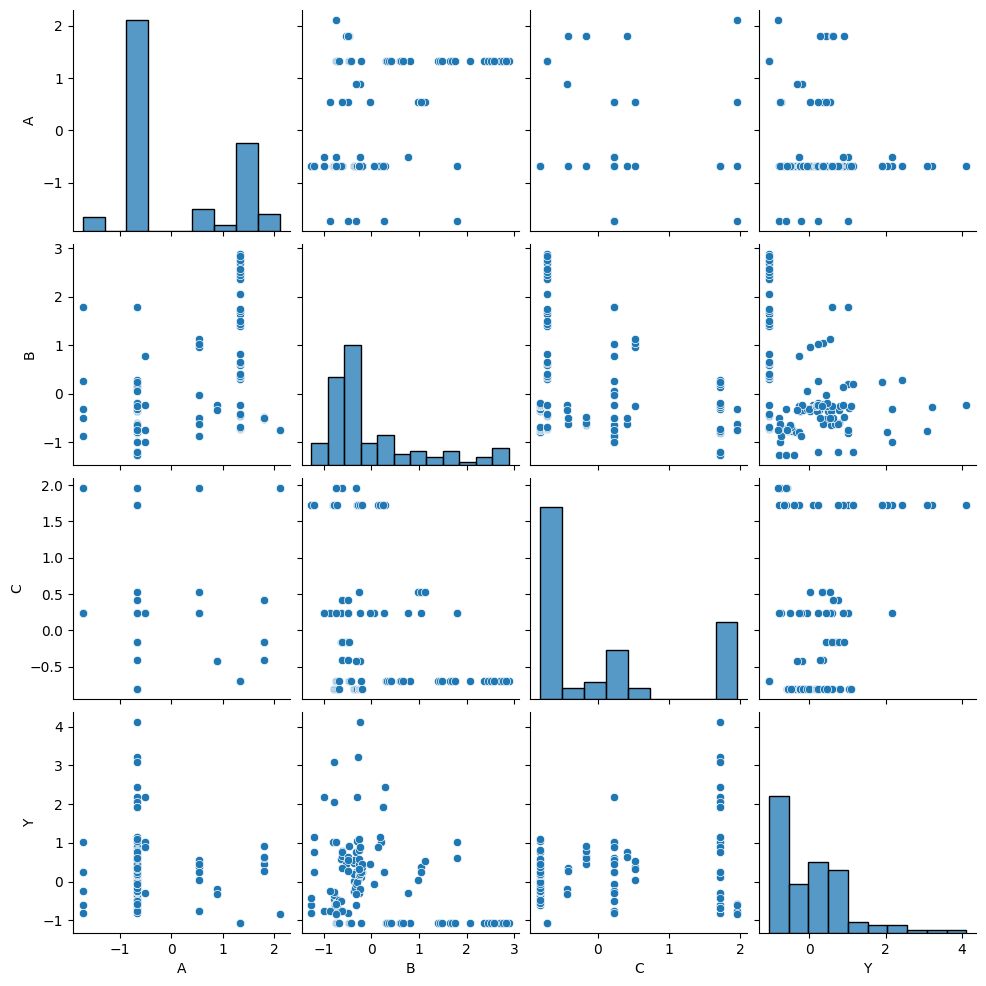

In [6]:

# Assuming df_normalized is your DataFrame
# Create a seaborn pairplot
sns.pairplot(df_normalized)


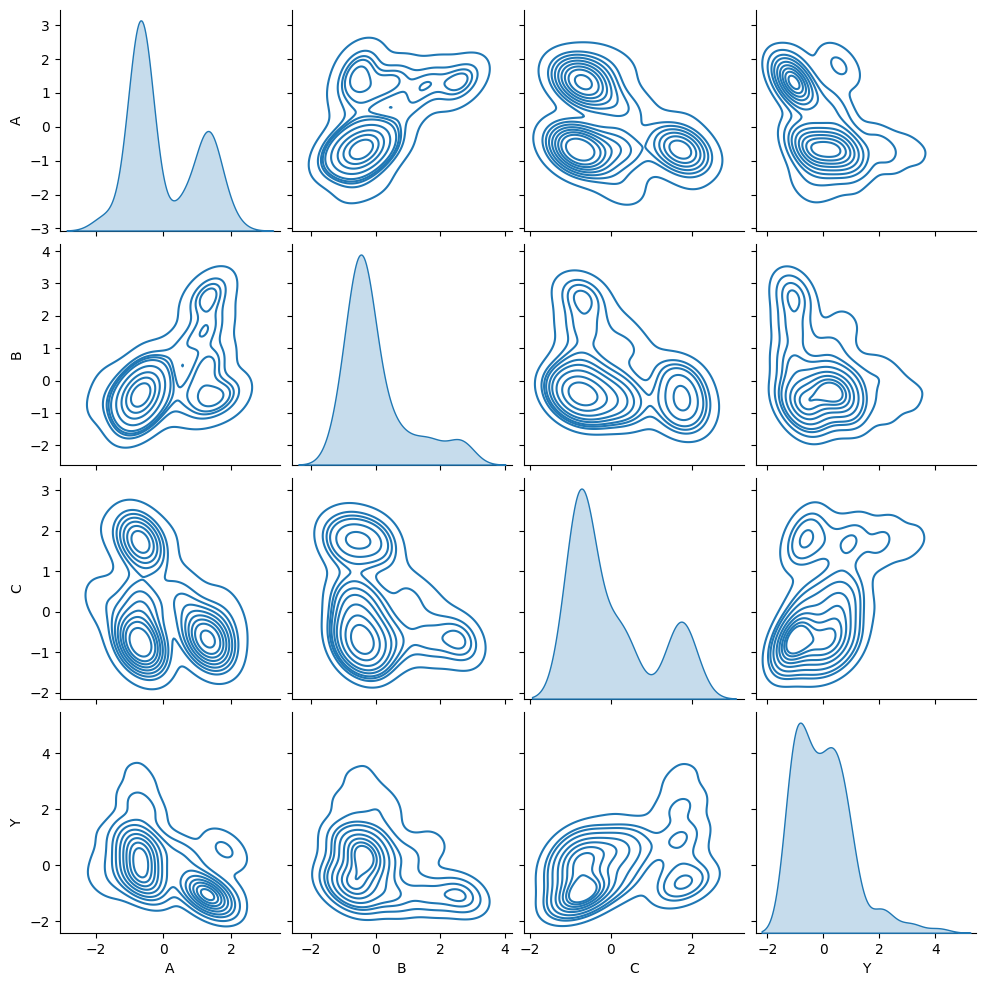

In [7]:
# make it curvy
g = sns.pairplot(df_normalized, diag_kind="kde", kind="kde")
plt.show()

In [31]:

# Assuming df_normalized is your dataframe
# Extract the first three columns: A, B, and C
features = df_normalized[['A', 'B', 'C']]

# Calculate the minimum and maximum for each feature
min_values = features.min()
max_values = features.max()

# Print the results
print("Minimum values for each feature:")
print(min_values)
print("\nMaximum values for each feature:")
print(max_values)


Minimum values for each feature:
A   -1.723773
B   -1.261717
C   -0.804899
dtype: float64

Maximum values for each feature:
A    2.109763
B    2.883635
C    1.960751
dtype: float64


In [32]:
# Split data into training and testing


from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with features (X) and target variable (y)

# Split the data into features (X) and target variable (y)
X = df_normalized.drop(columns=['Y'])  
y = df_normalized['Y']

# Split the features (X) and target variable (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Adjust the test_size parameter to set the proportion of the dataset to include in the test split



In [33]:
# Resetting the indexes
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.head()

A         B         C
0  1.326664 -0.225379 -0.704811
1  1.326664 -0.463087 -0.704811
2 -0.672885 -0.361505 -0.804899
3 -0.672885 -1.261717  1.719160
4 -0.672885  0.240973  1.719160

# Step 1
# Rules Generator

we need to create a function that generates all possible rules

max number of rules
$$ m^n $$

 m: number of sets per variable, n: number of input variables

In [10]:
import itertools

def generate_rule_base(num_input_variables, num_sets_per_variable):
    """
    Generate a rule base with all possible rules based on the specified number of input variables and sets per variable.

    Parameters:
    num_input_variables : int
        Number of input variables
    num_sets_per_variable : int
        Number of sets per input variable

    Returns:
    tuple
        A tuple containing the rule base (list of strings representing each rule) and the list of membership function names
    """
    # Define alphabet for variable names
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Generate input variable names
    input_variable_names = alphabet[:num_input_variables]

    # Generate fuzzy set names for each variable
    fuzzy_set_names = [[f"{var}_mf{i+1}" for i in range(num_sets_per_variable)] for var in input_variable_names]

    # Generate all possible combinations of fuzzy set names
    rule_combinations = itertools.product(*fuzzy_set_names)

    # Generate human-readable rules
    rule_base = []
    for i, rule in enumerate(rule_combinations, start=1):
        rule_str = f"Rule{i}: If "
        for j, variable in enumerate(input_variable_names):
            rule_str += f"{variable} is {rule[j]}"
            if j < num_input_variables - 1:
                rule_str += " and "
        rule_base.append(rule_str)

    # Flatten the list of fuzzy set names
    membership_function_names = [item for sublist in fuzzy_set_names for item in sublist]

    return rule_base, membership_function_names

# Example usage
num_input_variables = 3
num_sets_per_variable = 3
rule_base, membership_function_names = generate_rule_base(num_input_variables, num_sets_per_variable)

print("Rule base:")
for rule in rule_base:
    print(rule)

print("\nMembership functions:")
print(membership_function_names)


Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3
Rule7: If A is A_mf1 and B is B_mf3 and C is C_mf1
Rule8: If A is A_mf1 and B is B_mf3 and C is C_mf2
Rule9: If A is A_mf1 and B is B_mf3 and C is C_mf3
Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3
Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2
Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3
Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1
Rule17: If A is A_mf2 and B is B_mf3 and C is C_mf2
Rule18: If A is A_mf2 and B is B_mf3 and C is C_mf3
Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1
Rule20: If

# Step 2
# Parameters setting of the gaussian membership functions


Membership function partitions for A:
A_mf1: Mean=-1.724, Std Dev=0.479
A_mf2: Mean=0.193, Std Dev=0.479
A_mf3: Mean=2.110, Std Dev=0.479

Membership function partitions for B:
B_mf1: Mean=-1.262, Std Dev=0.518
B_mf2: Mean=0.811, Std Dev=0.518
B_mf3: Mean=2.884, Std Dev=0.518

Membership function partitions for C:
C_mf1: Mean=-0.805, Std Dev=0.346
C_mf2: Mean=0.578, Std Dev=0.346
C_mf3: Mean=1.961, Std Dev=0.346


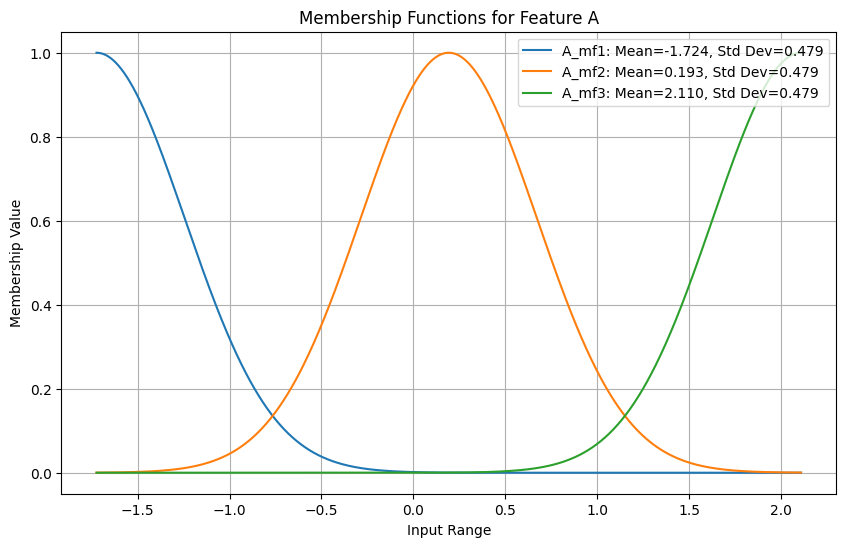

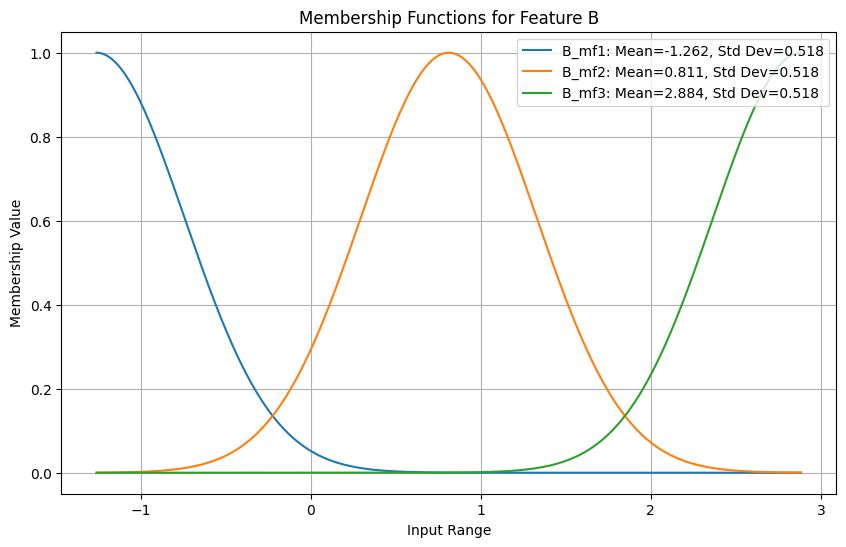

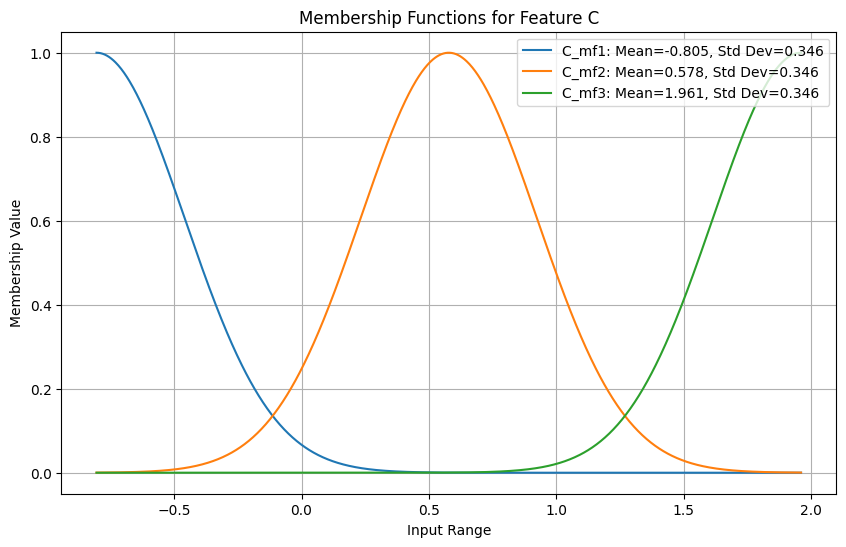

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def perform_partitioning_and_plot(X, num_membership_functions):
    """
    Perform grid partitioning and plot membership functions for each feature in the DataFrame.

    Parameters:
    X : pandas.DataFrame
        DataFrame containing the features
    num_membership_functions : int
        Number of membership functions
    """
    membership_function_details = []
    
    for feature in X.columns:
        # Calculate the input range for the current feature
        input_range = (X[feature].min(), X[feature].max())

        # Calculate the width of each partition
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)

        # Calculate mean and standard deviation for each partition
        membership_functions = []
        for i in range(num_membership_functions):
            mean = input_range[0] + i * partition_width
            std_dev = partition_width / 4  # Assuming a standard deviation of one-fourth of the partition width
            membership_functions.append((mean, std_dev))

        # Collect the calculated means and standard deviations
        details = f"\nMembership function partitions for {feature}:"
        for i, (mean, std_dev) in enumerate(membership_functions):
            details += f"\n{feature}_mf{i+1}: Mean={mean:.3f}, Std Dev={std_dev:.3f}"
        
        membership_function_details.append(details)
    
    # Print all membership function details together
    for detail in membership_function_details:
        print(detail)

    # Plot Gaussian membership functions based on their mean and standard deviation
    for feature in X.columns:
        input_range = (X[feature].min(), X[feature].max())
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)
        membership_functions = [(input_range[0] + i * partition_width, partition_width / 4) for i in range(num_membership_functions)]
        
        x = np.linspace(input_range[0], input_range[1], 1000)
        plt.figure(figsize=(10, 6))
        for i, (mean, std_dev) in enumerate(membership_functions):
            y = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
            plt.plot(x, y, label=f'{feature}_mf{i+1}: Mean={mean:.3f}, Std Dev={std_dev:.3f}')
        plt.xlabel('Input Range')
        plt.ylabel('Membership Value')
        plt.title(f'Membership Functions for Feature {feature}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
num_membership_functions = 3
perform_partitioning_and_plot(X_train, num_membership_functions)


# Step 3: calculate membership values per data row

In [12]:


def calculate_membership_values(X, num_membership_functions):
    """
    Calculate the membership values for each feature value in the DataFrame using Gaussian membership functions.

    Parameters:
    X : pandas.DataFrame
        DataFrame containing the features
    num_membership_functions : int
        Number of membership functions
    """
    membership_values = {}

    for feature in X.columns: #his loops over each column
        # Calculate the input range for the current feature
        input_range = (X[feature].min(), X[feature].max())

        # Calculate the width of each partition
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)

        # Calculate mean and standard deviation for each partition
        membership_functions = [(input_range[0] + i * partition_width, partition_width / 4) for i in range(num_membership_functions)]

        # Calculate membership values for each feature value in the DataFrame
        membership_values[feature] = {}
        for i, (mean, std_dev) in enumerate(membership_functions):
            mf_label = f'{feature}_mf{i+1}'
            membership_values[feature][mf_label] = np.exp(-0.5 * ((X[feature] - mean) / std_dev) ** 2)
    
    # Convert the membership values to a DataFrame for better readability
    membership_values_df = pd.DataFrame()
    for feature in membership_values:
        for mf_label in membership_values[feature]:
            membership_values_df[mf_label] = membership_values[feature][mf_label]
    
    return membership_values_df

num_membership_functions = 3
# we already have values of x_train
membership_values_df = calculate_membership_values(X_train, num_membership_functions)

membership_values_df.head()


A_mf1     A_mf2         A_mf3     B_mf1     B_mf2         B_mf3  \
0  1.586611e-09  0.060902  2.630753e-01  0.135335  0.135335  1.522998e-08   
1  1.586611e-09  0.060902  2.630753e-01  0.304912  0.048669  8.742112e-10   
2  9.029100e-02  0.195431  4.760260e-08  0.221110  0.077311  3.042017e-09   
3  9.029100e-02  0.195431  4.760260e-08  1.000000  0.000335  1.266417e-14   
4  9.029100e-02  0.195431  4.760260e-08  0.014921  0.546074  2.249056e-06   

          C_mf1     C_mf2         C_mf3  
0  9.589559e-01  0.001024  1.231011e-13  
1  9.589559e-01  0.001024  1.231011e-13  
2  1.000000e+00  0.000335  1.266417e-14  
3  2.657851e-12  0.004301  7.833424e-01  
4  2.657851e-12  0.004301  7.833424e-01

In [13]:
membership_values_df.shape

(104, 9)

# Step 3.1:
# Calculate Firing Strengths and Omit redundant rules

here we calculate the firing strength of each rule across all training data (defined for each rule as the product T-norm of its fuzzy sets), then we get 27 values, each value represents the sum of firing strength per rule

In [14]:

# Assuming membership_values_df is already defined with shape (312, 9)
# Here is a sample definition to illustrate:
# membership_values_df = pd.DataFrame({
#     'A_mf1': [...],
#     'A_mf2': [...],
#     'A_mf3': [...],
#     'B_mf1': [...],
#     'B_mf2': [...],
#     'B_mf3': [...],
#     'C_mf1': [...],
#     'C_mf2': [...],
#     'C_mf3': [...]
# })

# Define rule combinations
rule_combinations = [
    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'),
    ('A_mf1', 'B_mf3', 'C_mf1'), ('A_mf1', 'B_mf3', 'C_mf2'), ('A_mf1', 'B_mf3', 'C_mf3'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'),
    ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf2', 'B_mf3', 'C_mf2'), ('A_mf2', 'B_mf3', 'C_mf3'),
    ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'),
    ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf2', 'C_mf2'), ('A_mf3', 'B_mf2', 'C_mf3'),
    ('A_mf3', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf2'), ('A_mf3', 'B_mf3', 'C_mf3')
]

# Initialize an empty dataframe to store firing strengths
df_fire = pd.DataFrame(index=membership_values_df.index)

# Calculate firing strengths for each rule combination
for i, rule in enumerate(rule_combinations):
    rule_name = f'Rule_{i+1}'
    df_fire[rule_name] = (
        membership_values_df[rule[0]] * 
        membership_values_df[rule[1]] * 
        membership_values_df[rule[2]]
    )

# Display the resulting dataframe
df_fire.head()


Rule_1        Rule_2        Rule_3        Rule_4        Rule_5  \
0  2.059113e-10  2.199215e-13  2.643282e-23  2.059113e-10  2.199215e-13   
1  4.639206e-10  4.954858e-13  5.955346e-23  7.404921e-11  7.908752e-14   
2  1.996425e-02  6.697259e-06  2.528305e-16  6.980482e-03  2.341691e-06   
3  2.399800e-13  3.883663e-04  7.072877e-02  8.050434e-17  1.302824e-07   
4  3.580691e-15  5.794730e-06  1.055329e-03  1.310470e-13  2.120769e-04   

         Rule_6        Rule_7        Rule_8        Rule_9       Rule_10  ...  \
0  2.643282e-23  2.317227e-17  2.474891e-20  2.974622e-30  7.903889e-03  ...   
1  9.505692e-24  1.330104e-18  1.420604e-21  1.707453e-31  1.780755e-02  ...   
2  8.840198e-17  2.746668e-10  9.214045e-14  3.478426e-24  4.321176e-02  ...   
3  2.372686e-05  3.039147e-27  4.918335e-18  8.957209e-16  5.194265e-13  ...   
4  3.862317e-02  5.397286e-19  8.734574e-10  1.590730e-07  7.750252e-15  ...   

        Rule_18       Rule_19       Rule_20       Rule_21       Rule_22  \
0  1.141806e-22  3.414206e-02  3.646509e-05  4.382814e-15  3.414206e-02   
1  6.554046e-24  7.692247e-02  8.215627e-05  9.874532e-15  1.227807e-02   
2  7.528903e-24  1.052541e-08  3.530883e-12  1.332956e-22  3.680202e-09   
3  1.938749e-15  1.265206e-19  2.047518e-10  3.728914e-08  4.244294e-23   
4  3.443066e-07  1.887787e-21  3.055058e-12  5.563832e-10  6.908968e-20   

        Rule_23       Rule_24       Rule_25       Rule_26       Rule_27  
0  3.646509e-05  4.382814e-15  3.842183e-09  4.103605e-12  4.932208e-22  
1  1.311347e-05  1.576135e-15  2.205439e-10  2.355497e-13  2.831121e-23  
2  1.234570e-12  4.660669e-23  1.448079e-16  4.857765e-20  1.833872e-30  
3  6.868657e-14  1.250911e-11  1.602278e-33  2.593010e-24  4.722358e-22  
4  1.118097e-10  2.036264e-08  2.845520e-25  4.604982e-16  8.386536e-14  

[5 rows x 27 columns]

In [15]:

# Assuming df is your dataframe
column_sums = df_fire.sum()

print(column_sums)


Rule_1     8.310259e-01
Rule_2     8.550583e-01
Rule_3     8.367493e-01
Rule_4     2.148870e-01
Rule_5     1.996159e-01
Rule_6     3.179422e-01
Rule_7     1.305239e-03
Rule_8     7.367386e-02
Rule_9     1.200794e-06
Rule_10    2.044075e+00
Rule_11    1.047917e+00
Rule_12    1.763597e+00
Rule_13    9.450512e-01
Rule_14    2.281276e+00
Rule_15    5.001597e-01
Rule_16    2.787234e-01
Rule_17    1.657432e-02
Rule_18    2.055694e-06
Rule_19    1.090766e+00
Rule_20    3.178958e-01
Rule_21    6.101142e-01
Rule_22    1.889621e+00
Rule_23    5.081459e-02
Rule_24    1.114801e-02
Rule_25    1.202906e+00
Rule_26    1.304088e-03
Rule_27    2.584215e-09
dtype: float64


In [16]:
# Sort the column sums from highest values to lowest values
sorted_column_sums = column_sums.sort_values(ascending=False)

print(sorted_column_sums)

Rule_14    2.281276e+00
Rule_10    2.044075e+00
Rule_22    1.889621e+00
Rule_12    1.763597e+00
Rule_25    1.202906e+00
Rule_19    1.090766e+00
Rule_11    1.047917e+00
Rule_13    9.450512e-01
Rule_2     8.550583e-01
Rule_3     8.367493e-01
Rule_1     8.310259e-01
Rule_21    6.101142e-01
Rule_15    5.001597e-01
Rule_6     3.179422e-01
Rule_20    3.178958e-01
Rule_16    2.787234e-01
Rule_4     2.148870e-01
Rule_5     1.996159e-01
Rule_8     7.367386e-02
Rule_23    5.081459e-02
Rule_17    1.657432e-02
Rule_24    1.114801e-02
Rule_7     1.305239e-03
Rule_26    1.304088e-03
Rule_18    2.055694e-06
Rule_9     1.200794e-06
Rule_27    2.584215e-09
dtype: float64


lets investigate our rules

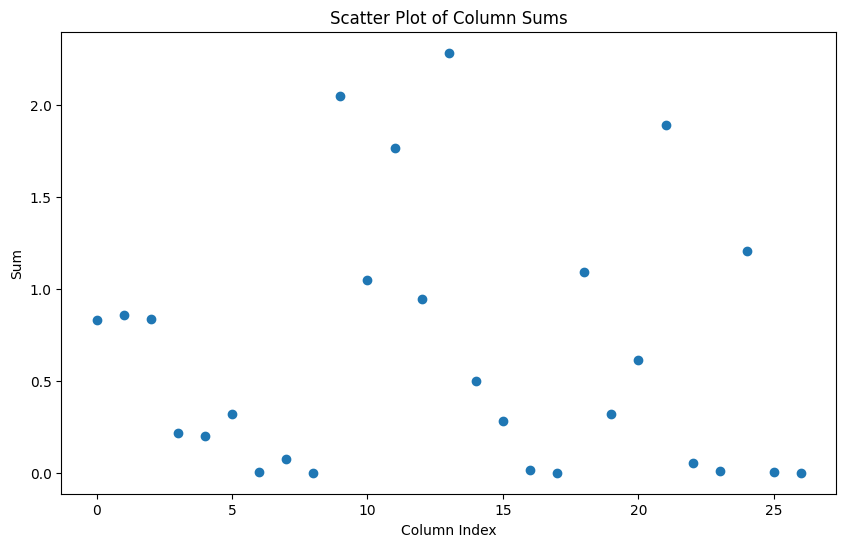

In [17]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(column_sums)), column_sums)
plt.title('Scatter Plot of Column Sums')
plt.xlabel('Column Index')
plt.ylabel('Sum')
plt.show()


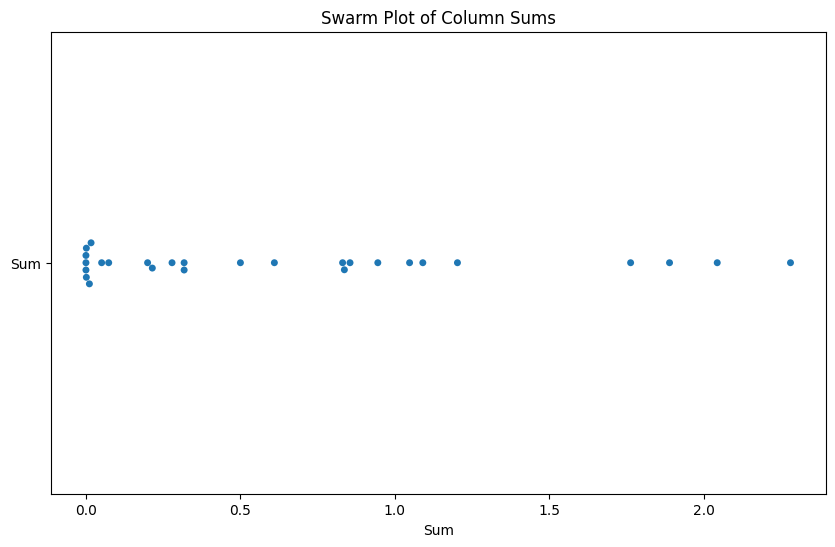

In [18]:


# Assuming column_sums is already calculated
column_sums = df_fire.sum()

# Convert to DataFrame for easier plotting
column_sums_df = pd.DataFrame(column_sums, columns=['Sum'])

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=column_sums_df, orient='h')
plt.title('Swarm Plot of Column Sums')
plt.xlabel('Sum')
plt.show()


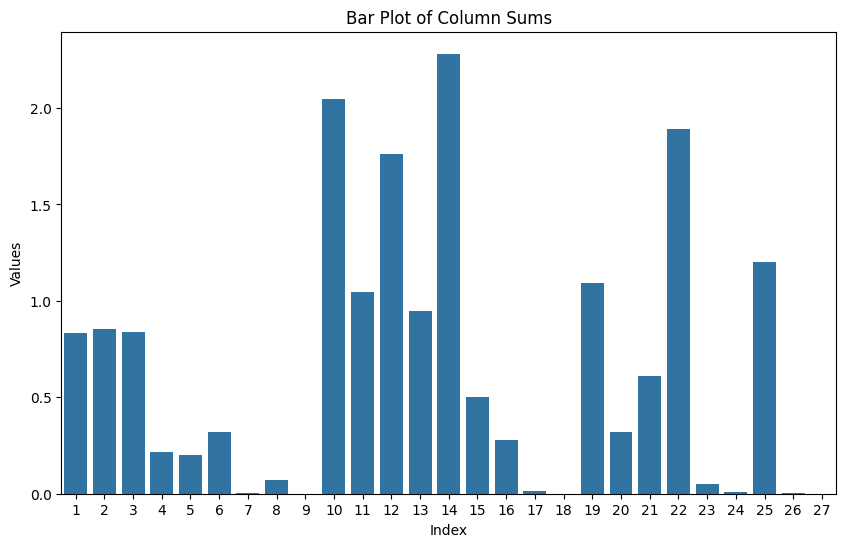

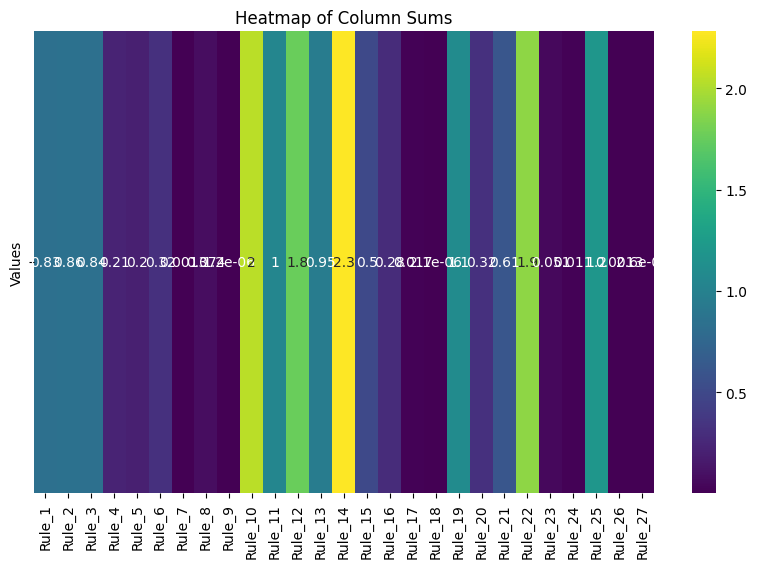

<Figure size 1200x1000 with 0 Axes>

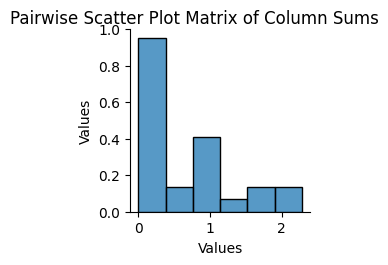

In [19]:

# Assuming column_sums contains your values
# column_sums = df_fire.sum()

# Create a DataFrame from column_sums
df = pd.DataFrame(column_sums, columns=['Values'])

# Generate Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index.map(lambda x: int(x.split('_')[1])), y='Values', data=df)
plt.title('Bar Plot of Column Sums')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

# Generate Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.transpose(), cmap='viridis', annot=True)
plt.title('Heatmap of Column Sums')
plt.show()

# Generate Scatter Plot Matrix
plt.figure(figsize=(12, 10))
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plot Matrix of Column Sums', y=1.02)
plt.show()


the following rules have low firing strenghts and will be removed before carrying out the least squares estimate, please note we removed anything < 10e-2

Rule_8     7.367386e-02

Rule_23    5.081459e-02

Rule_17    1.657432e-02

Rule_24    1.114801e-02

Rule_7     1.305239e-03

Rule_26    1.304088e-03

Rule_18    2.055694e-06

Rule_9     1.200794e-06

Rule_27    2.584215e-09

Remark: you could automate this by asking python to return rule lower than 10e-2


# Step 3.2:
# Update the rule base

In [20]:
import itertools

def generate_rule_base(num_input_variables, num_sets_per_variable):
    """
    Generate a rule base with all possible rules based on the specified number of input variables and sets per variable.

    Parameters:
    num_input_variables : int
        Number of input variables
    num_sets_per_variable : int
        Number of sets per input variable

    Returns:
    tuple
        A tuple containing the rule base (list of strings representing each rule) and the list of membership function names
    """
    # Define alphabet for variable names
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Generate input variable names
    input_variable_names = alphabet[:num_input_variables]

    # Generate fuzzy set names for each variable
    fuzzy_set_names = [[f"{var}_mf{i+1}" for i in range(num_sets_per_variable)] for var in input_variable_names]

    # Generate all possible combinations of fuzzy set names
    rule_combinations = itertools.product(*fuzzy_set_names)

    # Generate human-readable rules
    rule_base = []
    for i, rule in enumerate(rule_combinations, start=1):
        rule_str = f"Rule{i}: If "
        for j, variable in enumerate(input_variable_names):
            rule_str += f"{variable} is {rule[j]}"
            if j < num_input_variables - 1:
                rule_str += " and "
        rule_base.append(rule_str)

    # Flatten the list of fuzzy set names
    membership_function_names = [item for sublist in fuzzy_set_names for item in sublist]

    return rule_base, membership_function_names

def remove_rules(rule_base):
    """
    Remove specified rules from the rule base.

    Parameters:
    rule_base : list of str
        List of rules in the rule base

    Returns:
    list of str
        Updated rule base with specified rules removed
    """
    print("Current Rule base:")
    for i, rule in enumerate(rule_base):
        print(f"{i+1}. {rule}")

    rules_to_remove = input("Enter the rule numbers to remove, separated by commas (e.g., 1,3,5): ")
    rules_to_remove = [int(r.strip()) for r in rules_to_remove.split(",")]

    updated_rule_base = [rule for i, rule in enumerate(rule_base) if (i+1) not in rules_to_remove]

    return updated_rule_base

# Example usage
num_input_variables = 3
num_sets_per_variable = 3
rule_base, membership_function_names = generate_rule_base(num_input_variables, num_sets_per_variable)

print("Rule base:")
for rule in rule_base:
    print(rule)

remove = input("Would you like to remove any rules? (yes/no): ").strip().lower()
if remove == "yes":
    rule_base = remove_rules(rule_base)

print("\nUpdated Rule base:")
for rule in rule_base:
    print(rule)


Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3
Rule7: If A is A_mf1 and B is B_mf3 and C is C_mf1
Rule8: If A is A_mf1 and B is B_mf3 and C is C_mf2
Rule9: If A is A_mf1 and B is B_mf3 and C is C_mf3
Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3
Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2
Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3
Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1
Rule17: If A is A_mf2 and B is B_mf3 and C is C_mf2
Rule18: If A is A_mf2 and B is B_mf3 and C is C_mf3
Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1
Rule20: If

In [21]:

# paste here all the rule combinations from before


rule_combinations = [
    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'),
    ('A_mf1', 'B_mf3', 'C_mf1'), ('A_mf1', 'B_mf3', 'C_mf2'), ('A_mf1', 'B_mf3', 'C_mf3'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'),
    ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf2', 'B_mf3', 'C_mf2'), ('A_mf2', 'B_mf3', 'C_mf3'),
    ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'),
    ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf2', 'C_mf2'), ('A_mf3', 'B_mf2', 'C_mf3'),
    ('A_mf3', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf2'), ('A_mf3', 'B_mf3', 'C_mf3')
]


# paste here the updated rules you got from upper cell

updated_rules = [
    "Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1",
    "Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2",
    "Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3",
    "Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1",
    "Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2",
    "Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3",
    "Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1",
    "Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2",
    "Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3",
    "Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1",
    "Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2",
    "Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3",
    "Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1",
    "Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1",
    "Rule20: If A is A_mf3 and B is B_mf1 and C is C_mf2",
    "Rule21: If A is A_mf3 and B is B_mf1 and C is C_mf3",
    "Rule22: If A is A_mf3 and B is B_mf2 and C is C_mf1",
    "Rule25: If A is A_mf3 and B is B_mf3 and C is C_mf1"
]

# Extract rule combinations from updated rules
updated_rule_combinations = []
for rule in updated_rules:
    parts = rule.split(" and ")
    combination = tuple(part.split(" is ")[1] for part in parts)
    updated_rule_combinations.append(combination)

# Output the updated rule combinations
print(updated_rule_combinations)


[('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'), ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'), ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'), ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'), ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'), ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf1')]


# Step 4:
# Calculate the updated design matrix

for our case

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + w_{Ai} A_i + w_{Bi} B_i + w_{Ci} C_i \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$


In [22]:
# Assuming membership_values_df and y_train are already provided

# set the updated number of rules
num_rules = 18

# Initialize the design matrix
num_rows = membership_values_df.shape[0]
num_features = membership_values_df.shape[1] // 3  # Assuming 3 membership functions per input
design_matrix = np.zeros((num_rows, num_rules * (num_features + 1)))  # Extra column for intercept

# Define the membership function combinations for each rule
rule_combinations = [

    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'),
    ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'),
    ('A_mf3', 'B_mf1', 'C_mf3'), ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf1')

]

# Calculate the design matrix
for row_idx in range(num_rows):
    # Calculate the product for each rule
    products = []
    for (A_mf, B_mf, C_mf) in rule_combinations:
        product = (membership_values_df.at[row_idx, A_mf] * 
                   membership_values_df.at[row_idx, B_mf] * 
                   membership_values_df.at[row_idx, C_mf])
        products.append(product)
    
    # Fill the row in the design matrix with the normalized products and their interaction with input features
    total_product = sum(products)
    row_values = []
    if total_product != 0:
        for i, product in enumerate(products):
            normalized_product = product / total_product  # Normalize by dividing by the sum of products
            # Append the normalized product for the intercept term
            row_values.append(normalized_product)
            # Append the normalized product terms for each input variable
            for col_idx in range(num_features):
                row_values.append(normalized_product * X_train.iloc[row_idx, col_idx])
    else:
        row_values = [0] * (num_rules * (num_features + 1))

    design_matrix[row_idx, :] = row_values

# Convert the design matrix to a DataFrame for better readability
columns = []
for i in range(num_rules):
    columns.append(f'Rule{i+1}_intercept')
    for j in range(num_features):
        columns.append(f'Rule{i+1}_x{j+1}')

design_matrix_df = pd.DataFrame(design_matrix, columns=columns)

# Display the design matrix
design_matrix_df.head()


Rule1_intercept      Rule1_x1      Rule1_x2      Rule1_x3  Rule2_intercept  \
0     2.447094e-09  3.246471e-09 -5.515228e-10 -1.724738e-09     2.613594e-12   
1     4.219199e-09  5.597459e-09 -1.953854e-09 -2.973736e-09     4.506273e-12   
2     2.340638e-01 -1.574980e-01 -8.461521e-02 -1.883976e-01     7.851964e-05   
3     1.065997e-12 -7.172931e-13 -1.344986e-12  1.832619e-12     1.725132e-03   
4     2.836183e-14 -1.908424e-14  6.834445e-15  4.875851e-14     4.589872e-05   

       Rule2_x1      Rule2_x2      Rule2_x3  Rule3_intercept      Rule3_x1  \
0  3.467361e-12 -5.890484e-13 -1.842089e-12     3.141332e-22  4.167493e-22   
1  5.978310e-12 -2.086795e-12 -3.176069e-12     5.416182e-22  7.185454e-22   
2 -5.283468e-05 -2.838524e-05 -6.320036e-05     2.964222e-15 -1.994580e-15   
3 -1.160815e-03 -2.176628e-03  2.965777e-03     3.141788e-01 -2.114062e-01   
4 -3.088455e-05  1.106037e-05  7.890723e-05     8.359017e-03 -5.624656e-03   

   ...     Rule16_x2     Rule16_x3  Rule17_intercept     Rule17_x1  \
0  ... -1.173914e-14 -3.671097e-14      4.057515e-01  5.382959e-01   
1  ... -4.158771e-14 -6.329586e-14      1.116648e-01  1.481417e-01   
2  ... -5.649516e-22 -1.257877e-21      4.314722e-08 -2.903311e-08   
3  ... -2.089897e-07  2.847602e-07      1.885325e-22 -1.268607e-22   
4  ...  1.061966e-09  7.576308e-09      5.472434e-19 -3.682318e-19   

      Rule17_x2     Rule17_x3  Rule18_intercept     Rule18_x1     Rule18_x2  \
0 -9.144775e-02 -2.859780e-01      4.566131e-08  6.057723e-08 -1.029109e-08   
1 -5.171048e-02 -7.870255e-02      2.005771e-09  2.660985e-09 -9.288458e-10   
2 -1.559794e-08 -3.472914e-08      1.697749e-15 -1.142390e-15 -6.137449e-16   
3 -2.378746e-22  3.241175e-22      7.117356e-33 -4.789161e-33 -8.980087e-33   
4  1.318711e-19  9.407988e-19      2.253871e-24 -1.516595e-24  5.431228e-25   

      Rule18_x3  
0 -3.218258e-08  
1 -1.413689e-09  
2 -1.366516e-15  
3  1.223587e-32  
4  3.874763e-24  

[5 rows x 72 columns]

# Step 5: Estimate the consequents using least squares algorithm

In [23]:
"""Linear least squares with l2 regularization.

    Minimizes the objective function::

    ||y - Xw||^2_2 + alpha * ||w||^2_2

    This model solves a regression model where the loss function is
    the linear least squares function and regularization is given by
    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
    This estimator has built-in support for multi-variate regression
    (i.e., when y is a 2d-array of shape (n_samples, n_targets))."""

'Linear least squares with l2 regularization.\n\n    Minimizes the objective function::\n\n    ||y - Xw||^2_2 + alpha * ||w||^2_2\n\n    This model solves a regression model where the loss function is\n    the linear least squares function and regularization is given by\n    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.\n    This estimator has built-in support for multi-variate regression\n    (i.e., when y is a 2d-array of shape (n_samples, n_targets)).'

In [24]:
# perform linear least squares with l2 regularization
from sklearn.linear_model import Ridge

# Define the regularization strength (alpha)
alpha = 0.0  # You can adjust the value of alpha as needed

# Define the Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=alpha, solver='lsqr') # solver least squares with QR decomposition
# lsqr Find the least-squares solution to a large, sparse, linear system of equations.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html

# Fit the model to the design matrix and y_train
ridge_model.fit(design_matrix, y_train)

# Get the coefficients (consequents) from the trained model
consequents_regularized = ridge_model.coef_

# Display the consequents with L2 regularization
print("Consequents with L2 regularization:")

# Number of rules and features
num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
num_features = X_train.shape[1]

# Prepare data for tabular display
table_data = []

for rule_index in range(num_rules):
    intercept = consequents_regularized[rule_index * (num_features + 1)]
    weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
    row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
    table_data.append(row)

# Create a DataFrame for better visualization
column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
df = pd.DataFrame(table_data, columns=column_names)

# Display the consequents in a tabular format
print("Consequents:")
print(df.to_string(index=False))




Consequents with L2 regularization:
Consequents:
   Rule  Intercept  Weight for A  Weight for B  Weight for C
 Rule 1   0.387932     -0.566322     -1.329579      2.236180
 Rule 2 -13.215868     -8.339319      0.602744      0.559197
 Rule 3   0.221421      0.103840      0.077798      0.291977
 Rule 4   0.931976     -0.455180    -11.409623      1.839003
 Rule 5   7.217064      4.849791      3.031834     -7.790428
 Rule 6   0.197979     -0.006217      1.600808      0.316113
 Rule 7   0.878528     -1.560333     -3.722106      5.276236
 Rule 8   0.193088     -3.601105     -0.192366      7.968855
 Rule 9   0.361926     -1.022453      0.404963      0.401613
Rule 10   1.394209     -1.777032    -25.804651      3.804778
Rule 11   1.684888      1.095162     -0.256439     -1.299446
Rule 12   0.672374     -0.473680      3.426545      1.146510
Rule 13  -1.715169      1.170633     -2.933922     -0.405285
Rule 14   0.159827      1.145503      0.858744      0.682030
Rule 15   0.766826      1.540322    

# Step 6:
# Compile the model

 * Detected Sugeno model type
{'OUTPUT': 1.3181006671004103}


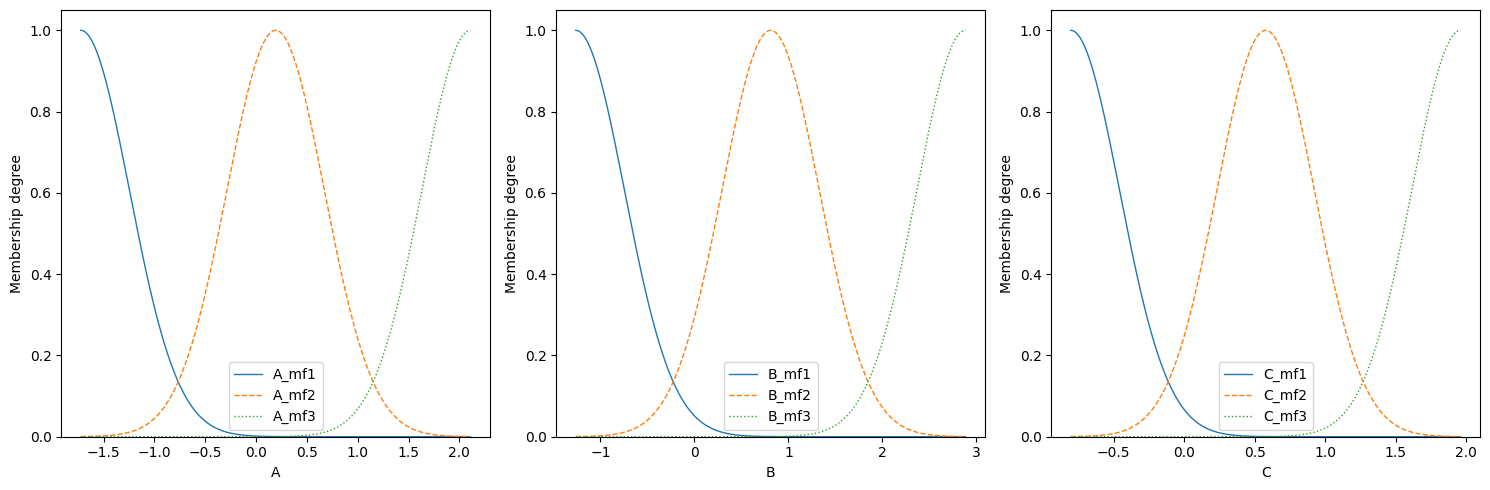

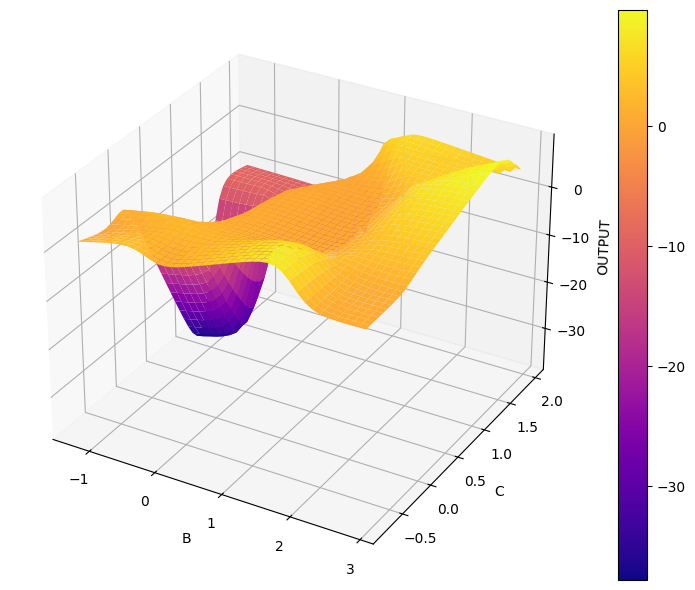

In [37]:
from simpful import *

FS = FuzzySystem(show_banner=False)

"""
please note I renumberd the updated rule base manually
Updated Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3
Rule7: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule8: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule9: If A is A_mf2 and B is B_mf1 and C is C_mf3
Rule10: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule11: If A is A_mf2 and B is B_mf2 and C is C_mf2
Rule12: If A is A_mf2 and B is B_mf2 and C is C_mf3
Rule13: If A is A_mf2 and B is B_mf3 and C is C_mf1
Rule14: If A is A_mf3 and B is B_mf1 and C is C_mf1
Rule15: If A is A_mf3 and B is B_mf1 and C is C_mf2
Rule16: If A is A_mf3 and B is B_mf1 and C is C_mf3
Rule17: If A is A_mf3 and B is B_mf2 and C is C_mf1
Rule18: If A is A_mf3 and B is B_mf3 and C is C_mf1
"""

RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)" 
RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)" 
RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)" 
RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)" 
RULE7 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 
RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun9)" 
RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)" 
RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)" 
RULE12 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun12)" 
RULE13 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun13)" 
RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun14)" 
RULE15 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun15)" 
RULE16 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun16)" 
RULE17 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun17)"  
RULE18 = "IF (A IS A_mf3) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun18)" 

FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15, RULE16, RULE17, RULE18])

FS.set_output_function('fun1', '0.387932 -0.566322 * A -1.329579 * B +2.236180 * C')
FS.set_output_function('fun2', '-13.215868 -8.339319 * A +0.602744 * B +0.559197 * C')
FS.set_output_function('fun3', '0.221421 +0.103840 * A +0.077798 * B +0.291977 * C')
FS.set_output_function('fun4', '0.931976 -0.455180 * A -11.409623 * B +1.839003 * C')
FS.set_output_function('fun5', '7.217064 +4.849791 * A +3.031834 * B -7.790428 * C')
FS.set_output_function('fun6', '0.197979 -0.006217 * A +1.600808 * B +0.316113 * C')
FS.set_output_function('fun7', '0.878528 -1.560333 * A -3.722106 * B +5.276236 * C')
FS.set_output_function('fun8', '0.193088 -3.601105 * A -0.192366 * B +7.968855 * C')
FS.set_output_function('fun9', '0.361926 -1.022453 * A +0.404963 * B +0.401613 * C')
FS.set_output_function('fun10', '1.394209 -1.777032 * A -25.804651 * B +3.804778 * C')
FS.set_output_function('fun11', '1.684888 +1.095162 * A -0.256439 * B -1.299446 * C')
FS.set_output_function('fun12', '0.672374 -0.473680 * A +3.426545 * B +1.146510 * C')
FS.set_output_function('fun13', '-1.715169 +1.170633 * A -2.933922 * B -0.405285 * C')
FS.set_output_function('fun14', '0.159827 +1.145503 * A +0.858744 * B +0.682030 * C')
FS.set_output_function('fun15', '0.766826 +1.540322 * A +3.568332 * B +0.012127 * C')
FS.set_output_function('fun16', '0.027299 +0.064030 * A -0.020809 * B +0.053503 * C')
FS.set_output_function('fun17', '-0.174891 +2.772644 * A +5.973190 * B +3.682391 * C')
FS.set_output_function('fun18', '0.010590 +0.014000 * A +0.679840 * B -0.007403 * C')



FS_1 = FuzzySet(function=Gaussian_MF(-1.724, 0.479), term='A_mf1')
FS_2 = FuzzySet(function=Gaussian_MF(0.193, 0.479), term='A_mf2')
FS_3 = FuzzySet(function=Gaussian_MF(2.110, 0.479), term='A_mf3')
MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.723773, 2.109763])
FS.add_linguistic_variable('A', MF_A)

FS_11 = FuzzySet(function=Gaussian_MF(-1.262, 0.518), term='B_mf1')
FS_12 = FuzzySet(function=Gaussian_MF(0.811, 0.518), term='B_mf2')
FS_13 = FuzzySet(function=Gaussian_MF(2.884, 0.518), term='B_mf3')
MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.261717, 2.883635])
FS.add_linguistic_variable('B', MF_B)

FS_21 = FuzzySet(function=Gaussian_MF(-0.805, 0.346), term='C_mf1')
FS_22 = FuzzySet(function=Gaussian_MF(0.578, 0.346), term='C_mf2')
FS_23 = FuzzySet(function=Gaussian_MF(1.961, 0.346), term='C_mf3')
MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-0.804899, 1.960751])
FS.add_linguistic_variable('C', MF_C)




# end of automatically generated code #

# here is the model visualization
# Set antecedents values
FS.set_variable("A", 0.0)
FS.set_variable("B", 0.0)
FS.set_variable("C", 0.0)
# Plot all linguistic variables and save them in a output file
FS.produce_figure(outputfile='lvs.pdf')

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["OUTPUT"]))

fig = FS.plot_surface(variables=['B','C'], output='OUTPUT')

In [38]:

# Assuming X_train is your dataframe
# Extract the relevant columns: A, B, and C
features = X_train[['A', 'B', 'C']]

# Calculate the minimum and maximum for each feature
min_values = features.min()
max_values = features.max()

# Print the results
print("Minimum values for each feature:")
print(min_values)
print("\nMaximum values for each feature:")
print(max_values)


Minimum values for each feature:
A   -1.723773
B   -1.261717
C   -0.804899
dtype: float64

Maximum values for each feature:
A    2.109763
B    2.883635
C    1.960751
dtype: float64


# Step 7:
# Check performance

recall from earlier that {'dw_mw': 'A', 'delta_p': 'B', 'v': 'C', 'fx': 'Y'})

In [40]:
from sklearn.metrics import mean_absolute_error

# Initialize a list to store the predicted outputs
predicted_outputs = []

# Iterate through all samples in the test dataset
for index, sample in X_test.iterrows():
    # Set the variables for the current sample
    FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
    FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
    FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column
    
    # Perform Sugeno inference and get the predicted output
    predicted_output = FS.Sugeno_inference(["OUTPUT"])
    
    # Append the predicted output to the list
    predicted_outputs.append(predicted_output)

# Extract the predicted output values from the dictionaries
predicted_values = [output['OUTPUT'] for output in predicted_outputs]

# Calculate the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error (MAE):", MAE)

Mean Absolute Error (MAE): 1.293331582306109


# Step 8:
# Grid Search
the pursuit of the perfect regularization parameter alpha


Consequents with L2 regularization:
Consequents:
   Rule  Intercept  Weight for A  Weight for B  Weight for C
 Rule 1   1.010571     -0.958564      0.646338      1.944266
 Rule 2 -12.028186     -7.630387      0.640143     -0.189276
 Rule 3   0.175166      0.153218      0.071454      0.236607
 Rule 4   0.549355     -0.262709     -0.724864     -0.216028
 Rule 5   3.200092      3.883106      2.849351      1.311186
 Rule 6   0.164015      0.025768      1.589464      0.250224
 Rule 7   3.761416     -1.455092      0.897680      4.236499
 Rule 8   0.309711     -3.452338     -0.333534      5.742174
 Rule 9   0.279671     -0.991139      0.391775      0.316808
Rule 10   1.331191     -0.636285     -1.724113     -0.454458
Rule 11   1.296556      0.893465     -0.632951     -0.127834
Rule 12   0.604704     -0.444087      3.370314      1.032647
Rule 13   0.056730     -0.068228      0.124146      0.027943
Rule 14  -0.679925      1.444109     -0.137872      1.613228
Rule 15   0.259672      0.607095    

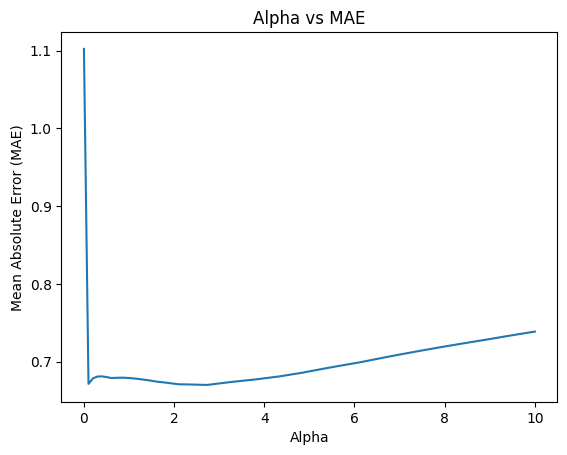

Optimal Alpha: 2.728
Minimum MAE: 0.6701022973638153


In [41]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from simpful import *

# Define the range of alpha values for grid search
alpha_values = np.linspace(0.001, 10, num=100)

# Initialize lists to store alpha values and corresponding MAE
alpha_list = []
mae_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Define the Ridge regression model with L2 regularization
    ridge_model = Ridge(alpha=alpha, solver='lsqr')
    
    # Fit the model to the design matrix and y_train
    ridge_model.fit(design_matrix, y_train)

    # Get the coefficients (consequents) from the trained model
    consequents_regularized = ridge_model.coef_

    
    # Display the consequents with L2 regularization
    print("Consequents with L2 regularization:")

    # Number of rules and features
    num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
    num_features = X_train.shape[1]

    # Prepare data for tabular display
    table_data = []

    for rule_index in range(num_rules):
        intercept = consequents_regularized[rule_index * (num_features + 1)]
        weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
        row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
        table_data.append(row)

    # Create a DataFrame for better visualization
    column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
    df = pd.DataFrame(table_data, columns=column_names)

    # Display the consequents in a tabular format
    print("Consequents:")
    print(df.to_string(index=False))
    
    FS = FuzzySystem(show_banner=False)
    RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
    RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
    RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)" 
    RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)" 
    RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)" 
    RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)" 
    RULE7 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
    RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 
    RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun9)" 
    RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)" 
    RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)" 
    RULE12 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun12)" 
    RULE13 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun13)" 
    RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun14)" 
    RULE15 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun15)" 
    RULE16 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun16)" 
    RULE17 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun17)"  
    RULE18 = "IF (A IS A_mf3) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun18)" 

    FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15, RULE16, RULE17, RULE18])
    # Extract the consequents obtained from the Ridge regression model
    consequents = df.iloc[:, 1:].values  # Assuming 'df' contains the DataFrame with consequents

    # Define a list of rule names corresponding to the rules in your Fuzzy System
    rule_names = ['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7', 'fun8', 'fun9', 'fun10', 'fun11', 'fun12', 'fun13', 'fun14', 'fun15', 'fun16', 'fun17', 'fun18']

    # Iterate through each rule and set the output function using the corresponding coefficients
    for rule_index, rule_name in enumerate(rule_names):
        # Extract the coefficients for the current rule
        coefficients = consequents[rule_index]
        
        # Construct the output function string
        output_function = f"{coefficients[0]}"
        for feature_index, coefficient in enumerate(coefficients[1:]):
            output_function += f" + {coefficient} * {'ABC'[feature_index]}"
        
        # Set the output function for the current rule
        FS.set_output_function(rule_name, output_function)



    FS_1 = FuzzySet(function=Gaussian_MF(-1.724, 0.479), term='A_mf1')
    FS_2 = FuzzySet(function=Gaussian_MF(0.193, 0.479), term='A_mf2')
    FS_3 = FuzzySet(function=Gaussian_MF(2.110, 0.479), term='A_mf3')
    MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.723773, 2.109763])
    FS.add_linguistic_variable('A', MF_A)

    FS_11 = FuzzySet(function=Gaussian_MF(-1.262, 0.518), term='B_mf1')
    FS_12 = FuzzySet(function=Gaussian_MF(0.811, 0.518), term='B_mf2')
    FS_13 = FuzzySet(function=Gaussian_MF(2.884, 0.518), term='B_mf3')
    MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.261717, 2.883635])
    FS.add_linguistic_variable('B', MF_B)

    FS_21 = FuzzySet(function=Gaussian_MF(-0.805, 0.346), term='C_mf1')
    FS_22 = FuzzySet(function=Gaussian_MF(0.578, 0.346), term='C_mf2')
    FS_23 = FuzzySet(function=Gaussian_MF(1.961, 0.346), term='C_mf3')
    MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-0.804899, 1.960751])
    FS.add_linguistic_variable('C', MF_C)



    # here you input value to the model and it makes predictions
    # Set antecedents values
    FS.set_variable("A", 0.0)
    FS.set_variable("B", 0.0)
    FS.set_variable("C", 0.0)
    print(FS.Sugeno_inference(["OUTPUT"]))

    # Initialize a list to store the predicted outputs
    predicted_outputs = []
    
    # Iterate through all samples in the test dataset
    for index, sample in X_test.iterrows():
        # Set the variables for the current sample
        FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
        FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
        FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column

        # Perform Sugeno inference and get the predicted output
        predicted_output = FS.Sugeno_inference(["OUTPUT"])

        # Append the predicted output to the list
        predicted_outputs.append(predicted_output)

    # Extract the predicted output values from the dictionaries
    predicted_values = [output['OUTPUT'] for output in predicted_outputs]

    # Calculate the Mean Absolute Error (MAE) for the current alpha value
    MAE = mean_absolute_error(y_test, predicted_values)
    
    # Append alpha and MAE to the lists
    alpha_list.append(alpha)
    mae_list.append(MAE)

# Plot Alpha versus MAE
plt.plot(alpha_list, mae_list)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Alpha vs MAE')
plt.show()

# Find the alpha value with the minimum MAE
min_mae_index = np.argmin(mae_list)
optimal_alpha = alpha_list[min_mae_index]
min_mae = mae_list[min_mae_index]

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Minimum MAE: {min_mae}")







# Test this claimed Alpha

In [42]:
# perform linear least squares with l2 regularization
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


# Define the regularization strength (alpha)
alpha = 2.728  # You can adjust the value of alpha as needed

# Define the Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=alpha, solver='lsqr') # solver least squares with QR decomposition
# lsqr Find the least-squares solution to a large, sparse, linear system of equations.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html

# Fit the model to the design matrix and y_train
ridge_model.fit(design_matrix, y_train)

# Get the coefficients (consequents) from the trained model
consequents_regularized = ridge_model.coef_

# Display the consequents with L2 regularization
print("Consequents with L2 regularization:")

# Number of rules and features
num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
num_features = X_train.shape[1]

# Prepare data for tabular display
table_data = []

for rule_index in range(num_rules):
    intercept = consequents_regularized[rule_index * (num_features + 1)]
    weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
    row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
    table_data.append(row)

# Create a DataFrame for better visualization
column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
df = pd.DataFrame(table_data, columns=column_names)

# Display the consequents in a tabular format
print("Consequents:")
print(df.to_string(index=False))



# Here is the model 
from simpful import *



FS = FuzzySystem(show_banner=False)
RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)" 
RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)" 
RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)" 
RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)" 
RULE7 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 
RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun9)" 
RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)" 
RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)" 
RULE12 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun12)" 
RULE13 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun13)" 
RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun14)" 
RULE15 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun15)" 
RULE16 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun16)" 
RULE17 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun17)"  
RULE18 = "IF (A IS A_mf3) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun18)" 



FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15, RULE16, RULE17, RULE18])
# Extract the consequents obtained from the Ridge regression model
consequents = df.iloc[:, 1:].values  # Assuming 'df' contains the DataFrame with consequents

# Define a list of rule names corresponding to the rules in your Fuzzy System
rule_names = ['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7', 'fun8', 'fun9', 'fun10', 'fun11', 'fun12', 'fun13', 'fun14', 'fun15', 'fun16', 'fun17', 'fun18' ]

# Iterate through each rule and set the output function using the corresponding coefficients
for rule_index, rule_name in enumerate(rule_names):
    # Extract the coefficients for the current rule
    coefficients = consequents[rule_index]
        
    # Construct the output function string
    output_function = f"{coefficients[0]}"
    for feature_index, coefficient in enumerate(coefficients[1:]):
        output_function += f" + {coefficient} * {'ABC'[feature_index]}"
        
    # Set the output function for the current rule
    FS.set_output_function(rule_name, output_function)



FS_1 = FuzzySet(function=Gaussian_MF(-1.724, 0.479), term='A_mf1')
FS_2 = FuzzySet(function=Gaussian_MF(0.193, 0.479), term='A_mf2')
FS_3 = FuzzySet(function=Gaussian_MF(2.110, 0.479), term='A_mf3')
MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.723773, 2.109763])
FS.add_linguistic_variable('A', MF_A)

FS_11 = FuzzySet(function=Gaussian_MF(-1.262, 0.518), term='B_mf1')
FS_12 = FuzzySet(function=Gaussian_MF(0.811, 0.518), term='B_mf2')
FS_13 = FuzzySet(function=Gaussian_MF(2.884, 0.518), term='B_mf3')
MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.261717, 2.883635])
FS.add_linguistic_variable('B', MF_B)

FS_21 = FuzzySet(function=Gaussian_MF(-0.805, 0.346), term='C_mf1')
FS_22 = FuzzySet(function=Gaussian_MF(0.578, 0.346), term='C_mf2')
FS_23 = FuzzySet(function=Gaussian_MF(1.961, 0.346), term='C_mf3')
MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-0.804899, 1.960751])
FS.add_linguistic_variable('C', MF_C)



# here you input value to the model and it makes predictions
# Set antecedents values
FS.set_variable("A", 0.0)
FS.set_variable("B", 0.0)
FS.set_variable("C", 0.0)
print(FS.Sugeno_inference(["OUTPUT"]))


# here you check the error of the predictions in terms of MAE
# Initialize a list to store the predicted outputs
predicted_outputs = []

# Iterate through all samples in the test dataset
for index, sample in X_test.iterrows():
    # Set the variables for the current sample
    FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
    FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
    FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column
    
    # Perform Sugeno inference and get the predicted output
    predicted_output = FS.Sugeno_inference(["OUTPUT"])
    
    # Append the predicted output to the list
    predicted_outputs.append(predicted_output)

# Extract the predicted output values from the dictionaries
predicted_values = [output['OUTPUT'] for output in predicted_outputs]

# Calculate the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error (MAE):", MAE)



Consequents with L2 regularization:
Consequents:
   Rule  Intercept  Weight for A  Weight for B  Weight for C
 Rule 1   0.022008     -0.012856      0.094212      0.046183
 Rule 2  -0.132010      0.199110      0.075878     -0.041242
 Rule 3  -0.061505      0.166569     -0.037015     -0.134518
 Rule 4   0.132222     -0.090248     -0.032457     -0.102006
 Rule 5   0.072579     -0.120967      0.208555      0.018513
 Rule 6   0.110739     -0.011693      0.078774      0.175934
 Rule 7  -0.127924     -0.284277      0.304558      0.231927
 Rule 8   0.192118     -0.383533     -0.101052      0.023043
 Rule 9  -0.061343     -0.185703     -0.044541     -0.150419
Rule 10   0.186724     -0.319397     -0.109383     -0.152078
Rule 11   0.046180      0.056074      0.001841      0.012155
Rule 12   0.360705     -0.252886      0.135028      0.618086
Rule 13  -0.031352     -0.043381     -0.073725      0.022937
Rule 14  -0.259669     -0.087463      0.182963      0.407036
Rule 15   0.132275      0.242003    

# Model 3:
Membrane Type 1 = TFC (Thin-film composite)

Membrane Orientation 0 = AL-FS (active layer facing feed solution)

## Estimating the consequents of First Order takagi sugeno

General formula 

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + \sum_{k=1}^{n} a_{ik} x_k \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$



for our case

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + w_{Ai} A_i + w_{Bi} B_i + w_{Ci} C_i \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$


# Step 0
# Preparing the data


In [48]:

path = 'subset_10.csv'
df = pd.read_csv(path)
df.head()

Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
0              1                     0                        58.44   
1              1                     0                        58.44   
2              1                     0                        58.44   
3              1                     0                        58.44   
4              1                     0                        58.44   

   Delta_P (bar)  Velocity Mean (cm/s)  Membrane Flux (LMH)  
0      48.722970                  25.0                34.42  
1      24.361485                   9.0                17.50  
2      26.024385                   9.0                27.50  
3      24.361485                   9.0                19.00  
4      26.024385                   9.0                21.00

In [49]:
# Remove first two columns of the dataset
df = df.drop(columns=['Membrane Type', 'Membrane Orientation'])


# Rename columns
df = df.rename(columns={'DS Molecular Weight (g/mol)': 'dw_mw',
                        'Delta_P (bar)': 'delta_p',
                        'Velocity Mean (cm/s)': 'v',
                        'Membrane Flux (LMH)': 'fx'})

df.head()


dw_mw    delta_p     v     fx
0  58.44  48.722970  25.0  34.42
1  58.44  24.361485   9.0  17.50
2  58.44  26.024385   9.0  27.50
3  58.44  24.361485   9.0  19.00
4  58.44  26.024385   9.0  21.00

In [50]:

# Assuming df is your DataFrame containing the data

# Print feature names before changes
print("Feature names before changes:")
print(df.columns.tolist())

# Change feature names
df = df.rename(columns={'dw_mw': 'A', 'delta_p': 'B', 'v': 'C', 'fx': 'Y'})

# Print feature names after changes
print("\nFeature names after changes:")
print(df.columns.tolist())


Feature names before changes:
['dw_mw', 'delta_p', 'v', 'fx']

Feature names after changes:
['A', 'B', 'C', 'Y']


In [51]:
df.head()

A          B     C      Y
0  58.44  48.722970  25.0  34.42
1  58.44  24.361485   9.0  17.50
2  58.44  26.024385   9.0  27.50
3  58.44  24.361485   9.0  19.00
4  58.44  26.024385   9.0  21.00

In [52]:

# perform z score normalization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the entire DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Now df_normalized contains z-score normalized values for all columns in df
df_normalized.head()

A         B         C         Y
0 -0.505008 -0.357614  1.653293  1.026900
1 -0.505008 -0.763590 -0.964853 -0.124678
2 -0.505008 -0.735878 -0.964853  0.555924
3 -0.505008 -0.763590 -0.964853 -0.022587
4 -0.505008 -0.735878 -0.964853  0.113533

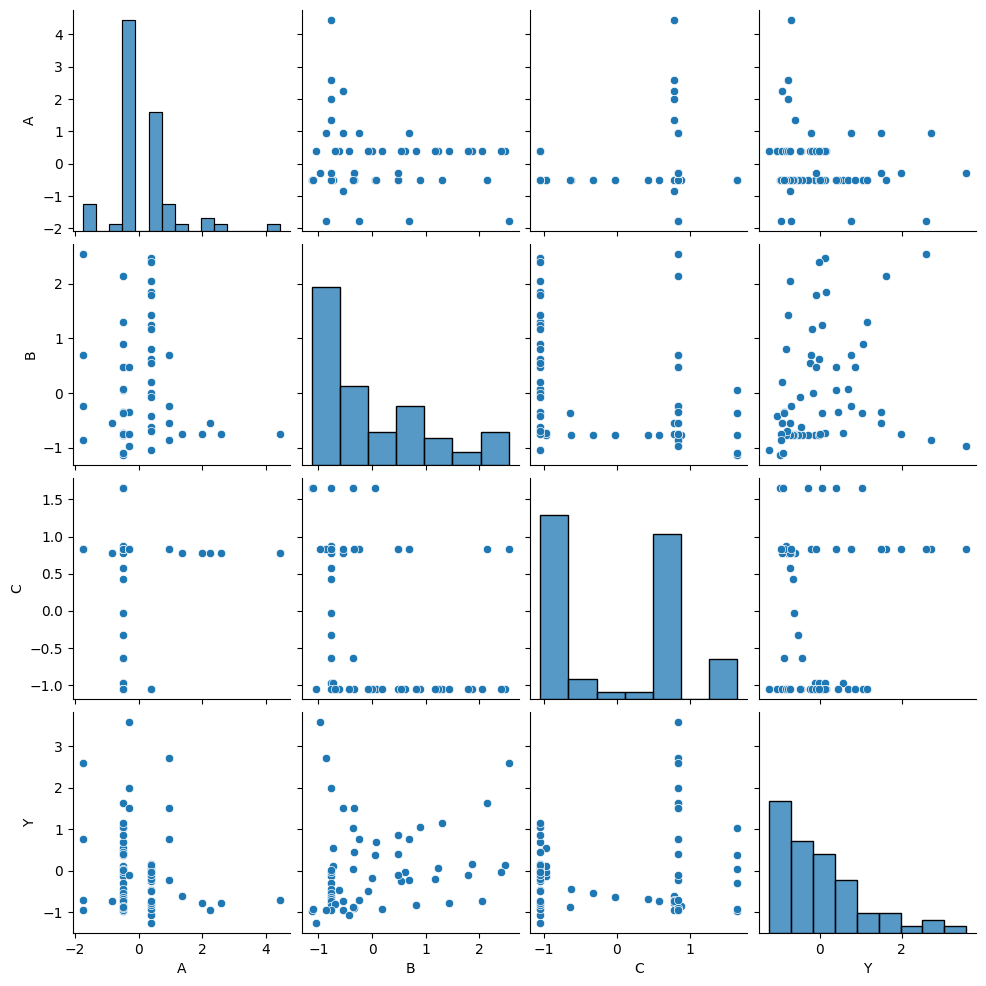

In [31]:

# Assuming df_normalized is your DataFrame
# Create a seaborn pairplot
sns.pairplot(df_normalized)


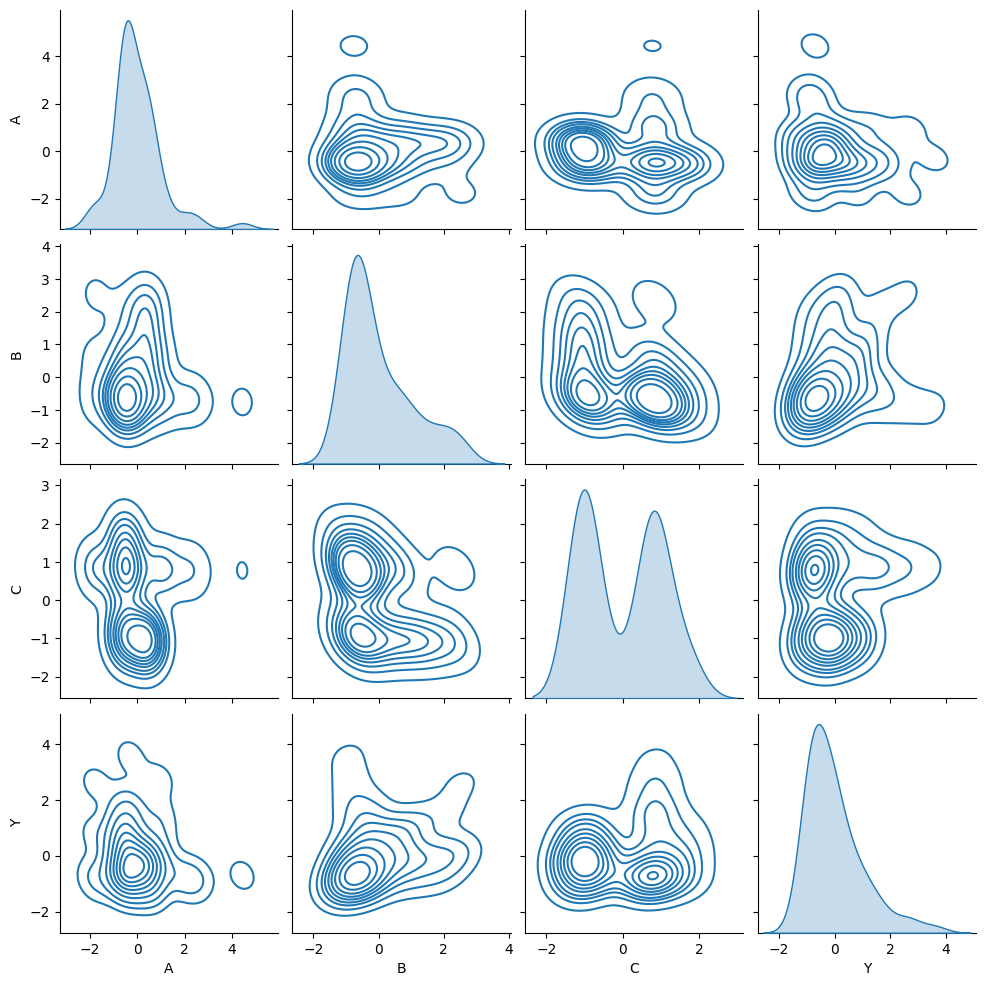

In [32]:
# make it curvy
g = sns.pairplot(df_normalized, diag_kind="kde", kind="kde")
plt.show()

In [53]:
df_normalized.shape

(64, 4)

In [54]:

# Assuming df_normalized is your dataframe
# Extract the first three columns: A, B, and C
features = df_normalized[['A', 'B', 'C']]

# Calculate the minimum and maximum for each feature
min_values = features.min()
max_values = features.max()

# Print the results
print("Minimum values for each feature:")
print(min_values)
print("\nMaximum values for each feature:")
print(max_values)


Minimum values for each feature:
A   -1.760730
B   -1.128969
C   -1.046670
dtype: float64

Maximum values for each feature:
A    4.439415
B    2.546573
C    1.653293
dtype: float64


In [55]:
# Split data into training and testing


from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with features (X) and target variable (y)

# Split the data into features (X) and target variable (y)
X = df_normalized.drop(columns=['Y'])  
y = df_normalized['Y']

# Split the features (X) and target variable (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Adjust the test_size parameter to set the proportion of the dataset to include in the test split



In [56]:
# Resetting the indexes
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.head()

A         B         C
0 -0.505008 -1.104610  1.653293
1  0.379270  2.475554 -1.046670
2 -0.505008  2.133669  0.835122
3 -0.505008 -0.763590 -0.964853
4 -0.505008 -0.763590 -0.629403

# Step 1
# Rules Generator

we need to create a function that generates all possible rules

max number of rules
$$ m^n $$

 m: number of sets per variable, n: number of input variables

given we have only 64 data points, we will decide to go with 2 sets per variable

In [58]:
import itertools

def generate_rule_base(num_input_variables, num_sets_per_variable):
    """
    Generate a rule base with all possible rules based on the specified number of input variables and sets per variable.

    Parameters:
    num_input_variables : int
        Number of input variables
    num_sets_per_variable : int
        Number of sets per input variable

    Returns:
    tuple
        A tuple containing the rule base (list of strings representing each rule) and the list of membership function names
    """
    # Define alphabet for variable names
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Generate input variable names
    input_variable_names = alphabet[:num_input_variables]

    # Generate fuzzy set names for each variable
    fuzzy_set_names = [[f"{var}_mf{i+1}" for i in range(num_sets_per_variable)] for var in input_variable_names]

    # Generate all possible combinations of fuzzy set names
    rule_combinations = itertools.product(*fuzzy_set_names)

    # Generate human-readable rules
    rule_base = []
    for i, rule in enumerate(rule_combinations, start=1):
        rule_str = f"Rule{i}: If "
        for j, variable in enumerate(input_variable_names):
            rule_str += f"{variable} is {rule[j]}"
            if j < num_input_variables - 1:
                rule_str += " and "
        rule_base.append(rule_str)

    # Flatten the list of fuzzy set names
    membership_function_names = [item for sublist in fuzzy_set_names for item in sublist]

    return rule_base, membership_function_names

# Example usage
num_input_variables = 3
num_sets_per_variable = 2
rule_base, membership_function_names = generate_rule_base(num_input_variables, num_sets_per_variable)

print("Rule base:")
for rule in rule_base:
    print(rule)

print("\nMembership functions:")
print(membership_function_names)


Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule5: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule6: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule7: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule8: If A is A_mf2 and B is B_mf2 and C is C_mf2

Membership functions:
['A_mf1', 'A_mf2', 'B_mf1', 'B_mf2', 'C_mf1', 'C_mf2']


# Step 2
# Parameters setting of the gaussian membership functions


Membership function partitions for A:
A_mf1: Mean=-1.761, Std Dev=1.083
A_mf2: Mean=2.573, Std Dev=1.083

Membership function partitions for B:
B_mf1: Mean=-1.105, Std Dev=0.895
B_mf2: Mean=2.476, Std Dev=0.895

Membership function partitions for C:
C_mf1: Mean=-1.047, Std Dev=0.675
C_mf2: Mean=1.653, Std Dev=0.675


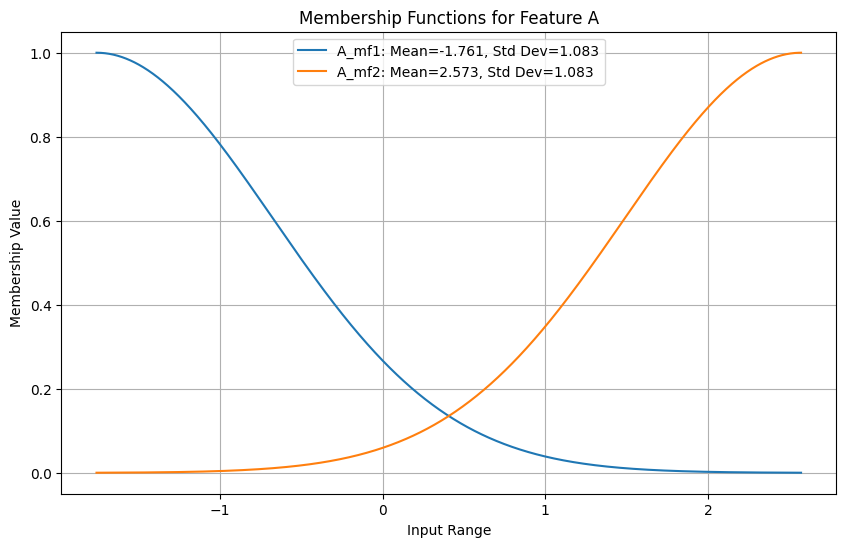

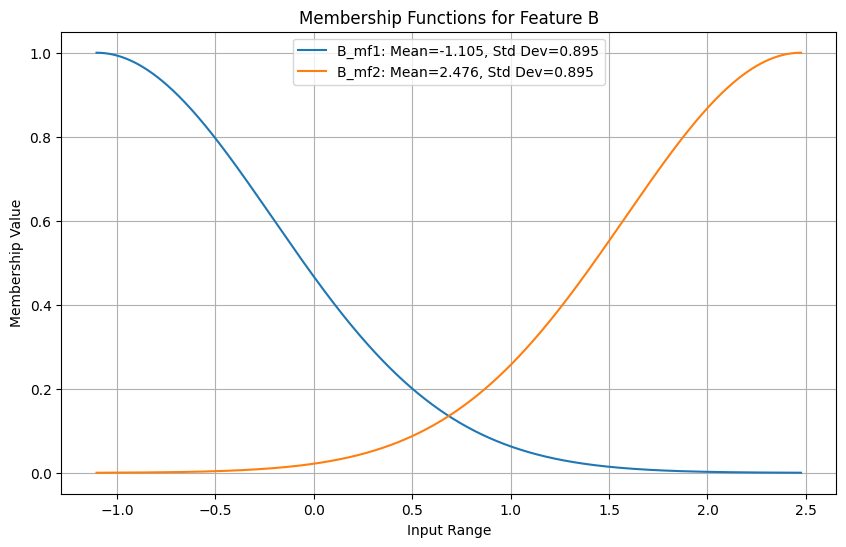

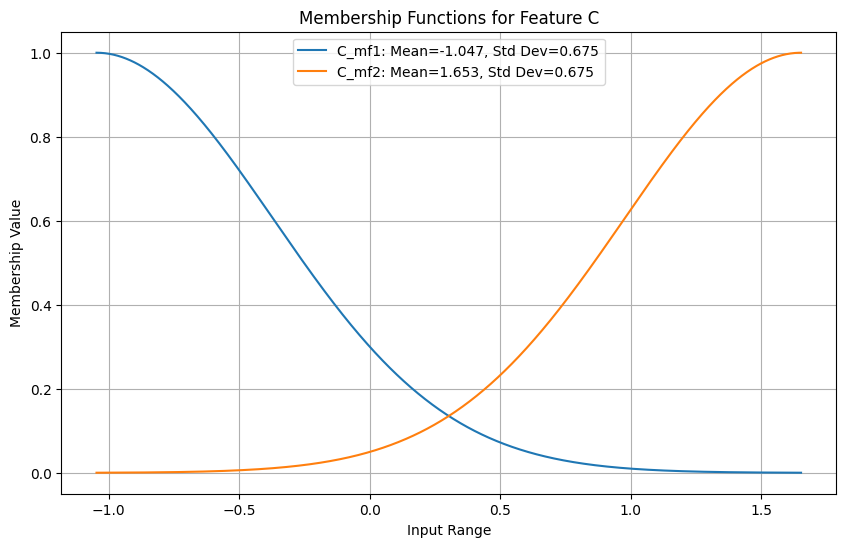

In [59]:


def perform_partitioning_and_plot(X, num_membership_functions):
    """
    Perform grid partitioning and plot membership functions for each feature in the DataFrame.

    Parameters:
    X : pandas.DataFrame
        DataFrame containing the features
    num_membership_functions : int
        Number of membership functions
    """
    membership_function_details = []
    
    for feature in X.columns:
        # Calculate the input range for the current feature
        input_range = (X[feature].min(), X[feature].max())

        # Calculate the width of each partition
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)

        # Calculate mean and standard deviation for each partition
        membership_functions = []
        for i in range(num_membership_functions):
            mean = input_range[0] + i * partition_width
            std_dev = partition_width / 4  # Assuming a standard deviation of one-fourth of the partition width
            membership_functions.append((mean, std_dev))

        # Collect the calculated means and standard deviations
        details = f"\nMembership function partitions for {feature}:"
        for i, (mean, std_dev) in enumerate(membership_functions):
            details += f"\n{feature}_mf{i+1}: Mean={mean:.3f}, Std Dev={std_dev:.3f}"
        
        membership_function_details.append(details)
    
    # Print all membership function details together
    for detail in membership_function_details:
        print(detail)

    # Plot Gaussian membership functions based on their mean and standard deviation
    for feature in X.columns:
        input_range = (X[feature].min(), X[feature].max())
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)
        membership_functions = [(input_range[0] + i * partition_width, partition_width / 4) for i in range(num_membership_functions)]
        
        x = np.linspace(input_range[0], input_range[1], 1000)
        plt.figure(figsize=(10, 6))
        for i, (mean, std_dev) in enumerate(membership_functions):
            y = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
            plt.plot(x, y, label=f'{feature}_mf{i+1}: Mean={mean:.3f}, Std Dev={std_dev:.3f}')
        plt.xlabel('Input Range')
        plt.ylabel('Membership Value')
        plt.title(f'Membership Functions for Feature {feature}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
num_membership_functions = 2
perform_partitioning_and_plot(X_train, num_membership_functions)


# Step 3: calculate membership values per data row

In [60]:


def calculate_membership_values(X, num_membership_functions):
    """
    Calculate the membership values for each feature value in the DataFrame using Gaussian membership functions.

    Parameters:
    X : pandas.DataFrame
        DataFrame containing the features
    num_membership_functions : int
        Number of membership functions
    """
    membership_values = {}

    for feature in X.columns: #his loops over each column
        # Calculate the input range for the current feature
        input_range = (X[feature].min(), X[feature].max())

        # Calculate the width of each partition
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)

        # Calculate mean and standard deviation for each partition
        membership_functions = [(input_range[0] + i * partition_width, partition_width / 4) for i in range(num_membership_functions)]

        # Calculate membership values for each feature value in the DataFrame
        membership_values[feature] = {}
        for i, (mean, std_dev) in enumerate(membership_functions):
            mf_label = f'{feature}_mf{i+1}'
            membership_values[feature][mf_label] = np.exp(-0.5 * ((X[feature] - mean) / std_dev) ** 2)
    
    # Convert the membership values to a DataFrame for better readability
    membership_values_df = pd.DataFrame()
    for feature in membership_values:
        for mf_label in membership_values[feature]:
            membership_values_df[mf_label] = membership_values[feature][mf_label]
    
    return membership_values_df

num_membership_functions = 2
# we already have values of x_train
membership_values_df = calculate_membership_values(X_train, num_membership_functions)

membership_values_df.head()


A_mf1     A_mf2     B_mf1     B_mf2     C_mf1     C_mf2
0  0.510791  0.017681  1.000000  0.000335  0.000335  1.000000
1  0.142119  0.128798  0.000335  1.000000  1.000000  0.000335
2  0.510791  0.017681  0.001437  0.929644  0.020525  0.479688
3  0.510791  0.017681  0.929987  0.001432  0.992681  0.000541
4  0.510791  0.017681  0.929987  0.001432  0.826071  0.003285

In [40]:
membership_values_df.shape

(51, 6)

# Step 3.1:
# Calculate Firing Strengths and Omit redundant rules

here we calculate the firing strength of each rule across all training data (defined for each rule as the product T-norm of its fuzzy sets), then we get 27 values, each value represents the sum of firing strength per rule

In [61]:

# Assuming membership_values_df is already defined with shape (312, 9)
# Here is a sample definition to illustrate:
# membership_values_df = pd.DataFrame({
#     'A_mf1': [...],
#     'A_mf2': [...],
#     'A_mf3': [...],
#     'B_mf1': [...],
#     'B_mf2': [...],
#     'B_mf3': [...],
#     'C_mf1': [...],
#     'C_mf2': [...],
#     'C_mf3': [...]
# })

# chatgpt promot: provide the rule combinations and say:
# change this combination given that i have (here you fill out the number) membership functions per variable and not 3


# Define rule combinations
rule_combinations = [

    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2')
]



# Initialize an empty dataframe to store firing strengths
df_fire = pd.DataFrame(index=membership_values_df.index)

# Calculate firing strengths for each rule combination
for i, rule in enumerate(rule_combinations):
    rule_name = f'Rule_{i+1}'
    df_fire[rule_name] = (
        membership_values_df[rule[0]] * 
        membership_values_df[rule[1]] * 
        membership_values_df[rule[2]]
    )

# Display the resulting dataframe
df_fire.head()


Rule_1        Rule_2        Rule_3        Rule_4        Rule_5  \
0  0.000171  5.107908e-01  5.748193e-08  1.713512e-04  5.931334e-06   
1  0.000048  1.599337e-08  1.421188e-01  4.767556e-05  4.320675e-05   
2  0.000015  3.521476e-04  9.746156e-03  2.277818e-01  5.215600e-07   
3  0.471552  2.568862e-04  7.262016e-04  3.956110e-07  1.632280e-02   
4  0.392408  1.560534e-03  6.043173e-04  2.403261e-06  1.358322e-02   

         Rule_6        Rule_7        Rule_8  
0  1.768106e-02  1.989741e-09  5.931334e-06  
1  1.449425e-08  1.287975e-01  4.320675e-05  
2  1.218961e-05  3.373638e-04  7.884682e-03  
3  8.892133e-06  2.513752e-05  1.369410e-08  
4  5.401801e-05  2.091849e-05  8.318906e-08

In [62]:

# Assuming df is your dataframe
column_sums = df_fire.sum()

print(column_sums)


Rule_1    4.813563
Rule_2    3.527007
Rule_3    1.096843
Rule_4    0.342363
Rule_5    0.846672
Rule_6    1.683253
Rule_7    0.651409
Rule_8    0.036287
dtype: float64


In [43]:
# Sort the column sums from highest values to lowest values
sorted_column_sums = column_sums.sort_values(ascending=False)

print(sorted_column_sums)

Rule_1    4.813563
Rule_2    3.527007
Rule_6    1.683253
Rule_3    1.096843
Rule_5    0.846672
Rule_7    0.651409
Rule_4    0.342363
Rule_8    0.036287
dtype: float64


We will not investigate further, since all rules are above the set threshold, thus nothing will be removed

lets investigate our rules

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(column_sums)), column_sums)
plt.title('Scatter Plot of Column Sums')
plt.xlabel('Column Index')
plt.ylabel('Sum')
plt.show()


In [ ]:


# Assuming column_sums is already calculated
column_sums = df_fire.sum()

# Convert to DataFrame for easier plotting
column_sums_df = pd.DataFrame(column_sums, columns=['Sum'])

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=column_sums_df, orient='h')
plt.title('Swarm Plot of Column Sums')
plt.xlabel('Sum')
plt.show()


In [ ]:

# Assuming column_sums contains your values
# column_sums = df_fire.sum()

# Create a DataFrame from column_sums
df = pd.DataFrame(column_sums, columns=['Values'])

# Generate Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index.map(lambda x: int(x.split('_')[1])), y='Values', data=df)
plt.title('Bar Plot of Column Sums')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

# Generate Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.transpose(), cmap='viridis', annot=True)
plt.title('Heatmap of Column Sums')
plt.show()

# Generate Scatter Plot Matrix
plt.figure(figsize=(12, 10))
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plot Matrix of Column Sums', y=1.02)
plt.show()


the following rules have low firing strenghts and will be removed before carrying out the least squares estimate, please note we removed anything < 10e-2

none

Remark: you could automate this by asking python to return rule lower than 10e-2


# Step 3.2:
# Update the rule base

In [21]:
import itertools

def generate_rule_base(num_input_variables, num_sets_per_variable):
    """
    Generate a rule base with all possible rules based on the specified number of input variables and sets per variable.

    Parameters:
    num_input_variables : int
        Number of input variables
    num_sets_per_variable : int
        Number of sets per input variable

    Returns:
    tuple
        A tuple containing the rule base (list of strings representing each rule) and the list of membership function names
    """
    # Define alphabet for variable names
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Generate input variable names
    input_variable_names = alphabet[:num_input_variables]

    # Generate fuzzy set names for each variable
    fuzzy_set_names = [[f"{var}_mf{i+1}" for i in range(num_sets_per_variable)] for var in input_variable_names]

    # Generate all possible combinations of fuzzy set names
    rule_combinations = itertools.product(*fuzzy_set_names)

    # Generate human-readable rules
    rule_base = []
    for i, rule in enumerate(rule_combinations, start=1):
        rule_str = f"Rule{i}: If "
        for j, variable in enumerate(input_variable_names):
            rule_str += f"{variable} is {rule[j]}"
            if j < num_input_variables - 1:
                rule_str += " and "
        rule_base.append(rule_str)

    # Flatten the list of fuzzy set names
    membership_function_names = [item for sublist in fuzzy_set_names for item in sublist]

    return rule_base, membership_function_names

def remove_rules(rule_base):
    """
    Remove specified rules from the rule base.

    Parameters:
    rule_base : list of str
        List of rules in the rule base

    Returns:
    list of str
        Updated rule base with specified rules removed
    """
    print("Current Rule base:")
    for i, rule in enumerate(rule_base):
        print(f"{i+1}. {rule}")

    rules_to_remove = input("Enter the rule numbers to remove, separated by commas (e.g., 1,3,5): ")
    rules_to_remove = [int(r.strip()) for r in rules_to_remove.split(",")]

    updated_rule_base = [rule for i, rule in enumerate(rule_base) if (i+1) not in rules_to_remove]

    return updated_rule_base

# Example usage
num_input_variables = 3
num_sets_per_variable = 2
rule_base, membership_function_names = generate_rule_base(num_input_variables, num_sets_per_variable)

print("Rule base:")
for rule in rule_base:
    print(rule)

remove = input("Would you like to remove any rules? (yes/no): ").strip().lower()
if remove == "yes":
    rule_base = remove_rules(rule_base)

print("\nUpdated Rule base:")
for rule in rule_base:
    print(rule)


Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule5: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule6: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule7: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule8: If A is A_mf2 and B is B_mf2 and C is C_mf2

Updated Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule5: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule6: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule7: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule8: If A is A_mf2 and B is B_mf2 and C is C_mf2


the below cell is redundant since we removed nothing

In [ ]:

# paste here all the rule combinations from before


rule_combinations = [

    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2')

]




# paste here the updated rules you got from upper cell

updated_rules = [
    "Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1",
    "Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2",
    "Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3",
    "Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1",
    "Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2",
    "Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3",
    "Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1",
    "Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2",
    "Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3",
    "Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1",
    "Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2",
    "Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3",
    "Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1",
    "Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1",
    "Rule20: If A is A_mf3 and B is B_mf1 and C is C_mf2",
    "Rule21: If A is A_mf3 and B is B_mf1 and C is C_mf3",
    "Rule22: If A is A_mf3 and B is B_mf2 and C is C_mf1",
    "Rule25: If A is A_mf3 and B is B_mf3 and C is C_mf1"
]

# Extract rule combinations from updated rules
updated_rule_combinations = []
for rule in updated_rules:
    parts = rule.split(" and ")
    combination = tuple(part.split(" is ")[1] for part in parts)
    updated_rule_combinations.append(combination)

# Output the updated rule combinations
print(updated_rule_combinations)


[('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'), ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'), ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'), ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'), ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'), ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf1')]


# Step 4:
# Calculate the updated design matrix

for our case

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + w_{Ai} A_i + w_{Bi} B_i + w_{Ci} C_i \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$


In [63]:
# Assuming membership_values_df and y_train are already provided

# set the updated number of rules
num_rules = 8

# Initialize the design matrix
num_rows = membership_values_df.shape[0]
num_features = membership_values_df.shape[1] // 2  # Assuming 3 membership functions per input
design_matrix = np.zeros((num_rows, num_rules * (num_features + 1)))  # Extra column for intercept

# Define the membership function combinations for each rule
rule_combinations = [

    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2')

]

# Calculate the design matrix
for row_idx in range(num_rows):
    # Calculate the product for each rule
    products = []
    for (A_mf, B_mf, C_mf) in rule_combinations:
        product = (membership_values_df.at[row_idx, A_mf] * 
                   membership_values_df.at[row_idx, B_mf] * 
                   membership_values_df.at[row_idx, C_mf])
        products.append(product)
    
    # Fill the row in the design matrix with the normalized products and their interaction with input features
    total_product = sum(products)
    row_values = []
    if total_product != 0:
        for i, product in enumerate(products):
            normalized_product = product / total_product  # Normalize by dividing by the sum of products
            # Append the normalized product for the intercept term
            row_values.append(normalized_product)
            # Append the normalized product terms for each input variable
            for col_idx in range(num_features):
                row_values.append(normalized_product * X_train.iloc[row_idx, col_idx])
    else:
        row_values = [0] * (num_rules * (num_features + 1))

    design_matrix[row_idx, :] = row_values

# Convert the design matrix to a DataFrame for better readability
columns = []
for i in range(num_rules):
    columns.append(f'Rule{i+1}_intercept')
    for j in range(num_features):
        columns.append(f'Rule{i+1}_x{j+1}')

design_matrix_df = pd.DataFrame(design_matrix, columns=columns)

# Display the design matrix
design_matrix_df.head()


Rule1_intercept  Rule1_x1  Rule1_x2  Rule1_x3  Rule2_intercept  \
0         0.000324 -0.000164 -0.000358  0.000536     9.658949e-01   
1         0.000176  0.000067  0.000435 -0.000184     5.899475e-08   
2         0.000061 -0.000031  0.000131  0.000051     1.430739e-03   
3         0.964531 -0.487096 -0.736507 -0.930631     5.254453e-04   
4         0.961234 -0.485431 -0.733989 -0.605004     3.822655e-03   

       Rule2_x1      Rule2_x2      Rule2_x3  Rule3_intercept      Rule3_x1  \
0 -4.877850e-01 -1.066937e+00  1.596907e+00     1.086972e-07 -5.489297e-08   
1  2.237492e-08  1.460447e-07 -6.174806e-08     5.242339e-01  1.988260e-01   
2 -7.225350e-04  3.052723e-03  1.194842e-03     3.959761e-02 -1.999712e-02   
3 -2.653543e-04 -4.012248e-04 -5.069776e-04     1.485402e-03 -7.501404e-04   
4 -1.930473e-03 -2.918942e-03 -2.405992e-03     1.480324e-03 -7.475761e-04   

   ...      Rule6_x2      Rule6_x3  Rule7_intercept      Rule7_x1  \
0  ... -3.693211e-02  5.527705e-02     3.762559e-09 -1.900124e-09   
1  ...  1.323554e-07 -5.596019e-08     4.750955e-01  1.801893e-01   
2  ...  1.056702e-04  4.135952e-05     1.370674e-03 -6.922018e-04   
3  ... -1.388843e-05 -1.754907e-05     5.141729e-05 -2.596616e-05   
4  ... -1.010394e-04 -8.328358e-05     5.124152e-05 -2.587740e-05   

       Rule7_x2      Rule7_x3  Rule8_intercept      Rule8_x1      Rule8_x2  \
0 -4.156162e-09  6.220612e-09     1.121603e-05 -5.664190e-06 -1.238934e-05   
1  1.176124e+00 -4.972684e-01     1.593768e-04  6.044678e-05  3.945458e-04   
2  2.924564e-03  1.144680e-03     3.203464e-02 -1.617776e-02  6.835130e-02   
3 -3.926173e-05 -4.961014e-05     2.801047e-08 -1.414552e-08 -2.138852e-08   
4 -3.912752e-05 -3.225159e-05     2.037783e-07 -1.029098e-07 -1.556031e-07   

       Rule8_x3  
0  1.854338e-05  
1 -1.668150e-04  
2  2.675283e-02  
3 -2.702599e-08  
4 -1.282588e-07  

[5 rows x 32 columns]

# Step 5: Estimate the consequents using least squares algorithm

In [ ]:
"""Linear least squares with l2 regularization.

    Minimizes the objective function::

    ||y - Xw||^2_2 + alpha * ||w||^2_2

    This model solves a regression model where the loss function is
    the linear least squares function and regularization is given by
    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
    This estimator has built-in support for multi-variate regression
    (i.e., when y is a 2d-array of shape (n_samples, n_targets))."""

'Linear least squares with l2 regularization.\n\n    Minimizes the objective function::\n\n    ||y - Xw||^2_2 + alpha * ||w||^2_2\n\n    This model solves a regression model where the loss function is\n    the linear least squares function and regularization is given by\n    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.\n    This estimator has built-in support for multi-variate regression\n    (i.e., when y is a 2d-array of shape (n_samples, n_targets)).'

In [64]:
# perform linear least squares with l2 regularization
from sklearn.linear_model import Ridge

# Define the regularization strength (alpha)
alpha = 0.0  # You can adjust the value of alpha as needed

# Define the Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=alpha, solver='lsqr') # solver least squares with QR decomposition
# lsqr Find the least-squares solution to a large, sparse, linear system of equations.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html

# Fit the model to the design matrix and y_train
ridge_model.fit(design_matrix, y_train)

# Get the coefficients (consequents) from the trained model
consequents_regularized = ridge_model.coef_

# Display the consequents with L2 regularization
print("Consequents with L2 regularization:")

# Number of rules and features
num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
num_features = X_train.shape[1]

# Prepare data for tabular display
table_data = []

for rule_index in range(num_rules):
    intercept = consequents_regularized[rule_index * (num_features + 1)]
    weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
    row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
    table_data.append(row)

# Create a DataFrame for better visualization
column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
df = pd.DataFrame(table_data, columns=column_names)

# Display the consequents in a tabular format
print("Consequents:")
print(df.to_string(index=False))




Consequents with L2 regularization:
Consequents:
  Rule   Intercept  Weight for A  Weight for B  Weight for C
Rule 1  102.525702     15.854555      0.227456     -0.984400
Rule 2   91.504183      0.841760     -3.860232     -4.456657
Rule 3  -26.745775     31.742511     -0.305310   -130.686423
Rule 4 -162.459050      9.714747     -8.540544    355.567751
Rule 5    4.470945    128.787800      0.928448    -14.194645
Rule 6   42.998949     -8.265058     -3.093415     65.390637
Rule 7   18.047934     19.544067      0.597904    -27.971311
Rule 8  -70.342889    192.333978     21.316356    -44.948802


# Step 6:
# Compile the model

 * Detected Sugeno model type
{'OUTPUT': 56.62793689278522}


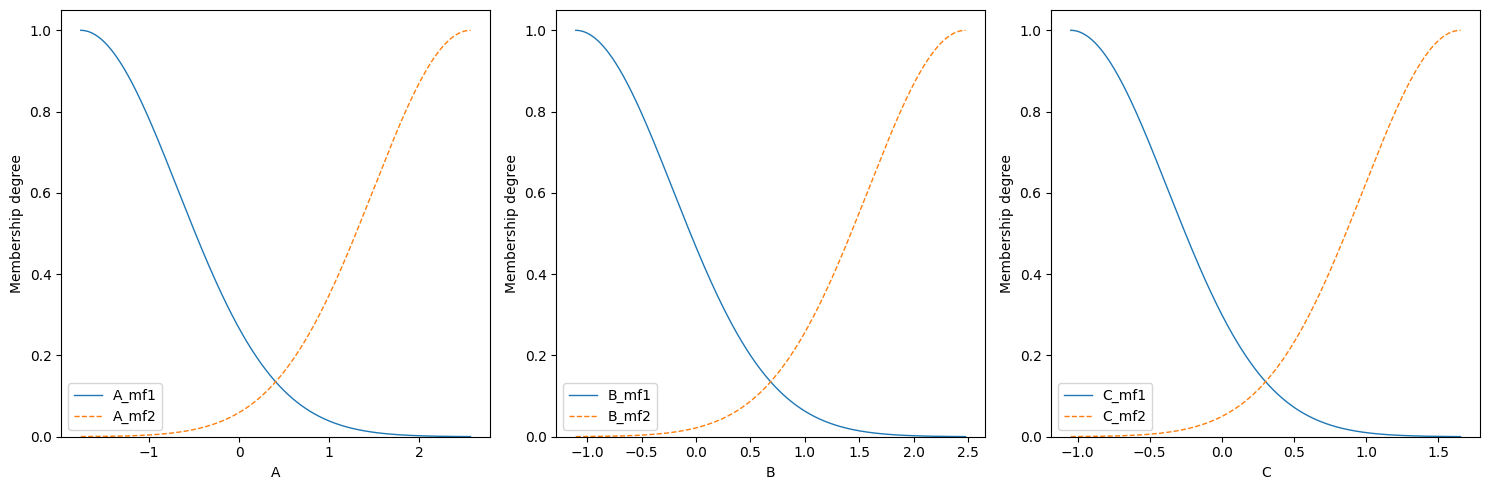

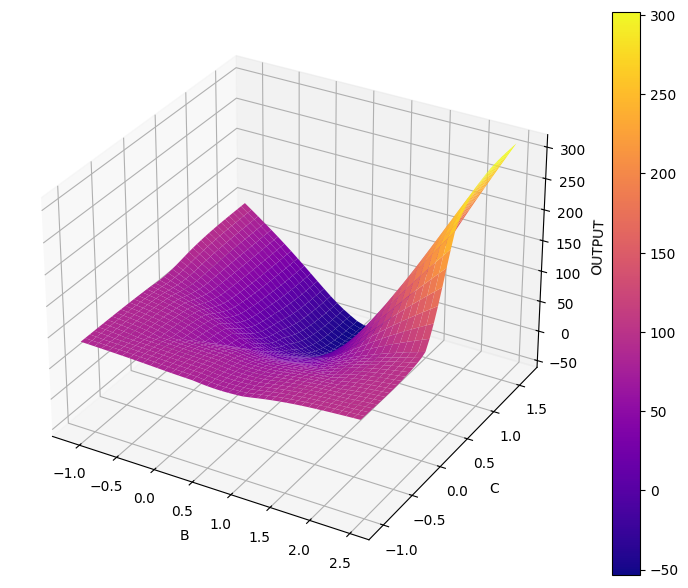

In [65]:
from simpful import *

FS = FuzzySystem(show_banner=False)

"""
please note I renumberd the updated rule base manually
Updated Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule5: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule6: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule7: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule8: If A is A_mf2 and B is B_mf2 and C is C_mf2
"""

RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
RULE3 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun3)" 
RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun4)" 
RULE5 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun5)" 
RULE6 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun6)" 
RULE7 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
RULE8 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 


FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8])

FS.set_output_function('fun1', '102.525702 + 15.854555 * A + 0.227456 * B - 0.984400 * C')
FS.set_output_function('fun2', '91.504183 + 0.841760 * A - 3.860232 * B - 4.456657 * C')
FS.set_output_function('fun3', '-26.745775 + 31.742511 * A - 0.305310 * B - 130.686423 * C')
FS.set_output_function('fun4', '-162.459050 + 9.714747 * A - 8.540544 * B + 355.567751 * C')
FS.set_output_function('fun5', '4.470945 + 128.787800 * A + 0.928448 * B - 14.194645 * C')
FS.set_output_function('fun6', '42.998949 - 8.265058 * A - 3.093415 * B + 65.390637 * C')
FS.set_output_function('fun7', '18.047934 + 19.544067 * A + 0.597904 * B - 27.971311 * C')
FS.set_output_function('fun8', '-70.342889 + 192.333978 * A + 21.316356 * B - 44.948802 * C')


FS_1 = FuzzySet(function=Gaussian_MF(-1.761, 1.083), term='A_mf1')
FS_2 = FuzzySet(function=Gaussian_MF(2.573, 1.083), term='A_mf2')
MF_A = LinguisticVariable([FS_1, FS_2], concept='A', universe_of_discourse=[-1.76073, 2.572580])
FS.add_linguistic_variable('A', MF_A)

FS_11 = FuzzySet(function=Gaussian_MF(-1.105, 0.895), term='B_mf1')
FS_12 = FuzzySet(function=Gaussian_MF(2.476, 0.895), term='B_mf2')
MF_B = LinguisticVariable([FS_11, FS_12], concept='B', universe_of_discourse=[-1.10461, 2.475554])
FS.add_linguistic_variable('B', MF_B)

FS_21 = FuzzySet(function=Gaussian_MF(-1.047, 0.675), term='C_mf1')
FS_22 = FuzzySet(function=Gaussian_MF(1.653, 0.675), term='C_mf2')
MF_C = LinguisticVariable([FS_21, FS_22], concept='C', universe_of_discourse=[-1.04667, 1.653293])
FS.add_linguistic_variable('C', MF_C)


# end of automatically generated code #

# here is the model visualization
# Set antecedents values
FS.set_variable("A", 0.0)
FS.set_variable("B", 0.0)
FS.set_variable("C", 0.0)
# Plot all linguistic variables and save them in a output file
FS.produce_figure(outputfile='lvs.pdf')

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["OUTPUT"]))

fig = FS.plot_surface(variables=['B','C'], output='OUTPUT')

In [46]:

# Assuming X_train is your dataframe
# Extract the relevant columns: A, B, and C
features = X_train[['A', 'B', 'C']]

# Calculate the minimum and maximum for each feature
min_values = features.min()
max_values = features.max()

# Print the results
print("Minimum values for each feature:")
print(min_values)
print("\nMaximum values for each feature:")
print(max_values)


Minimum values for each feature:
A   -1.76073
B   -1.10461
C   -1.04667
dtype: float64

Maximum values for each feature:
A    2.572580
B    2.475554
C    1.653293
dtype: float64


# Step 7:
# Check performance

recall from earlier that {'dw_mw': 'A', 'delta_p': 'B', 'v': 'C', 'fx': 'Y'})

In [66]:
from sklearn.metrics import mean_absolute_error

# Initialize a list to store the predicted outputs
predicted_outputs = []

# Iterate through all samples in the test dataset
for index, sample in X_test.iterrows():
    # Set the variables for the current sample
    FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
    FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
    FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column
    
    # Perform Sugeno inference and get the predicted output
    predicted_output = FS.Sugeno_inference(["OUTPUT"])
    
    # Append the predicted output to the list
    predicted_outputs.append(predicted_output)

# Extract the predicted output values from the dictionaries
predicted_values = [output['OUTPUT'] for output in predicted_outputs]

# Calculate the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error (MAE):", MAE)

Mean Absolute Error (MAE): 88.57579470102321


# Step 8:
# Grid Search
the pursuit of the perfect regularization parameter alpha


Consequents with L2 regularization:
Consequents:
  Rule  Intercept  Weight for A  Weight for B  Weight for C
Rule 1   3.632145      1.439352     -0.169038     -1.301015
Rule 2   5.331906      1.542367     -1.657749     -1.597080
Rule 3   2.637751     -0.909475     -1.153176     -3.713296
Rule 4   3.841029     -0.896547     -1.891679      7.265543
Rule 5  -6.039081     -6.041597      1.380656     -9.541860
Rule 6 -11.010450     -0.618941     -2.687476     20.213611
Rule 7   0.495681      0.228584      1.541268     -0.488693
Rule 8   1.111020      2.772109      0.591560      1.098870
 * Detected Sugeno model type
{'OUTPUT': 0.9790008746722796}
Consequents with L2 regularization:
Consequents:
  Rule  Intercept  Weight for A  Weight for B  Weight for C
Rule 1  -1.104467     -0.078851      0.362792     -1.310905
Rule 2   0.687937      1.425874     -0.927792     -0.736084
Rule 3   0.242935     -0.646293      0.232469     -0.216086
Rule 4   0.824389     -1.537702     -0.280407      0.732169
R

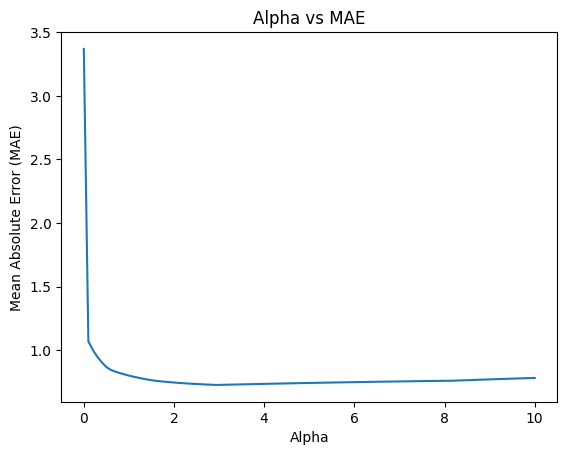

Optimal Alpha: 2.93
Minimum MAE: 0.7257696971140256


In [69]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from simpful import *

# Define the range of alpha values for grid search
alpha_values = np.linspace(0.001, 10, num=100)

# Initialize lists to store alpha values and corresponding MAE
alpha_list = []
mae_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Define the Ridge regression model with L2 regularization
    ridge_model = Ridge(alpha=alpha, solver='lsqr')
    
    # Fit the model to the design matrix and y_train
    ridge_model.fit(design_matrix, y_train)

    # Get the coefficients (consequents) from the trained model
    consequents_regularized = ridge_model.coef_

    
    # Display the consequents with L2 regularization
    print("Consequents with L2 regularization:")

    # Number of rules and features
    num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
    num_features = X_train.shape[1]

    # Prepare data for tabular display
    table_data = []

    for rule_index in range(num_rules):
        intercept = consequents_regularized[rule_index * (num_features + 1)]
        weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
        row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
        table_data.append(row)

    # Create a DataFrame for better visualization
    column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
    df = pd.DataFrame(table_data, columns=column_names)

    # Display the consequents in a tabular format
    print("Consequents:")
    print(df.to_string(index=False))
    
    FS = FuzzySystem(show_banner=False)
    
    RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
    RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
    RULE3 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun3)" 
    RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun4)" 
    RULE5 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun5)" 
    RULE6 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun6)" 
    RULE7 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
    RULE8 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 


    FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8])
    # Extract the consequents obtained from the Ridge regression model
    consequents = df.iloc[:, 1:].values  # Assuming 'df' contains the DataFrame with consequents

    # Define a list of rule names corresponding to the rules in your Fuzzy System
    rule_names = ['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7', 'fun8']

    # Iterate through each rule and set the output function using the corresponding coefficients
    for rule_index, rule_name in enumerate(rule_names):
        # Extract the coefficients for the current rule
        coefficients = consequents[rule_index]
        
        # Construct the output function string
        output_function = f"{coefficients[0]}"
        for feature_index, coefficient in enumerate(coefficients[1:]):
            output_function += f" + {coefficient} * {'ABC'[feature_index]}"
        
        # Set the output function for the current rule
        FS.set_output_function(rule_name, output_function)



    
    FS_1 = FuzzySet(function=Gaussian_MF(-1.761, 1.083), term='A_mf1')
    FS_2 = FuzzySet(function=Gaussian_MF(2.573, 1.083), term='A_mf2')
    MF_A = LinguisticVariable([FS_1, FS_2], concept='A', universe_of_discourse=[-1.76073, 2.572580])
    FS.add_linguistic_variable('A', MF_A)

    FS_11 = FuzzySet(function=Gaussian_MF(-1.105, 0.895), term='B_mf1')
    FS_12 = FuzzySet(function=Gaussian_MF(2.476, 0.895), term='B_mf2')
    MF_B = LinguisticVariable([FS_11, FS_12], concept='B', universe_of_discourse=[-1.10461, 2.475554])
    FS.add_linguistic_variable('B', MF_B)

    FS_21 = FuzzySet(function=Gaussian_MF(-1.047, 0.675), term='C_mf1')
    FS_22 = FuzzySet(function=Gaussian_MF(1.653, 0.675), term='C_mf2')
    MF_C = LinguisticVariable([FS_21, FS_22], concept='C', universe_of_discourse=[-1.04667, 1.653293])
    FS.add_linguistic_variable('C', MF_C)





    # here you input value to the model and it makes predictions
    # Set antecedents values
    FS.set_variable("A", 0.0)
    FS.set_variable("B", 0.0)
    FS.set_variable("C", 0.0)
    print(FS.Sugeno_inference(["OUTPUT"]))

    # Initialize a list to store the predicted outputs
    predicted_outputs = []
    
    # Iterate through all samples in the test dataset
    for index, sample in X_test.iterrows():
        # Set the variables for the current sample
        FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
        FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
        FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column

        # Perform Sugeno inference and get the predicted output
        predicted_output = FS.Sugeno_inference(["OUTPUT"])

        # Append the predicted output to the list
        predicted_outputs.append(predicted_output)

    # Extract the predicted output values from the dictionaries
    predicted_values = [output['OUTPUT'] for output in predicted_outputs]

    # Calculate the Mean Absolute Error (MAE) for the current alpha value
    MAE = mean_absolute_error(y_test, predicted_values)
    
    # Append alpha and MAE to the lists
    alpha_list.append(alpha)
    mae_list.append(MAE)

# Plot Alpha versus MAE
plt.plot(alpha_list, mae_list)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Alpha vs MAE')
plt.show()

# Find the alpha value with the minimum MAE
min_mae_index = np.argmin(mae_list)
optimal_alpha = alpha_list[min_mae_index]
min_mae = mae_list[min_mae_index]

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Minimum MAE: {min_mae}")







# Test this claimed Alpha

In [70]:
# perform linear least squares with l2 regularization
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


# Define the regularization strength (alpha)
alpha = 2.93  # You can adjust the value of alpha as needed

# Define the Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=alpha, solver='lsqr') # solver least squares with QR decomposition
# lsqr Find the least-squares solution to a large, sparse, linear system of equations.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html

# Fit the model to the design matrix and y_train
ridge_model.fit(design_matrix, y_train)

# Get the coefficients (consequents) from the trained model
consequents_regularized = ridge_model.coef_

# Display the consequents with L2 regularization
print("Consequents with L2 regularization:")

# Number of rules and features
num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
num_features = X_train.shape[1]

# Prepare data for tabular display
table_data = []

for rule_index in range(num_rules):
    intercept = consequents_regularized[rule_index * (num_features + 1)]
    weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
    row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
    table_data.append(row)

# Create a DataFrame for better visualization
column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
df = pd.DataFrame(table_data, columns=column_names)

# Display the consequents in a tabular format
print("Consequents:")
print(df.to_string(index=False))



# Here is the model 
from simpful import *



FS = FuzzySystem(show_banner=False)

RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
RULE3 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun3)" 
RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun4)" 
RULE5 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun5)" 
RULE6 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun6)" 
RULE7 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
RULE8 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 




FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8])
# Extract the consequents obtained from the Ridge regression model
consequents = df.iloc[:, 1:].values  # Assuming 'df' contains the DataFrame with consequents

# Define a list of rule names corresponding to the rules in your Fuzzy System
rule_names = ['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7', 'fun8' ]

# Iterate through each rule and set the output function using the corresponding coefficients
for rule_index, rule_name in enumerate(rule_names):
    # Extract the coefficients for the current rule
    coefficients = consequents[rule_index]
        
    # Construct the output function string
    output_function = f"{coefficients[0]}"
    for feature_index, coefficient in enumerate(coefficients[1:]):
        output_function += f" + {coefficient} * {'ABC'[feature_index]}"
        
    # Set the output function for the current rule
    FS.set_output_function(rule_name, output_function)




    
FS_1 = FuzzySet(function=Gaussian_MF(-1.761, 1.083), term='A_mf1')
FS_2 = FuzzySet(function=Gaussian_MF(2.573, 1.083), term='A_mf2')
MF_A = LinguisticVariable([FS_1, FS_2], concept='A', universe_of_discourse=[-1.76073, 2.572580])
FS.add_linguistic_variable('A', MF_A)

FS_11 = FuzzySet(function=Gaussian_MF(-1.105, 0.895), term='B_mf1')
FS_12 = FuzzySet(function=Gaussian_MF(2.476, 0.895), term='B_mf2')
MF_B = LinguisticVariable([FS_11, FS_12], concept='B', universe_of_discourse=[-1.10461, 2.475554])
FS.add_linguistic_variable('B', MF_B)

FS_21 = FuzzySet(function=Gaussian_MF(-1.047, 0.675), term='C_mf1')
FS_22 = FuzzySet(function=Gaussian_MF(1.653, 0.675), term='C_mf2')
MF_C = LinguisticVariable([FS_21, FS_22], concept='C', universe_of_discourse=[-1.04667, 1.653293])
FS.add_linguistic_variable('C', MF_C)




# here you input value to the model and it makes predictions
# Set antecedents values
FS.set_variable("A", 0.0)
FS.set_variable("B", 0.0)
FS.set_variable("C", 0.0)
print(FS.Sugeno_inference(["OUTPUT"]))


# here you check the error of the predictions in terms of MAE
# Initialize a list to store the predicted outputs
predicted_outputs = []

# Iterate through all samples in the test dataset
for index, sample in X_test.iterrows():
    # Set the variables for the current sample
    FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
    FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
    FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column
    
    # Perform Sugeno inference and get the predicted output
    predicted_output = FS.Sugeno_inference(["OUTPUT"])
    
    # Append the predicted output to the list
    predicted_outputs.append(predicted_output)

# Extract the predicted output values from the dictionaries
predicted_values = [output['OUTPUT'] for output in predicted_outputs]

# Calculate the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error (MAE):", MAE)



Consequents with L2 regularization:
Consequents:
  Rule  Intercept  Weight for A  Weight for B  Weight for C
Rule 1  -0.226330     -0.185023      0.294773     -0.151342
Rule 2   0.097316      0.487380     -0.130958     -0.071477
Rule 3   0.166971     -0.255653      0.106430     -0.158081
Rule 4   0.226034     -0.247439      0.338316      0.189051
Rule 5  -0.326932     -0.169745      0.160523      0.329648
Rule 6   0.247200     -0.470550     -0.268888      0.238250
Rule 7  -0.158930     -0.071808     -0.228122      0.164218
Rule 8  -0.025328     -0.031593     -0.012719     -0.020957
 * Detected Sugeno model type
{'OUTPUT': -0.11319342818343328}
Mean Absolute Error (MAE): 0.7257696971140256


# Model 4

Membrane Type 1 = TFC (Thin-film composite)

Membrane Orientation 1 = AL-DS (active layer facing feed solution)

## Estimating the consequents of First Order takagi sugeno

General formula 

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + \sum_{k=1}^{n} a_{ik} x_k \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$



for our case

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + w_{Ai} A_i + w_{Bi} B_i + w_{Ci} C_i \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$


# Step 0
# Preparing the data


In [2]:

path = 'subset_11.csv'
df = pd.read_csv(path)
df.head()

Membrane Type  Membrane Orientation  DS Molecular Weight (g/mol)  \
0              1                     1                       58.440   
1              1                     1                       58.440   
2              1                     1                       84.995   
3              1                     1                       80.043   
4              1                     1                       74.551   

   Delta_P (bar)  Velocity Mean (cm/s)  Membrane Flux (LMH)  
0       48.72297                 25.00                49.00  
1       24.77721                 19.65                17.00  
2       24.77721                 19.65                14.25  
3       24.77721                 19.65                12.00  
4       24.77721                 19.65                16.30

In [3]:
# Remove first two columns of the dataset
df = df.drop(columns=['Membrane Type', 'Membrane Orientation'])


# Rename columns
df = df.rename(columns={'DS Molecular Weight (g/mol)': 'dw_mw',
                        'Delta_P (bar)': 'delta_p',
                        'Velocity Mean (cm/s)': 'v',
                        'Membrane Flux (LMH)': 'fx'})

df.head()


dw_mw   delta_p      v     fx
0  58.440  48.72297  25.00  49.00
1  58.440  24.77721  19.65  17.00
2  84.995  24.77721  19.65  14.25
3  80.043  24.77721  19.65  12.00
4  74.551  24.77721  19.65  16.30

In [4]:

# Assuming df is your DataFrame containing the data

# Print feature names before changes
print("Feature names before changes:")
print(df.columns.tolist())

# Change feature names
df = df.rename(columns={'dw_mw': 'A', 'delta_p': 'B', 'v': 'C', 'fx': 'Y'})

# Print feature names after changes
print("\nFeature names after changes:")
print(df.columns.tolist())


Feature names before changes:
['dw_mw', 'delta_p', 'v', 'fx']

Feature names after changes:
['A', 'B', 'C', 'Y']


In [5]:
df.head()

A         B      C      Y
0  58.440  48.72297  25.00  49.00
1  58.440  24.77721  19.65  17.00
2  84.995  24.77721  19.65  14.25
3  80.043  24.77721  19.65  12.00
4  74.551  24.77721  19.65  16.30

In [6]:

# perform z score normalization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the entire DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Now df_normalized contains z-score normalized values for all columns in df
df_normalized.head()

A         B         C         Y
0 -0.184796  0.694500  1.268340  1.895590
1 -0.184796 -0.204998  0.307636 -0.689117
2  4.079737 -0.204998  0.307636 -0.911240
3  3.284483 -0.204998  0.307636 -1.092978
4  2.402509 -0.204998  0.307636 -0.745658

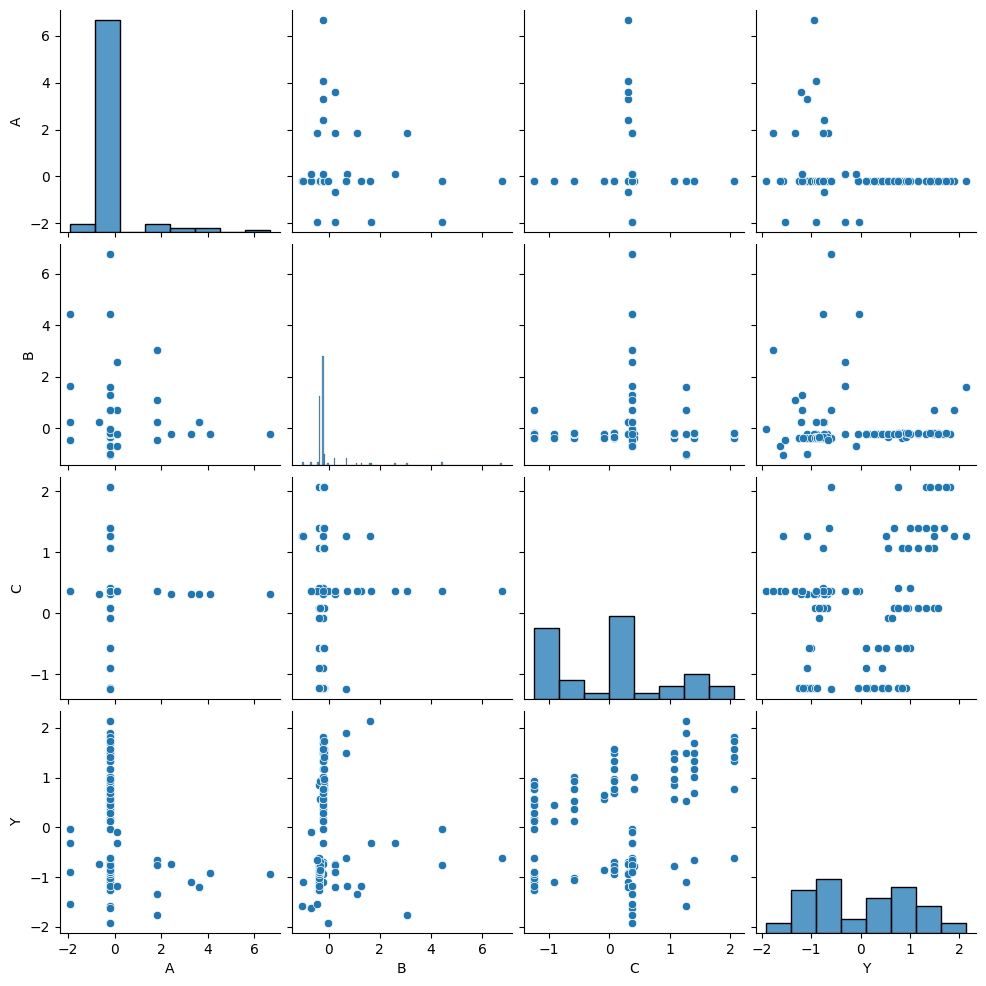

In [7]:

# Assuming df_normalized is your DataFrame
# Create a seaborn pairplot
sns.pairplot(df_normalized)


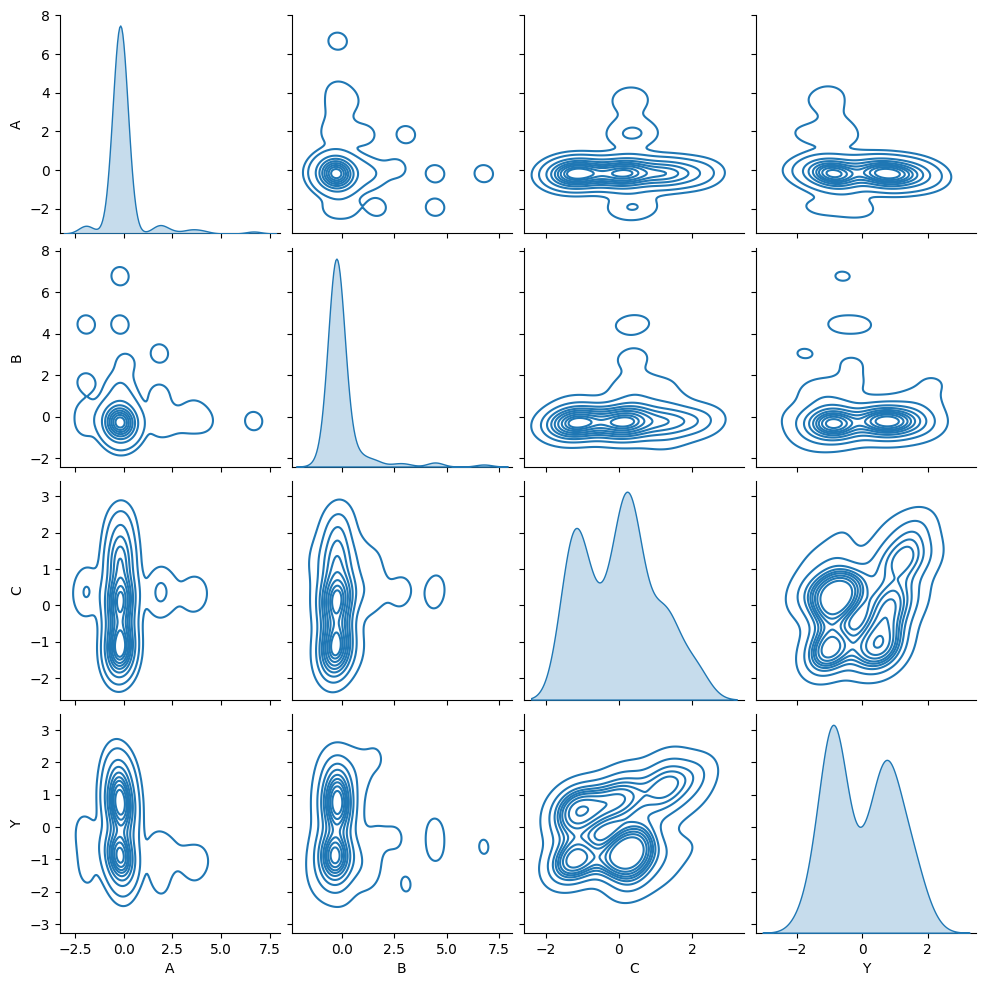

In [8]:
# make it curvy
g = sns.pairplot(df_normalized, diag_kind="kde", kind="kde")
plt.show()

In [9]:

# Assuming df_normalized is your dataframe
# Extract the first three columns: A, B, and C
features = df_normalized[['A', 'B', 'C']]

# Calculate the minimum and maximum for each feature
min_values = features.min()
max_values = features.max()

# Print the results
print("Minimum values for each feature:")
print(min_values)
print("\nMaximum values for each feature:")
print(max_values)


Minimum values for each feature:
A   -1.924816
B   -1.044218
C   -1.245653
dtype: float64

Maximum values for each feature:
A    6.666560
B    6.775483
C    2.067431
dtype: float64


In [10]:
# Split data into training and testing


from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with features (X) and target variable (y)

# Split the data into features (X) and target variable (y)
X = df_normalized.drop(columns=['Y'])  
y = df_normalized['Y']

# Split the features (X) and target variable (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Adjust the test_size parameter to set the proportion of the dataset to include in the test split



In [11]:
# Resetting the indexes
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.head()

A         B         C
0 -0.184796 -0.378014  2.067431
1  0.095116 -0.670364  0.370486
2 -0.184796 -0.183136  1.076199
3 -0.184796 -0.220615  2.067431
4 -0.184796 -0.220615  1.076199

# Step 1
# Rules Generator

we need to create a function that generates all possible rules

max number of rules
$$ m^n $$

 m: number of sets per variable, n: number of input variables

In [12]:
import itertools

def generate_rule_base(num_input_variables, num_sets_per_variable):
    """
    Generate a rule base with all possible rules based on the specified number of input variables and sets per variable.

    Parameters:
    num_input_variables : int
        Number of input variables
    num_sets_per_variable : int
        Number of sets per input variable

    Returns:
    tuple
        A tuple containing the rule base (list of strings representing each rule) and the list of membership function names
    """
    # Define alphabet for variable names
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Generate input variable names
    input_variable_names = alphabet[:num_input_variables]

    # Generate fuzzy set names for each variable
    fuzzy_set_names = [[f"{var}_mf{i+1}" for i in range(num_sets_per_variable)] for var in input_variable_names]

    # Generate all possible combinations of fuzzy set names
    rule_combinations = itertools.product(*fuzzy_set_names)

    # Generate human-readable rules
    rule_base = []
    for i, rule in enumerate(rule_combinations, start=1):
        rule_str = f"Rule{i}: If "
        for j, variable in enumerate(input_variable_names):
            rule_str += f"{variable} is {rule[j]}"
            if j < num_input_variables - 1:
                rule_str += " and "
        rule_base.append(rule_str)

    # Flatten the list of fuzzy set names
    membership_function_names = [item for sublist in fuzzy_set_names for item in sublist]

    return rule_base, membership_function_names

# Example usage
num_input_variables = 3
num_sets_per_variable = 3
rule_base, membership_function_names = generate_rule_base(num_input_variables, num_sets_per_variable)

print("Rule base:")
for rule in rule_base:
    print(rule)

print("\nMembership functions:")
print(membership_function_names)


Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3
Rule7: If A is A_mf1 and B is B_mf3 and C is C_mf1
Rule8: If A is A_mf1 and B is B_mf3 and C is C_mf2
Rule9: If A is A_mf1 and B is B_mf3 and C is C_mf3
Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3
Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2
Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3
Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1
Rule17: If A is A_mf2 and B is B_mf3 and C is C_mf2
Rule18: If A is A_mf2 and B is B_mf3 and C is C_mf3
Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1
Rule20: If

# Step 2
# Parameters setting of the gaussian membership functions


Membership function partitions for A:
A_mf1: Mean=-1.925, Std Dev=1.074
A_mf2: Mean=2.371, Std Dev=1.074
A_mf3: Mean=6.667, Std Dev=1.074

Membership function partitions for B:
B_mf1: Mean=-1.044, Std Dev=0.977
B_mf2: Mean=2.866, Std Dev=0.977
B_mf3: Mean=6.775, Std Dev=0.977

Membership function partitions for C:
C_mf1: Mean=-1.246, Std Dev=0.414
C_mf2: Mean=0.411, Std Dev=0.414
C_mf3: Mean=2.067, Std Dev=0.414


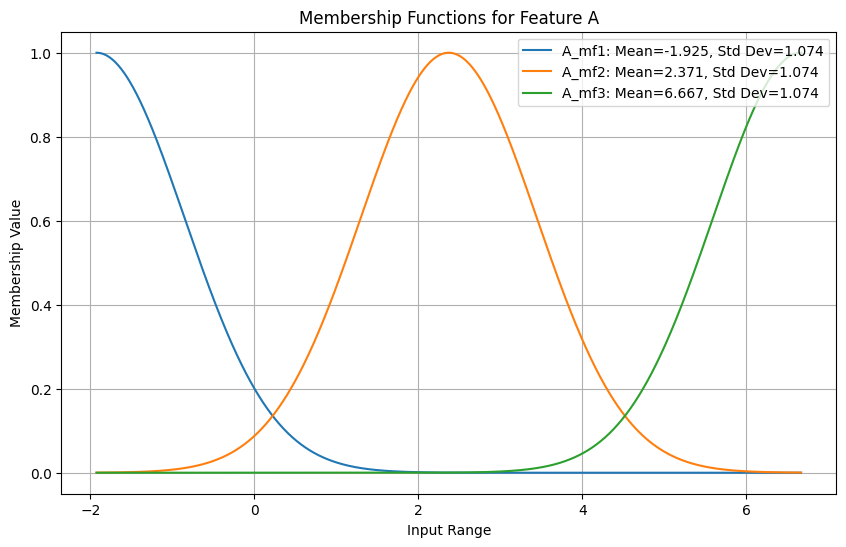

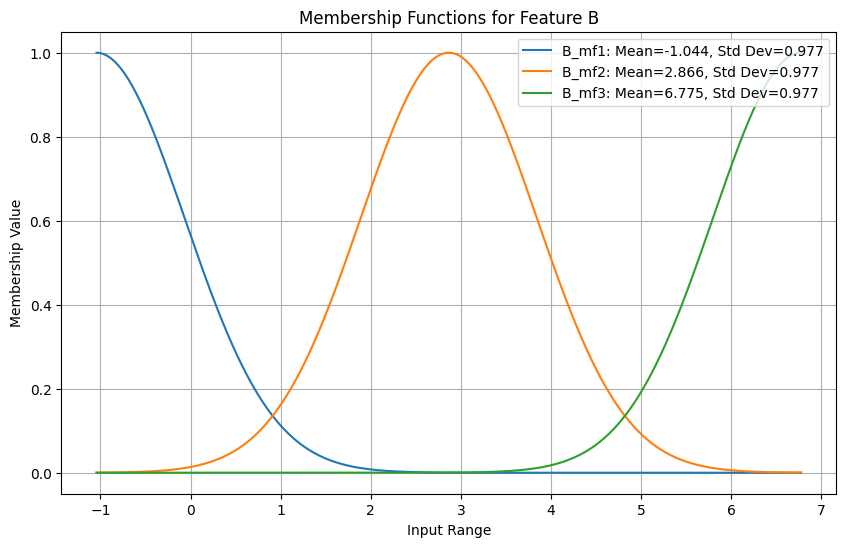

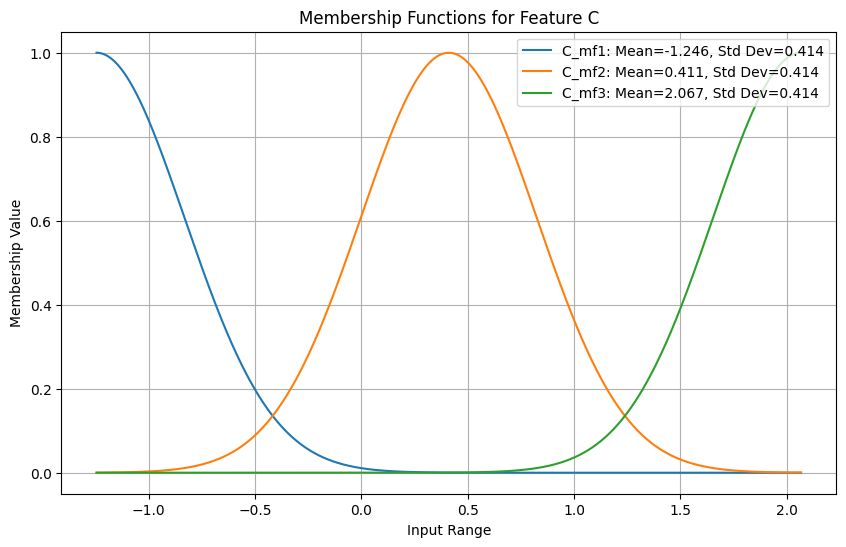

In [13]:


def perform_partitioning_and_plot(X, num_membership_functions):
    """
    Perform grid partitioning and plot membership functions for each feature in the DataFrame.

    Parameters:
    X : pandas.DataFrame
        DataFrame containing the features
    num_membership_functions : int
        Number of membership functions
    """
    membership_function_details = []
    
    for feature in X.columns:
        # Calculate the input range for the current feature
        input_range = (X[feature].min(), X[feature].max())

        # Calculate the width of each partition
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)

        # Calculate mean and standard deviation for each partition
        membership_functions = []
        for i in range(num_membership_functions):
            mean = input_range[0] + i * partition_width
            std_dev = partition_width / 4  # Assuming a standard deviation of one-fourth of the partition width
            membership_functions.append((mean, std_dev))

        # Collect the calculated means and standard deviations
        details = f"\nMembership function partitions for {feature}:"
        for i, (mean, std_dev) in enumerate(membership_functions):
            details += f"\n{feature}_mf{i+1}: Mean={mean:.3f}, Std Dev={std_dev:.3f}"
        
        membership_function_details.append(details)
    
    # Print all membership function details together
    for detail in membership_function_details:
        print(detail)

    # Plot Gaussian membership functions based on their mean and standard deviation
    for feature in X.columns:
        input_range = (X[feature].min(), X[feature].max())
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)
        membership_functions = [(input_range[0] + i * partition_width, partition_width / 4) for i in range(num_membership_functions)]
        
        x = np.linspace(input_range[0], input_range[1], 1000)
        plt.figure(figsize=(10, 6))
        for i, (mean, std_dev) in enumerate(membership_functions):
            y = np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
            plt.plot(x, y, label=f'{feature}_mf{i+1}: Mean={mean:.3f}, Std Dev={std_dev:.3f}')
        plt.xlabel('Input Range')
        plt.ylabel('Membership Value')
        plt.title(f'Membership Functions for Feature {feature}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
num_membership_functions = 3
perform_partitioning_and_plot(X_train, num_membership_functions)


# Step 3: calculate membership values per data row

In [14]:


def calculate_membership_values(X, num_membership_functions):
    """
    Calculate the membership values for each feature value in the DataFrame using Gaussian membership functions.

    Parameters:
    X : pandas.DataFrame
        DataFrame containing the features
    num_membership_functions : int
        Number of membership functions
    """
    membership_values = {}

    for feature in X.columns: #his loops over each column
        # Calculate the input range for the current feature
        input_range = (X[feature].min(), X[feature].max())

        # Calculate the width of each partition
        partition_width = (input_range[1] - input_range[0]) / (num_membership_functions - 1)

        # Calculate mean and standard deviation for each partition
        membership_functions = [(input_range[0] + i * partition_width, partition_width / 4) for i in range(num_membership_functions)]

        # Calculate membership values for each feature value in the DataFrame
        membership_values[feature] = {}
        for i, (mean, std_dev) in enumerate(membership_functions):
            mf_label = f'{feature}_mf{i+1}'
            membership_values[feature][mf_label] = np.exp(-0.5 * ((X[feature] - mean) / std_dev) ** 2)
    
    # Convert the membership values to a DataFrame for better readability
    membership_values_df = pd.DataFrame()
    for feature in membership_values:
        for mf_label in membership_values[feature]:
            membership_values_df[mf_label] = membership_values[feature][mf_label]
    
    return membership_values_df

num_membership_functions = 3
# we already have values of x_train
membership_values_df = calculate_membership_values(X_train, num_membership_functions)

membership_values_df.head()


A_mf1     A_mf2         A_mf3     B_mf1     B_mf2         B_mf3  \
0  0.269119  0.058918  1.451569e-09  0.792736  0.004062  2.342618e-12   
1  0.170524  0.105895  7.400363e-09  0.929468  0.001440  2.509929e-13   
2  0.269119  0.058918  1.451569e-09  0.678396  0.007717  9.879743e-12   
3  0.269119  0.058918  1.451569e-09  0.701186  0.006842  7.514116e-12   
4  0.269119  0.058918  1.451569e-09  0.701186  0.006842  7.514116e-12   

          C_mf1     C_mf2     C_mf3  
0  1.266417e-14  0.000335  1.000000  
1  4.932398e-04  0.995252  0.000226  
2  1.494291e-07  0.275153  0.057017  
3  1.266417e-14  0.000335  1.000000  
4  1.494291e-07  0.275153  0.057017

In [15]:
membership_values_df.shape

(98, 9)

# Step 3.1:
# Calculate Firing Strengths and Omit redundant rules

here we calculate the firing strength of each rule across all training data (defined for each rule as the product T-norm of its fuzzy sets), then we get 27 values, each value represents the sum of firing strength per rule

In [16]:

# Assuming membership_values_df is already defined with shape (312, 9)
# Here is a sample definition to illustrate:
# membership_values_df = pd.DataFrame({
#     'A_mf1': [...],
#     'A_mf2': [...],
#     'A_mf3': [...],
#     'B_mf1': [...],
#     'B_mf2': [...],
#     'B_mf3': [...],
#     'C_mf1': [...],
#     'C_mf2': [...],
#     'C_mf3': [...]
# })

# Define rule combinations
rule_combinations = [
    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'),
    ('A_mf1', 'B_mf3', 'C_mf1'), ('A_mf1', 'B_mf3', 'C_mf2'), ('A_mf1', 'B_mf3', 'C_mf3'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'),
    ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf2', 'B_mf3', 'C_mf2'), ('A_mf2', 'B_mf3', 'C_mf3'),
    ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'),
    ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf2', 'C_mf2'), ('A_mf3', 'B_mf2', 'C_mf3'),
    ('A_mf3', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf2'), ('A_mf3', 'B_mf3', 'C_mf3')
]

# Initialize an empty dataframe to store firing strengths
df_fire = pd.DataFrame(index=membership_values_df.index)

# Calculate firing strengths for each rule combination
for i, rule in enumerate(rule_combinations):
    rule_name = f'Rule_{i+1}'
    df_fire[rule_name] = (
        membership_values_df[rule[0]] * 
        membership_values_df[rule[1]] * 
        membership_values_df[rule[2]]
    )

# Display the resulting dataframe
df_fire.head()


Rule_1    Rule_2    Rule_3        Rule_4        Rule_5        Rule_6  \
0  2.701780e-15  0.000072  0.213341  1.384497e-17  3.667412e-07  1.093240e-03   
1  7.817684e-05  0.157744  0.000036  1.211010e-07  2.443558e-04  5.548633e-08   
2  2.728117e-08  0.050235  0.010409  3.103488e-10  5.714646e-04  1.184178e-04   
3  2.389762e-15  0.000063  0.188703  2.332023e-17  6.177324e-07  1.841434e-03   
4  2.819767e-08  0.051922  0.010759  2.751638e-10  5.066763e-04  1.049925e-04   

         Rule_7        Rule_8        Rule_9       Rule_10  ...       Rule_18  \
0  7.984039e-27  2.114902e-16  6.304434e-13  5.914966e-16  ...  1.380220e-13   
1  2.111083e-17  4.259713e-14  9.672611e-18  4.854758e-05  ...  6.006662e-18   
2  3.973063e-19  7.315848e-13  1.515976e-13  5.972625e-09  ...  3.318903e-14   
3  2.560938e-26  6.783701e-16  2.022193e-12  5.231871e-16  ...  4.427156e-13   
4  3.021744e-19  5.564126e-13  1.152987e-13  6.173275e-09  ...  2.524218e-14   

        Rule_19       Rule_20       Rule_21       Rule_22       Rule_23  \
0  1.457279e-23  3.860205e-13  1.150711e-09  7.467669e-26  1.978120e-15   
1  3.392700e-12  6.845742e-09  1.554475e-12  5.255510e-15  1.060449e-11   
2  1.471485e-16  2.709537e-10  5.614650e-11  1.673952e-18  3.082352e-12   
3  1.288984e-23  3.414407e-13  1.017820e-09  1.257841e-25  3.331910e-15   
4  1.520919e-16  2.800564e-10  5.803273e-11  1.484172e-18  2.732899e-12   

        Rule_24       Rule_25       Rule_26       Rule_27  
0  5.896692e-12  4.306412e-35  1.140731e-24  3.400470e-21  
1  2.407982e-15  9.161626e-25  1.848620e-21  4.197696e-25  
2  6.387189e-13  2.142981e-27  3.946005e-21  8.176834e-22  
3  9.932284e-12  1.381313e-34  3.658976e-24  1.090725e-20  
4  5.663059e-13  1.629861e-27  3.001165e-21  6.218955e-22  

[5 rows x 27 columns]

In [17]:

# Assuming df is your dataframe
column_sums = df_fire.sum()

print(column_sums)


Rule_1     5.683526e+00
Rule_2     5.787953e+00
Rule_3     1.641729e+00
Rule_4     6.440237e-02
Rule_5     6.142612e-01
Rule_6     3.336432e-02
Rule_7     1.617614e-04
Rule_8     3.263977e-01
Rule_9     7.415175e-05
Rule_10    1.245542e+00
Rule_11    3.112774e+00
Rule_12    3.597551e-01
Rule_13    1.464609e-02
Rule_14    1.221769e+00
Rule_15    7.549365e-03
Rule_16    2.938433e-05
Rule_17    5.929081e-02
Rule_18    1.347116e-05
Rule_19    6.538986e-04
Rule_20    7.190234e-01
Rule_21    8.898969e-05
Rule_22    7.196380e-06
Rule_23    7.934904e-03
Rule_24    9.870953e-07
Rule_25    1.480704e-11
Rule_26    2.986703e-08
Rule_27    6.780873e-12
dtype: float64


In [ ]:
# Sort the column sums from highest values to lowest values
sorted_column_sums = column_sums.sort_values(ascending=False)

print(sorted_column_sums)

Rule_14    2.281276e+00
Rule_10    2.044075e+00
Rule_22    1.889621e+00
Rule_12    1.763597e+00
Rule_25    1.202906e+00
Rule_19    1.090766e+00
Rule_11    1.047917e+00
Rule_13    9.450512e-01
Rule_2     8.550583e-01
Rule_3     8.367493e-01
Rule_1     8.310259e-01
Rule_21    6.101142e-01
Rule_15    5.001597e-01
Rule_6     3.179422e-01
Rule_20    3.178958e-01
Rule_16    2.787234e-01
Rule_4     2.148870e-01
Rule_5     1.996159e-01
Rule_8     7.367386e-02
Rule_23    5.081459e-02
Rule_17    1.657432e-02
Rule_24    1.114801e-02
Rule_7     1.305239e-03
Rule_26    1.304088e-03
Rule_18    2.055694e-06
Rule_9     1.200794e-06
Rule_27    2.584215e-09
dtype: float64


lets investigate our rules

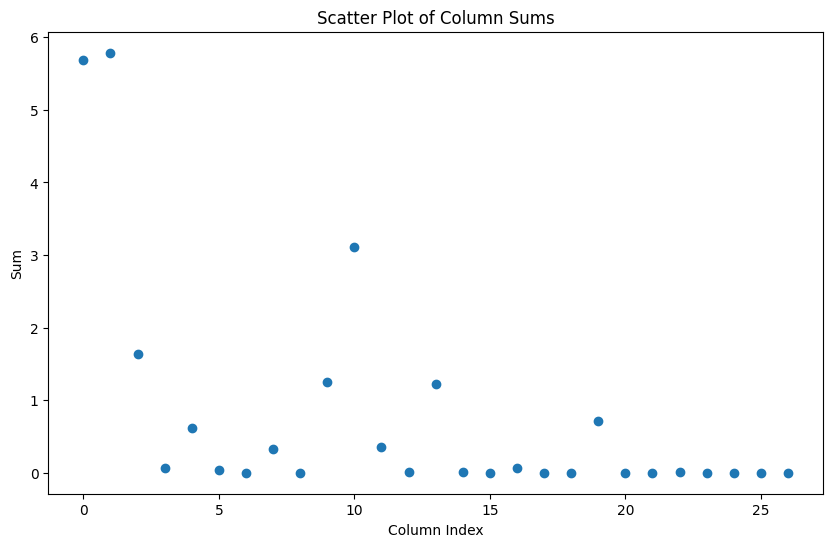

In [18]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(column_sums)), column_sums)
plt.title('Scatter Plot of Column Sums')
plt.xlabel('Column Index')
plt.ylabel('Sum')
plt.show()


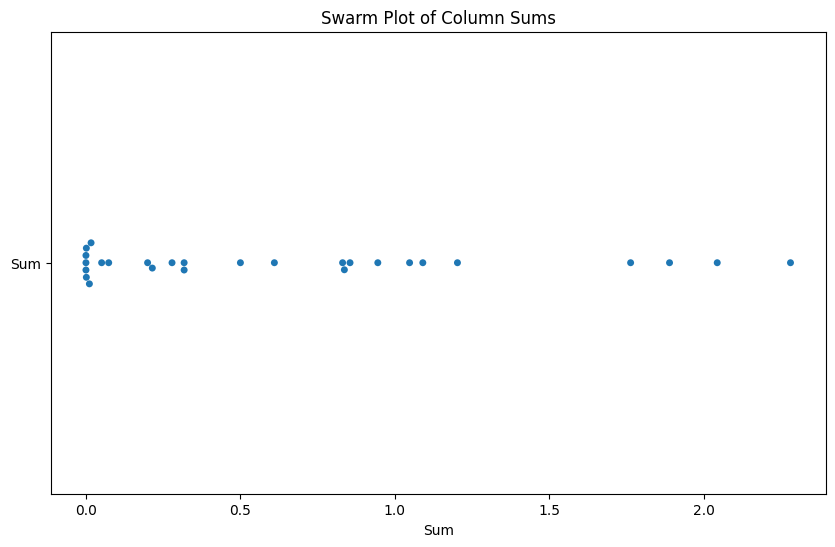

In [ ]:

# Assuming column_sums is already calculated
column_sums = df_fire.sum()

# Convert to DataFrame for easier plotting
column_sums_df = pd.DataFrame(column_sums, columns=['Sum'])

# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=column_sums_df, orient='h')
plt.title('Swarm Plot of Column Sums')
plt.xlabel('Sum')
plt.show()


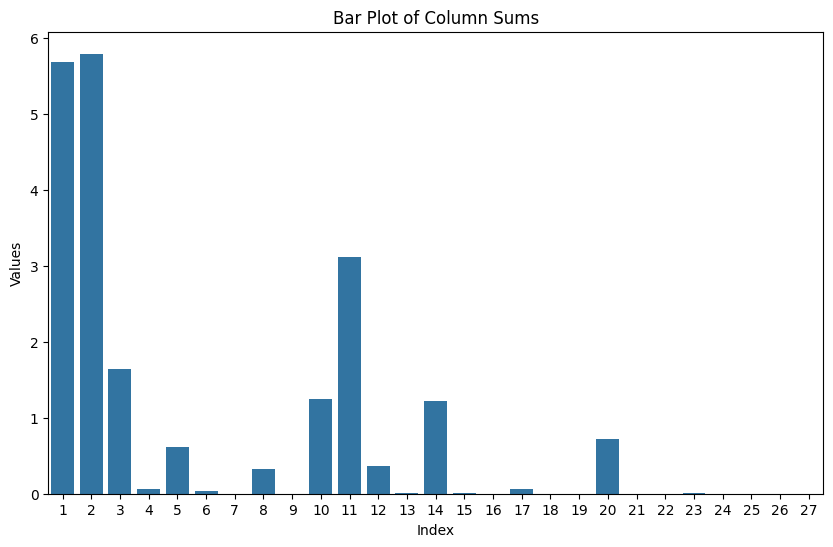

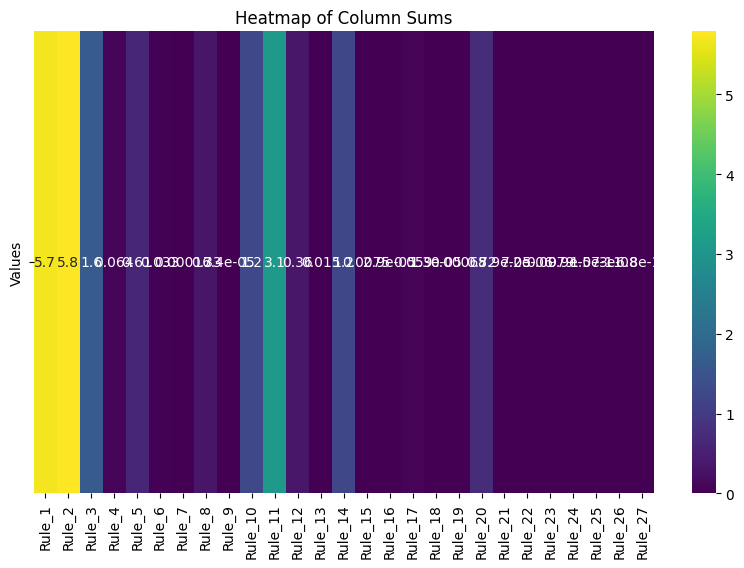

<Figure size 1200x1000 with 0 Axes>

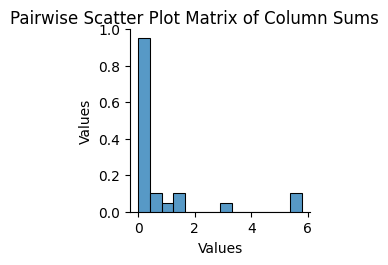

In [19]:


# Assuming column_sums contains your values
# column_sums = df_fire.sum()

# Create a DataFrame from column_sums
df = pd.DataFrame(column_sums, columns=['Values'])

# Generate Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index.map(lambda x: int(x.split('_')[1])), y='Values', data=df)
plt.title('Bar Plot of Column Sums')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

# Generate Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.transpose(), cmap='viridis', annot=True)
plt.title('Heatmap of Column Sums')
plt.show()

# Generate Scatter Plot Matrix
plt.figure(figsize=(12, 10))
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plot Matrix of Column Sums', y=1.02)
plt.show()


the following rules have low firing strenghts and will be removed before carrying out the least squares estimate, please note we removed anything < 10e-2

Rule_8     7.367386e-02

Rule_23    5.081459e-02

Rule_17    1.657432e-02

Rule_24    1.114801e-02

Rule_7     1.305239e-03

Rule_26    1.304088e-03

Rule_18    2.055694e-06

Rule_9     1.200794e-06

Rule_27    2.584215e-09

Remark: you could automate this by asking python to return rule lower than 10e-2


# Step 3.2:
# Update the rule base

In [20]:
import itertools

def generate_rule_base(num_input_variables, num_sets_per_variable):
    """
    Generate a rule base with all possible rules based on the specified number of input variables and sets per variable.

    Parameters:
    num_input_variables : int
        Number of input variables
    num_sets_per_variable : int
        Number of sets per input variable

    Returns:
    tuple
        A tuple containing the rule base (list of strings representing each rule) and the list of membership function names
    """
    # Define alphabet for variable names
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

    # Generate input variable names
    input_variable_names = alphabet[:num_input_variables]

    # Generate fuzzy set names for each variable
    fuzzy_set_names = [[f"{var}_mf{i+1}" for i in range(num_sets_per_variable)] for var in input_variable_names]

    # Generate all possible combinations of fuzzy set names
    rule_combinations = itertools.product(*fuzzy_set_names)

    # Generate human-readable rules
    rule_base = []
    for i, rule in enumerate(rule_combinations, start=1):
        rule_str = f"Rule{i}: If "
        for j, variable in enumerate(input_variable_names):
            rule_str += f"{variable} is {rule[j]}"
            if j < num_input_variables - 1:
                rule_str += " and "
        rule_base.append(rule_str)

    # Flatten the list of fuzzy set names
    membership_function_names = [item for sublist in fuzzy_set_names for item in sublist]

    return rule_base, membership_function_names

def remove_rules(rule_base):
    """
    Remove specified rules from the rule base.

    Parameters:
    rule_base : list of str
        List of rules in the rule base

    Returns:
    list of str
        Updated rule base with specified rules removed
    """
    print("Current Rule base:")
    for i, rule in enumerate(rule_base):
        print(f"{i+1}. {rule}")

    rules_to_remove = input("Enter the rule numbers to remove, separated by commas (e.g., 1,3,5): ")
    rules_to_remove = [int(r.strip()) for r in rules_to_remove.split(",")]

    updated_rule_base = [rule for i, rule in enumerate(rule_base) if (i+1) not in rules_to_remove]

    return updated_rule_base

# Example usage
num_input_variables = 3
num_sets_per_variable = 3
rule_base, membership_function_names = generate_rule_base(num_input_variables, num_sets_per_variable)

print("Rule base:")
for rule in rule_base:
    print(rule)

remove = input("Would you like to remove any rules? (yes/no): ").strip().lower()
if remove == "yes":
    rule_base = remove_rules(rule_base)

print("\nUpdated Rule base:")
for rule in rule_base:
    print(rule)


Rule base:
Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1
Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2
Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3
Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1
Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2
Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3
Rule7: If A is A_mf1 and B is B_mf3 and C is C_mf1
Rule8: If A is A_mf1 and B is B_mf3 and C is C_mf2
Rule9: If A is A_mf1 and B is B_mf3 and C is C_mf3
Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1
Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2
Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3
Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1
Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2
Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3
Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1
Rule17: If A is A_mf2 and B is B_mf3 and C is C_mf2
Rule18: If A is A_mf2 and B is B_mf3 and C is C_mf3
Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1
Rule20: If

In [21]:

# paste here all the unpdated rule combinations from before


rule_combinations = [
    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'),
    ('A_mf1', 'B_mf3', 'C_mf1'), ('A_mf1', 'B_mf3', 'C_mf2'), ('A_mf1', 'B_mf3', 'C_mf3'),
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'),
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'),
    ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf2', 'B_mf3', 'C_mf2'), ('A_mf2', 'B_mf3', 'C_mf3'),
    ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'),
    ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf2', 'C_mf2'), ('A_mf3', 'B_mf2', 'C_mf3'),
    ('A_mf3', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf2'), ('A_mf3', 'B_mf3', 'C_mf3')
]


# paste here the updated rules you got from upper cell
# chatgpt prompt put each row between these "" and finish each row with a comma except last row


updated_rules = [
    "Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1",
    "Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2",
    "Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3",
    "Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1",
    "Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2",
    "Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3",
    "Rule10: If A is A_mf2 and B is B_mf1 and C is C_mf1",
    "Rule11: If A is A_mf2 and B is B_mf1 and C is C_mf2",
    "Rule12: If A is A_mf2 and B is B_mf1 and C is C_mf3",
    "Rule13: If A is A_mf2 and B is B_mf2 and C is C_mf1",
    "Rule14: If A is A_mf2 and B is B_mf2 and C is C_mf2",
    "Rule15: If A is A_mf2 and B is B_mf2 and C is C_mf3",
    "Rule16: If A is A_mf2 and B is B_mf3 and C is C_mf1",
    "Rule19: If A is A_mf3 and B is B_mf1 and C is C_mf1",
    "Rule20: If A is A_mf3 and B is B_mf1 and C is C_mf2",
    "Rule21: If A is A_mf3 and B is B_mf1 and C is C_mf3",
    "Rule22: If A is A_mf3 and B is B_mf2 and C is C_mf1",
    "Rule25: If A is A_mf3 and B is B_mf3 and C is C_mf1"
]

# Extract rule combinations from updated rules
updated_rule_combinations = []
for rule in updated_rules:
    parts = rule.split(" and ")
    combination = tuple(part.split(" is ")[1] for part in parts)
    updated_rule_combinations.append(combination)

# Output the updated rule combinations
print(updated_rule_combinations)


[('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'), ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'), ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'), ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'), ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), ('A_mf3', 'B_mf1', 'C_mf3'), ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf1')]


# Step 4:
# Calculate the updated design matrix

for our case

$f(x|\theta) = \frac{\sum_{i=1}^{R} \left( b_i + w_{Ai} A_i + w_{Bi} B_i + w_{Ci} C_i \right) \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}{\sum_{i=1}^{R} \prod_{j=1}^{n} \exp\left(-\frac{1}{2} \frac{(x_j - c_j^i)^2}{\sigma_j^2}\right)}$


In [22]:
# Assuming membership_values_df and y_train are already provided

# set the updated number of rules
num_rules = 18

# Initialize the design matrix
num_rows = membership_values_df.shape[0]
num_features = membership_values_df.shape[1] // 3  # Assuming 3 membership functions per input
design_matrix = np.zeros((num_rows, num_rules * (num_features + 1)))  # Extra column for intercept

# Define the membership function combinations for each rule
rule_combinations = [

    ('A_mf1', 'B_mf1', 'C_mf1'), ('A_mf1', 'B_mf1', 'C_mf2'), ('A_mf1', 'B_mf1', 'C_mf3'),
    ('A_mf1', 'B_mf2', 'C_mf1'), ('A_mf1', 'B_mf2', 'C_mf2'), ('A_mf1', 'B_mf2', 'C_mf3'), 
    ('A_mf2', 'B_mf1', 'C_mf1'), ('A_mf2', 'B_mf1', 'C_mf2'), ('A_mf2', 'B_mf1', 'C_mf3'), 
    ('A_mf2', 'B_mf2', 'C_mf1'), ('A_mf2', 'B_mf2', 'C_mf2'), ('A_mf2', 'B_mf2', 'C_mf3'), 
    ('A_mf2', 'B_mf3', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf1'), ('A_mf3', 'B_mf1', 'C_mf2'), 
    ('A_mf3', 'B_mf1', 'C_mf3'), ('A_mf3', 'B_mf2', 'C_mf1'), ('A_mf3', 'B_mf3', 'C_mf1')

]

# Calculate the design matrix
for row_idx in range(num_rows):
    # Calculate the product for each rule
    products = []
    for (A_mf, B_mf, C_mf) in rule_combinations:
        product = (membership_values_df.at[row_idx, A_mf] * 
                   membership_values_df.at[row_idx, B_mf] * 
                   membership_values_df.at[row_idx, C_mf])
        products.append(product)
    
    # Fill the row in the design matrix with the normalized products and their interaction with input features
    total_product = sum(products)
    row_values = []
    if total_product != 0:
        for i, product in enumerate(products):
            normalized_product = product / total_product  # Normalize by dividing by the sum of products
            # Append the normalized product for the intercept term
            row_values.append(normalized_product)
            # Append the normalized product terms for each input variable
            for col_idx in range(num_features):
                row_values.append(normalized_product * X_train.iloc[row_idx, col_idx])
    else:
        row_values = [0] * (num_rules * (num_features + 1))

    design_matrix[row_idx, :] = row_values

# Convert the design matrix to a DataFrame for better readability
columns = []
for i in range(num_rules):
    columns.append(f'Rule{i+1}_intercept')
    for j in range(num_features):
        columns.append(f'Rule{i+1}_x{j+1}')

design_matrix_df = pd.DataFrame(design_matrix, columns=columns)

# Display the design matrix
design_matrix_df.head()


Rule1_intercept      Rule1_x1      Rule1_x2      Rule1_x3  Rule2_intercept  \
0     1.033315e-14 -1.909528e-15 -3.906080e-15  2.136308e-14         0.000274   
1     3.050400e-04  2.901431e-05 -2.044877e-04  1.130129e-04         0.615505   
2     3.649085e-07 -6.743372e-08 -6.682772e-08  3.927143e-07         0.671929   
3     1.028573e-14 -1.900765e-15 -2.269183e-15  2.126504e-14         0.000272   
4     3.654931e-07 -6.754174e-08 -8.063312e-08  3.933434e-07         0.673005   

   Rule2_x1  Rule2_x2  Rule2_x3  Rule3_intercept  Rule3_x1  ...     Rule16_x2  \
0 -0.000051 -0.000103  0.000566         0.815936 -0.150782  ... -1.663633e-09   
1  0.058545 -0.412612  0.228036         0.000140  0.000013  ... -4.066053e-12   
2 -0.124170 -0.123054  0.723129         0.139236 -0.025730  ... -1.375360e-10   
3 -0.000050 -0.000060  0.000563         0.812192 -0.150090  ... -9.664645e-10   
4 -0.124369 -0.148475  0.724288         0.139459 -0.025771  ... -1.659484e-10   

      Rule16_x3  Rule17_intercept     Rule17_x1     Rule17_x2     Rule17_x3  \
0  9.098719e-09      2.856065e-25 -5.277900e-26 -1.079633e-25  5.904717e-25   
1  2.247159e-12      2.050659e-14  1.950514e-15 -1.374688e-14  7.597396e-15   
2  8.082328e-10      2.239051e-17 -4.137682e-18 -4.100499e-18  2.409666e-17   
3  9.056963e-09      5.413849e-25 -1.000459e-25 -1.194374e-25  1.119276e-24   
4  8.095275e-10      1.923756e-17 -3.555029e-18 -4.244089e-18  2.070346e-17   

   Rule18_intercept     Rule18_x1     Rule18_x2     Rule18_x3  
0      1.647019e-34 -3.043628e-35 -6.225967e-35  3.405098e-34  
1      3.574795e-24  3.400218e-25 -2.396413e-24  1.324410e-24  
2      2.866417e-26 -5.297031e-27 -5.249429e-27  3.084836e-26  
3      5.945283e-34 -1.098666e-34 -1.311616e-34  1.229146e-33  
4      2.112596e-26 -3.903997e-27 -4.660696e-27  2.273575e-26  

[5 rows x 72 columns]

# Step 5: Estimate the consequents using least squares algorithm

In [ ]:
"""Linear least squares with l2 regularization.

    Minimizes the objective function::

    ||y - Xw||^2_2 + alpha * ||w||^2_2

    This model solves a regression model where the loss function is
    the linear least squares function and regularization is given by
    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
    This estimator has built-in support for multi-variate regression
    (i.e., when y is a 2d-array of shape (n_samples, n_targets))."""

'Linear least squares with l2 regularization.\n\n    Minimizes the objective function::\n\n    ||y - Xw||^2_2 + alpha * ||w||^2_2\n\n    This model solves a regression model where the loss function is\n    the linear least squares function and regularization is given by\n    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.\n    This estimator has built-in support for multi-variate regression\n    (i.e., when y is a 2d-array of shape (n_samples, n_targets)).'

In [23]:
# perform linear least squares with l2 regularization
from sklearn.linear_model import Ridge

# Define the regularization strength (alpha)
alpha = 0.0  # You can adjust the value of alpha as needed

# Define the Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=alpha, solver='lsqr') # solver least squares with QR decomposition
# lsqr Find the least-squares solution to a large, sparse, linear system of equations.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html

# Fit the model to the design matrix and y_train
ridge_model.fit(design_matrix, y_train)

# Get the coefficients (consequents) from the trained model
consequents_regularized = ridge_model.coef_

# Display the consequents with L2 regularization
print("Consequents with L2 regularization:")

# Number of rules and features
num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
num_features = X_train.shape[1]

# Prepare data for tabular display
table_data = []

for rule_index in range(num_rules):
    intercept = consequents_regularized[rule_index * (num_features + 1)]
    weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
    row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
    table_data.append(row)

# Create a DataFrame for better visualization
column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
df = pd.DataFrame(table_data, columns=column_names)

# Display the consequents in a tabular format
print("Consequents:")
print(df.to_string(index=False))




Consequents with L2 regularization:
Consequents:
   Rule     Intercept  Weight for A  Weight for B  Weight for C
 Rule 1 -1.588111e+01  7.371436e+00  1.047600e+01 -1.397460e-01
 Rule 2 -2.248881e+01 -2.386178e-01  3.887317e+00  1.506445e+01
 Rule 3 -1.862983e+01  2.333388e+00 -1.211822e-02 -2.035937e+00
 Rule 4  6.850841e+00 -9.411396e-01  2.731611e+00  4.453037e+01
 Rule 5  4.355879e+01  2.181999e+01  9.641088e+00 -1.655344e+02
 Rule 6  6.216001e+01 -1.155757e+01 -1.360672e+02  1.980161e+02
 Rule 7 -3.009999e+00 -4.539298e+00  8.757890e-01  7.891700e-02
 Rule 8  1.020943e+01 -2.968600e+00  3.940587e-01 -6.085688e+01
 Rule 9 -4.189854e+00  2.046195e+00  3.511744e-01 -4.955752e-01
Rule 10  1.306181e+00 -1.301301e+00  5.382039e-01  9.699908e+00
Rule 11 -4.975255e+01  2.356664e+01 -3.045748e-02 -3.325543e+01
Rule 12  1.363616e+01 -2.250215e+00 -2.977480e+01  4.336466e+01
Rule 13 -3.669705e+00  6.782020e-01 -2.486397e+01 -1.359573e+00
Rule 14 -1.839039e-02 -4.369737e-03 -1.511547e-01 -5.64

# Step 6:
# Compile the model

 * Detected Sugeno model type
{'OUTPUT': -10.657423530319074}


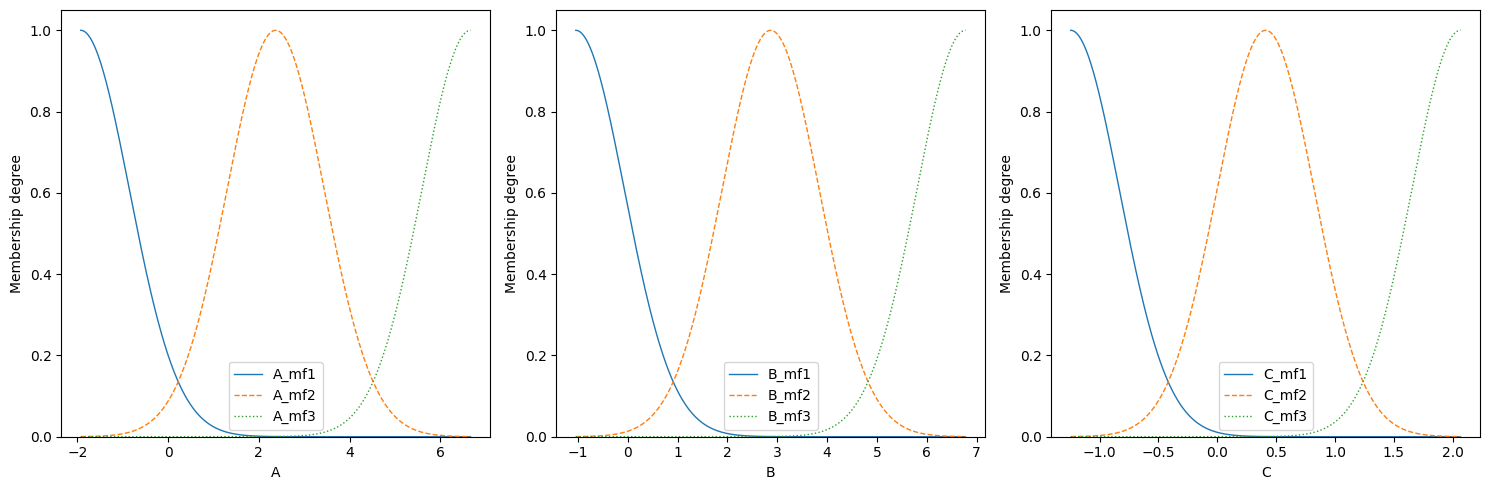

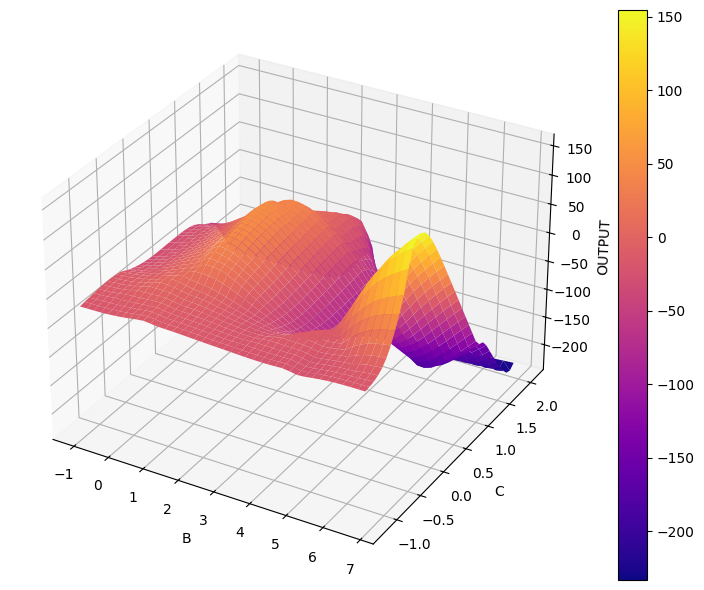

In [26]:
from simpful import *

FS = FuzzySystem(show_banner=False)

"""
please note I renumberd the updated rule base manually
Updated Rule base:

    "Rule1: If A is A_mf1 and B is B_mf1 and C is C_mf1",
    "Rule2: If A is A_mf1 and B is B_mf1 and C is C_mf2",
    "Rule3: If A is A_mf1 and B is B_mf1 and C is C_mf3",
    "Rule4: If A is A_mf1 and B is B_mf2 and C is C_mf1",
    "Rule5: If A is A_mf1 and B is B_mf2 and C is C_mf2",
    "Rule6: If A is A_mf1 and B is B_mf2 and C is C_mf3",
    "Rule7: If A is A_mf2 and B is B_mf1 and C is C_mf1",
    "Rule8: If A is A_mf2 and B is B_mf1 and C is C_mf2",
    "Rule9: If A is A_mf2 and B is B_mf1 and C is C_mf3",
    "Rule10: If A is A_mf2 and B is B_mf2 and C is C_mf1",
    "Rule11: If A is A_mf2 and B is B_mf2 and C is C_mf2",
    "Rule12: If A is A_mf2 and B is B_mf2 and C is C_mf3",
    "Rule13: If A is A_mf2 and B is B_mf3 and C is C_mf1",
    "Rule14: If A is A_mf3 and B is B_mf1 and C is C_mf1",
    "Rule15: If A is A_mf3 and B is B_mf1 and C is C_mf2",
    "Rule16: If A is A_mf3 and B is B_mf1 and C is C_mf3",
    "Rule17: If A is A_mf3 and B is B_mf2 and C is C_mf1",
    "Rule18: If A is A_mf3 and B is B_mf3 and C is C_mf1"

"""

RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)" 
RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)" 
RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)" 
RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)" 
RULE7 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 
RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun9)" 
RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)" 
RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)" 
RULE12 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun12)" 
RULE13 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun13)" 
RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun14)" 
RULE15 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun15)" 
RULE16 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun16)" 
RULE17 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun17)"  
RULE18 = "IF (A IS A_mf3) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun18)" 

FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15, RULE16, RULE17, RULE18])

FS.set_output_function('fun1', '-15.88111 +7.371436 * A +10.47600 * B -0.139746 * C')
FS.set_output_function('fun2', '-22.48881 -0.238618 * A +3.887317 * B +15.06445 * C')
FS.set_output_function('fun3', '-18.62983 +2.333388 * A -0.01211822 * B -2.035937 * C')
FS.set_output_function('fun4', '6.850841 -0.9411396 * A +2.731611 * B +44.53037 * C')
FS.set_output_function('fun5', '43.55879 +21.81999 * A +9.641088 * B -165.5344 * C')
FS.set_output_function('fun6', '62.16001 -11.55757 * A -136.0672 * B +198.0161 * C')
FS.set_output_function('fun7', '-3.009999 -4.539298 * A +0.875789 * B +0.078917 * C')
FS.set_output_function('fun8', '10.20943 -2.968600 * A +0.3940587 * B -60.85688 * C')
FS.set_output_function('fun9', '-4.189854 +2.046195 * A +0.3511744 * B -0.4955752 * C')
FS.set_output_function('fun10', '1.306181 -1.301301 * A +0.5382039 * B +9.699908 * C')
FS.set_output_function('fun11', '-49.75255 +23.56664 * A -0.03045748 * B -33.25543 * C')
FS.set_output_function('fun12', '13.63616 -2.250215 * A -29.77480 * B +43.36466 * C')
FS.set_output_function('fun13', '-3.669705 +0.6782020 * A -24.86397 * B -1.359573 * C')
FS.set_output_function('fun14', '-0.01839039 -0.004369737 * A -0.1511547 * B -0.00564633 * C')
FS.set_output_function('fun15', '-20.05875 -4.504496 * A -166.1366 * B -6.148221 * C')
FS.set_output_function('fun16', '-0.002445163 -0.0004891484 * A -0.02054157 * B -0.0007470751 * C')
FS.set_output_function('fun17', '-0.01996546 -0.07140626 * A -0.006701375 * B -0.006139666 * C')
FS.set_output_function('fun18', '-8.962101e-08 +1.784387e-08 * A -6.096759e-07 * B -3.319203e-08 * C')




"""
Membership function partitions for A:
A_mf1: Mean=-1.925, Std Dev=1.074
A_mf2: Mean=2.371, Std Dev=1.074
A_mf3: Mean=6.667, Std Dev=1.074

Membership function partitions for B:
B_mf1: Mean=-1.044, Std Dev=0.977
B_mf2: Mean=2.866, Std Dev=0.977
B_mf3: Mean=6.775, Std Dev=0.977

Membership function partitions for C:
C_mf1: Mean=-1.246, Std Dev=0.414
C_mf2: Mean=0.411, Std Dev=0.414
C_mf3: Mean=2.067, Std Dev=0.414
"""
"""
Minimum values for each feature:
A   -1.924816
B   -1.044218
C   -1.245653
dtype: float64

Maximum values for each feature:
A    6.666560
B    6.775483
C    2.067431
dtype: float6

"""

FS_1 = FuzzySet(function=Gaussian_MF(-1.925, 1.074), term='A_mf1')
FS_2 = FuzzySet(function=Gaussian_MF(2.371, 1.074), term='A_mf2')
FS_3 = FuzzySet(function=Gaussian_MF(6.667, 1.074), term='A_mf3')
MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.924816, 6.666560])
FS.add_linguistic_variable('A', MF_A)

FS_11 = FuzzySet(function=Gaussian_MF(-1.044, 0.977), term='B_mf1')
FS_12 = FuzzySet(function=Gaussian_MF(2.866, 0.977), term='B_mf2')
FS_13 = FuzzySet(function=Gaussian_MF(6.775, 0.977), term='B_mf3')
MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.044218, 6.775483])
FS.add_linguistic_variable('B', MF_B)

FS_21 = FuzzySet(function=Gaussian_MF(-1.246, 0.414), term='C_mf1')
FS_22 = FuzzySet(function=Gaussian_MF(0.411, 0.414), term='C_mf2')
FS_23 = FuzzySet(function=Gaussian_MF(2.067, 0.414), term='C_mf3')
MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-1.245653, 2.067431])
FS.add_linguistic_variable('C', MF_C)




# end of automatically generated code #

# here is the model visualization
# Set antecedents values
FS.set_variable("A", 0.0)
FS.set_variable("B", 0.0)
FS.set_variable("C", 0.0)
# Plot all linguistic variables and save them in a output file
FS.produce_figure(outputfile='lvs.pdf')

# Perform Sugeno inference and print output
print(FS.Sugeno_inference(["OUTPUT"]))

fig = FS.plot_surface(variables=['B','C'], output='OUTPUT')

In [24]:

# Assuming X_train is your dataframe
# Extract the relevant columns: A, B, and C
features = X_train[['A', 'B', 'C']]

# Calculate the minimum and maximum for each feature
min_values = features.min()
max_values = features.max()

# Print the results
print("Minimum values for each feature:")
print(min_values)
print("\nMaximum values for each feature:")
print(max_values)


Minimum values for each feature:
A   -1.924816
B   -1.044218
C   -1.245653
dtype: float64

Maximum values for each feature:
A    6.666560
B    6.775483
C    2.067431
dtype: float64


# Step 7:
# Check performance

recall from earlier that {'dw_mw': 'A', 'delta_p': 'B', 'v': 'C', 'fx': 'Y'})

In [27]:
from sklearn.metrics import mean_absolute_error

# Initialize a list to store the predicted outputs
predicted_outputs = []

# Iterate through all samples in the test dataset
for index, sample in X_test.iterrows():
    # Set the variables for the current sample
    FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
    FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
    FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column
    
    # Perform Sugeno inference and get the predicted output
    predicted_output = FS.Sugeno_inference(["OUTPUT"])
    
    # Append the predicted output to the list
    predicted_outputs.append(predicted_output)

# Extract the predicted output values from the dictionaries
predicted_values = [output['OUTPUT'] for output in predicted_outputs]

# Calculate the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error (MAE):", MAE)

Mean Absolute Error (MAE): 15.689601125893805


# Step 8:
# Grid Search
the pursuit of the perfect regularization parameter alpha


Consequents with L2 regularization:
Consequents:
   Rule     Intercept  Weight for A  Weight for B  Weight for C
 Rule 1 -1.588111e+01  7.371436e+00  1.047600e+01 -1.397460e-01
 Rule 2 -2.248881e+01 -2.386178e-01  3.887317e+00  1.506445e+01
 Rule 3 -1.862983e+01  2.333388e+00 -1.211822e-02 -2.035937e+00
 Rule 4  6.850841e+00 -9.411396e-01  2.731611e+00  4.453037e+01
 Rule 5  4.355879e+01  2.181999e+01  9.641088e+00 -1.655344e+02
 Rule 6  6.216001e+01 -1.155757e+01 -1.360672e+02  1.980161e+02
 Rule 7 -3.009999e+00 -4.539298e+00  8.757890e-01  7.891700e-02
 Rule 8  1.020943e+01 -2.968600e+00  3.940587e-01 -6.085688e+01
 Rule 9 -4.189854e+00  2.046195e+00  3.511744e-01 -4.955752e-01
Rule 10  1.306181e+00 -1.301301e+00  5.382039e-01  9.699908e+00
Rule 11 -4.975255e+01  2.356664e+01 -3.045748e-02 -3.325543e+01
Rule 12  1.363616e+01 -2.250215e+00 -2.977480e+01  4.336466e+01
Rule 13 -3.669705e+00  6.782020e-01 -2.486397e+01 -1.359573e+00
Rule 14 -1.839039e-02 -4.369737e-03 -1.511547e-01 -5.64

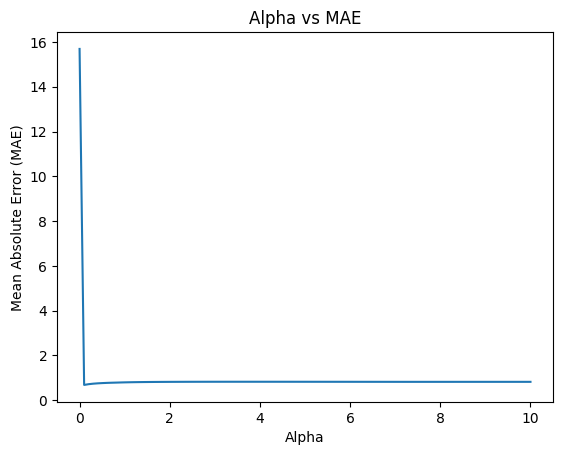

Optimal Alpha: 0.10101010101010101
Minimum MAE: 0.6803772458836412


In [31]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from simpful import *

# Define the range of alpha values for grid search
alpha_values = np.linspace(0.0, 10, num=100)

# Initialize lists to store alpha values and corresponding MAE
alpha_list = []
mae_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Define the Ridge regression model with L2 regularization
    ridge_model = Ridge(alpha=alpha, solver='lsqr')
    
    # Fit the model to the design matrix and y_train
    ridge_model.fit(design_matrix, y_train)

    # Get the coefficients (consequents) from the trained model
    consequents_regularized = ridge_model.coef_

    
    # Display the consequents with L2 regularization
    print("Consequents with L2 regularization:")

    # Number of rules and features
    num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
    num_features = X_train.shape[1]

    # Prepare data for tabular display
    table_data = []

    for rule_index in range(num_rules):
        intercept = consequents_regularized[rule_index * (num_features + 1)]
        weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
        row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
        table_data.append(row)

    # Create a DataFrame for better visualization
    column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
    df = pd.DataFrame(table_data, columns=column_names)

    # Display the consequents in a tabular format
    print("Consequents:")
    print(df.to_string(index=False))
    
    FS = FuzzySystem(show_banner=False)
    
    RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
    RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
    RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)" 
    RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)" 
    RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)" 
    RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)" 
    RULE7 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
    RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 
    RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun9)" 
    RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)" 
    RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)" 
    RULE12 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun12)" 
    RULE13 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun13)" 
    RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun14)" 
    RULE15 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun15)" 
    RULE16 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun16)" 
    RULE17 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun17)"  
    RULE18 = "IF (A IS A_mf3) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun18)" 

    FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15, RULE16, RULE17, RULE18])
    # Extract the consequents obtained from the Ridge regression model
    consequents = df.iloc[:, 1:].values  # Assuming 'df' contains the DataFrame with consequents

    # Define a list of rule names corresponding to the rules in your Fuzzy System
    rule_names = ['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7', 'fun8', 'fun9', 'fun10', 'fun11', 'fun12', 'fun13', 'fun14', 'fun15', 'fun16', 'fun17', 'fun18']

    # Iterate through each rule and set the output function using the corresponding coefficients
    for rule_index, rule_name in enumerate(rule_names):
        # Extract the coefficients for the current rule
        coefficients = consequents[rule_index]
        
        # Construct the output function string
        output_function = f"{coefficients[0]}"
        for feature_index, coefficient in enumerate(coefficients[1:]):
            output_function += f" + {coefficient} * {'ABC'[feature_index]}"
        
        # Set the output function for the current rule
        FS.set_output_function(rule_name, output_function)



    FS_1 = FuzzySet(function=Gaussian_MF(-1.925, 1.074), term='A_mf1')
    FS_2 = FuzzySet(function=Gaussian_MF(2.371, 1.074), term='A_mf2')
    FS_3 = FuzzySet(function=Gaussian_MF(6.667, 1.074), term='A_mf3')
    MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.924816, 6.666560])
    FS.add_linguistic_variable('A', MF_A)

    FS_11 = FuzzySet(function=Gaussian_MF(-1.044, 0.977), term='B_mf1')
    FS_12 = FuzzySet(function=Gaussian_MF(2.866, 0.977), term='B_mf2')
    FS_13 = FuzzySet(function=Gaussian_MF(6.775, 0.977), term='B_mf3')
    MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.044218, 6.775483])
    FS.add_linguistic_variable('B', MF_B)

    FS_21 = FuzzySet(function=Gaussian_MF(-1.246, 0.414), term='C_mf1')
    FS_22 = FuzzySet(function=Gaussian_MF(0.411, 0.414), term='C_mf2')
    FS_23 = FuzzySet(function=Gaussian_MF(2.067, 0.414), term='C_mf3')
    MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-1.245653, 2.067431])
    FS.add_linguistic_variable('C', MF_C)



    # here you input value to the model and it makes predictions
    # Set antecedents values
    FS.set_variable("A", 0.0)
    FS.set_variable("B", 0.0)
    FS.set_variable("C", 0.0)
    print(FS.Sugeno_inference(["OUTPUT"]))

    # Initialize a list to store the predicted outputs
    predicted_outputs = []
    
    # Iterate through all samples in the test dataset
    for index, sample in X_test.iterrows():
        # Set the variables for the current sample
        FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
        FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
        FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column

        # Perform Sugeno inference and get the predicted output
        predicted_output = FS.Sugeno_inference(["OUTPUT"])

        # Append the predicted output to the list
        predicted_outputs.append(predicted_output)

    # Extract the predicted output values from the dictionaries
    predicted_values = [output['OUTPUT'] for output in predicted_outputs]

    # Calculate the Mean Absolute Error (MAE) for the current alpha value
    MAE = mean_absolute_error(y_test, predicted_values)
    
    # Append alpha and MAE to the lists
    alpha_list.append(alpha)
    mae_list.append(MAE)

# Plot Alpha versus MAE
plt.plot(alpha_list, mae_list)
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Alpha vs MAE')
plt.show()

# Find the alpha value with the minimum MAE
min_mae_index = np.argmin(mae_list)
optimal_alpha = alpha_list[min_mae_index]
min_mae = mae_list[min_mae_index]

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Minimum MAE: {min_mae}")







# Test this claimed Alpha

In [32]:
# perform linear least squares with l2 regularization
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


# Define the regularization strength (alpha)
alpha = 0.1  # You can adjust the value of alpha as needed

# Define the Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=alpha, solver='lsqr') # solver least squares with QR decomposition
# lsqr Find the least-squares solution to a large, sparse, linear system of equations.
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html

# Fit the model to the design matrix and y_train
ridge_model.fit(design_matrix, y_train)

# Get the coefficients (consequents) from the trained model
consequents_regularized = ridge_model.coef_

# Display the consequents with L2 regularization
print("Consequents with L2 regularization:")

# Number of rules and features
num_rules = consequents_regularized.shape[0] // (X_train.shape[1] + 1)
num_features = X_train.shape[1]

# Prepare data for tabular display
table_data = []

for rule_index in range(num_rules):
    intercept = consequents_regularized[rule_index * (num_features + 1)]
    weights = consequents_regularized[rule_index * (num_features + 1) + 1 : (rule_index + 1) * (num_features + 1)]
    row = [f"Rule {rule_index + 1}", intercept] + weights.tolist()
    table_data.append(row)

# Create a DataFrame for better visualization
column_names = ["Rule", "Intercept"] + [f"Weight for {feature}" for feature in ['A', 'B', 'C']]
df = pd.DataFrame(table_data, columns=column_names)

# Display the consequents in a tabular format
print("Consequents:")
print(df.to_string(index=False))



# Here is the model 
from simpful import *



FS = FuzzySystem(show_banner=False)
RULE1 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun1)" 
RULE2 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun2)" 
RULE3 = "IF (A IS A_mf1) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun3)" 
RULE4 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun4)" 
RULE5 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun5)" 
RULE6 = "IF (A IS A_mf1) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun6)" 
RULE7 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun7)" 
RULE8 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun8)" 
RULE9 = "IF (A IS A_mf2) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun9)" 
RULE10 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun10)" 
RULE11 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf2) THEN (OUTPUT IS fun11)" 
RULE12 = "IF (A IS A_mf2) AND (B IS B_mf2) AND (C IS C_mf3) THEN (OUTPUT IS fun12)" 
RULE13 = "IF (A IS A_mf2) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun13)" 
RULE14 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf1) THEN (OUTPUT IS fun14)" 
RULE15 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf2) THEN (OUTPUT IS fun15)" 
RULE16 = "IF (A IS A_mf3) AND (B IS B_mf1) AND (C IS C_mf3) THEN (OUTPUT IS fun16)" 
RULE17 = "IF (A IS A_mf3) AND (B IS B_mf2) AND (C IS C_mf1) THEN (OUTPUT IS fun17)"  
RULE18 = "IF (A IS A_mf3) AND (B IS B_mf3) AND (C IS C_mf1) THEN (OUTPUT IS fun18)" 
 



FS.add_rules([RULE1, RULE2, RULE3, RULE4, RULE5, RULE6, RULE7, RULE8, RULE9, RULE10,RULE11, RULE12, RULE13, RULE14, RULE15, RULE16, RULE17, RULE18])
# Extract the consequents obtained from the Ridge regression model
consequents = df.iloc[:, 1:].values  # Assuming 'df' contains the DataFrame with consequents

# Define a list of rule names corresponding to the rules in your Fuzzy System
rule_names = ['fun1', 'fun2', 'fun3', 'fun4', 'fun5', 'fun6', 'fun7', 'fun8', 'fun9', 'fun10', 'fun11', 'fun12', 'fun13', 'fun14', 'fun15', 'fun16', 'fun17', 'fun18' ]

# Iterate through each rule and set the output function using the corresponding coefficients
for rule_index, rule_name in enumerate(rule_names):
    # Extract the coefficients for the current rule
    coefficients = consequents[rule_index]
        
    # Construct the output function string
    output_function = f"{coefficients[0]}"
    for feature_index, coefficient in enumerate(coefficients[1:]):
        output_function += f" + {coefficient} * {'ABC'[feature_index]}"
        
    # Set the output function for the current rule
    FS.set_output_function(rule_name, output_function)




FS_1 = FuzzySet(function=Gaussian_MF(-1.925, 1.074), term='A_mf1')
FS_2 = FuzzySet(function=Gaussian_MF(2.371, 1.074), term='A_mf2')
FS_3 = FuzzySet(function=Gaussian_MF(6.667, 1.074), term='A_mf3')
MF_A = LinguisticVariable([FS_1, FS_2, FS_3], concept='A', universe_of_discourse=[-1.924816, 6.666560])
FS.add_linguistic_variable('A', MF_A)

FS_11 = FuzzySet(function=Gaussian_MF(-1.044, 0.977), term='B_mf1')
FS_12 = FuzzySet(function=Gaussian_MF(2.866, 0.977), term='B_mf2')
FS_13 = FuzzySet(function=Gaussian_MF(6.775, 0.977), term='B_mf3')
MF_B = LinguisticVariable([FS_11, FS_12, FS_13], concept='B', universe_of_discourse=[-1.044218, 6.775483])
FS.add_linguistic_variable('B', MF_B)

FS_21 = FuzzySet(function=Gaussian_MF(-1.246, 0.414), term='C_mf1')
FS_22 = FuzzySet(function=Gaussian_MF(0.411, 0.414), term='C_mf2')
FS_23 = FuzzySet(function=Gaussian_MF(2.067, 0.414), term='C_mf3')
MF_C = LinguisticVariable([FS_21, FS_22, FS_23], concept='C', universe_of_discourse=[-1.245653, 2.067431])
FS.add_linguistic_variable('C', MF_C)



# here you input value to the model and it makes predictions
# Set antecedents values
FS.set_variable("A", 0.0)
FS.set_variable("B", 0.0)
FS.set_variable("C", 0.0)
print(FS.Sugeno_inference(["OUTPUT"]))


# here you check the error of the predictions in terms of MAE
# Initialize a list to store the predicted outputs
predicted_outputs = []

# Iterate through all samples in the test dataset
for index, sample in X_test.iterrows():
    # Set the variables for the current sample
    FS.set_variable("A", sample.iloc[0])  # Assuming A is in the first column
    FS.set_variable("B", sample.iloc[1])  # Assuming B is in the second column
    FS.set_variable("C", sample.iloc[2])  # Assuming C is in the third column
    
    # Perform Sugeno inference and get the predicted output
    predicted_output = FS.Sugeno_inference(["OUTPUT"])
    
    # Append the predicted output to the list
    predicted_outputs.append(predicted_output)

# Extract the predicted output values from the dictionaries
predicted_values = [output['OUTPUT'] for output in predicted_outputs]

# Calculate the Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test, predicted_values)
print("Mean Absolute Error (MAE):", MAE)



Consequents with L2 regularization:
Consequents:
   Rule     Intercept  Weight for A  Weight for B  Weight for C
 Rule 1  1.590181e+00 -2.920426e-01  3.200162e+00  8.413171e-01
 Rule 2  3.655524e-01  8.366170e-01  1.226004e+00  3.804774e-01
 Rule 3  1.660731e+00 -3.070333e-01  4.089017e+00  3.039253e-01
 Rule 4 -1.806213e+00  3.337985e-01 -1.496737e+00  2.323531e+00
 Rule 5 -2.108546e+00  2.314051e-01  5.770565e-01 -2.344915e-01
 Rule 6  9.697870e-01 -1.792728e-01  1.346502e+00  1.261768e+00
 Rule 7  3.480799e-01 -6.527403e-02  7.005005e-01  1.841382e-01
 Rule 8 -4.614561e-01 -1.578757e-01 -2.712089e-01 -1.495500e-01
 Rule 9  3.634054e-01 -6.700400e-02  8.950395e-01  6.646873e-02
Rule 10 -3.954755e-01  7.277068e-02 -3.277672e-01  5.086668e-01
Rule 11 -6.077896e-01 -4.670547e-01 -6.981906e-02 -1.097979e-01
Rule 12  2.122737e-01 -3.935281e-02  2.947410e-01  2.762215e-01
Rule 13 -1.514453e-01  2.798593e-02 -1.026114e+00 -5.610825e-02
Rule 14  1.898362e-05 -1.344936e-04 -6.731175e-06  5.84